# Useful Information

In [1]:
'''
LifeInsuranceOpenSample: https://www.sciencedirect.com/science/article/pii/S2352340922008605
'''

'''
Seasons

Winter - from Jan to March 
Spring - from Apr to June
Summer - from Jul to September 
Autumn - from Oct to December 
'''

'''
https://www.spain.info/en/weather/
https://www.statista.com/statistics/772816/penetration-in-he-sector-insurer-from-lifetime-in-spain/
https://documentacion.fundacionmapfre.org/documentacion/publico/es/media/group/304.do Page42
'''

'\nhttps://www.spain.info/en/weather/\nhttps://www.statista.com/statistics/772816/penetration-in-he-sector-insurer-from-lifetime-in-spain/\nhttps://documentacion.fundacionmapfre.org/documentacion/publico/es/media/group/304.do Page42\n'

# Section: Exploratory Data Analysis

In [2]:
'''
Importing necessary libraries for this section
'''    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
'''
Reading the sheets in the excel file 
'''
df = pd.read_excel('LifeInsuranceOpenSample.xlsx', sheet_name=['Data','Description'])

In [4]:
'''
converting specific sheet in excel to data frame 
'''
data = df.get('Data')

In [5]:
'''
renaming a column for easy understanding
'''
data.rename(columns = {'Month':'PolicyMonth'}, inplace = True)

In [6]:
data.shape

(76102, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76102 entries, 0 to 76101
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     76102 non-null  int64         
 1   Gender                 76102 non-null  object        
 2   Birth_Date             76102 non-null  datetime64[ns]
 3   Effecitive_Date        76102 non-null  datetime64[ns]
 4   Capital                76102 non-null  float64       
 5   Renewal_Date           76102 non-null  datetime64[ns]
 6   Age                    76102 non-null  float64       
 7   t                      76102 non-null  float64       
 8   Age_Actuarial          76102 non-null  int64         
 9   Birthday               76102 non-null  datetime64[ns]
 10  x                      76102 non-null  float64       
 11  r                      76102 non-null  int64         
 12  s                      76102 non-null  int64         
 13  A

In [8]:
print(data.isnull().sum())

ID                       0
Gender                   0
Birth_Date               0
Effecitive_Date          0
Capital                  0
Renewal_Date             0
Age                      0
t                        0
Age_Actuarial            0
Birthday                 0
x                        0
r                        0
s                        0
Age_actuarial_quarter    0
PolicyMonth              0
dtype: int64


In [9]:

'''
creating a subset of features we are interested in
'''
subset_feature = ['ID', 'Capital', 'Gender', 'Birth_Date', 'Effecitive_Date', 'Age']
data=data[subset_feature]



In [10]:
'''
lets take a look at the data
'''
data

,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age
0,1,55000.0,M,1960-07-10,2000-03-08,48.659822
1,2,105000.0,M,1961-08-18,2000-03-07,47.550992
2,3,79500.0,M,1963-10-14,2000-03-15,45.418207
3,4,74500.0,F,1966-06-26,2000-03-15,42.718686
4,5,140000.0,M,1942-09-30,2000-03-07,66.433949
...,...,...,...,...,...,...
76097,76098,95000.0,F,1964-08-01,2008-06-18,44.878850
76098,76099,45000.0,F,1965-09-13,2005-09-07,43.983573
76099,76100,103000.0,F,1968-09-21,2009-02-12,40.394251
76100,76101,82000.0,F,1966-12-17,2002-11-14,42.910335


In [11]:
data.describe(include='all')

C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')
C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age
count,76102.00000,7.610200e+04,76102,76102,76102,76102.000000
unique,NaN,NaN,2,16740,3519,NaN
top,NaN,NaN,M,1966-06-18 00:00:00,2008-12-31 00:00:00,NaN
freq,NaN,NaN,47652,21,265,NaN
first,NaN,NaN,NaN,1930-10-28 00:00:00,2000-03-07 00:00:00,NaN
last,NaN,NaN,NaN,1991-08-06 00:00:00,2009-11-29 00:00:00,NaN
mean,38051.50000,9.145218e+04,NaN,NaN,NaN,44.481505
std,21968.89943,6.430220e+04,NaN,NaN,NaN,10.836022
min,1.00000,7.000000e+03,NaN,NaN,NaN,17.891855
25%,19026.25000,5.400000e+04,NaN,NaN,NaN,38.590007


In [12]:
'''
Checking if any customer has multiple insurance policy in this data
'''
boolean = data['ID'].duplicated().any() # True
print(boolean)

False


In [13]:
"""
Finding at what age the insurance policy was taken 
"""
data['PolicyStartAge'] = (data['Effecitive_Date']-data['Birth_Date'])/  np.timedelta64(1, 'Y')


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\3106537181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PolicyStartAge'] = (data['Effecitive_Date']-data['Birth_Date'])/  np.timedelta64(1, 'Y')


In [14]:
'''
Extracting calendar month of the birthday of the customer
'''
data['BirthMonth'] = data['Birth_Date'].dt.month

C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\3748254907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BirthMonth'] = data['Birth_Date'].dt.month


In [15]:
'''
Extracting calendar month of the policy of the customer
'''
data['PolicyMonth'] = data['Effecitive_Date'].dt.month

C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\2609914982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PolicyMonth'] = data['Effecitive_Date'].dt.month


In [16]:
'''
Finding what is the differece between policy purchase month and birth month
'''
data['PBMonthDiff'] = (data['PolicyMonth']-data['BirthMonth'])
data.loc[data['PBMonthDiff'] < 0, 'PBMonthDiff'] = 12+data['PBMonthDiff']


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1793776555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PBMonthDiff'] = (data['PolicyMonth']-data['BirthMonth'])


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\2832367087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = data['Gender'].replace(['F','M'],[1,0])


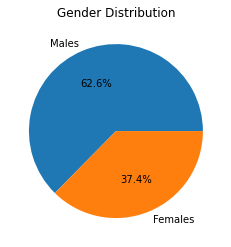

In [17]:
data['gender'] = data['Gender'].replace(['F','M'],[1,0])

gender_count = data['gender'].value_counts()
my_labels = ["Males", "Females"]
plt.pie(gender_count, labels=my_labels, autopct='%0.1f%%')
plt.title('Gender Distribution')
plt.show()

del data['gender']

<class 'str'>


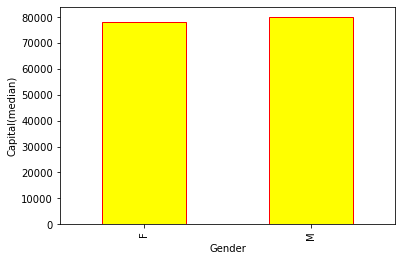

<class 'str'>


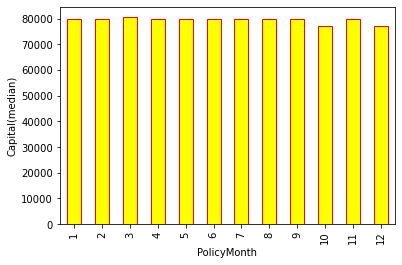

<class 'str'>


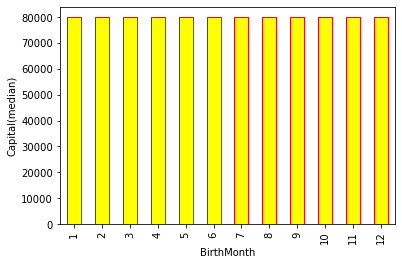

In [18]:
variables_list = ['Gender', 'PolicyMonth', 'BirthMonth'] # features for which we want to see the median Capital distribution plot
for i in variables_list:
    print(type(i))
    ax = data.groupby(i)['Capital'].median()
    ax.plot.bar(color='yellow', edgecolor='red')
    plt.ylabel("Capital(median)")
    plt.show()
     

In [19]:
'''
Partition data for Males and Females to examine some distributions
'''
dataF = data[data['Gender'] =='F'] 
dataM = data[data['Gender'] =='M'] 

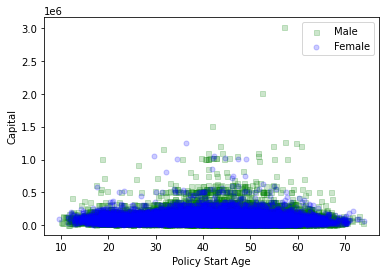

In [20]:
'''
plotting a scatter plot to get a sense of relation ship between 2 features relevant for our study in Male and Female dataset
'''
ax=plt.scatter(dataM['PolicyStartAge'], dataM['Capital'], color ="green", marker="s", alpha=0.2, s=25)
ax=plt.scatter(dataF['PolicyStartAge'], dataF['Capital'], color ="blue", marker="o", alpha=0.2, s=25)
plt.xlabel('Policy Start Age') 
plt.ylabel('Capital') 
plt.legend(["Male" , "Female"])
#ax.legend()
plt.show()

In [21]:
dataF.describe(include= 'all')

C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1993596443.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataF.describe(include= 'all')
C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1993596443.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataF.describe(include= 'all')


,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff
count,28450.000000,2.845000e+04,28450,28450,28450,28450.000000,28450.000000,28450.000000,28450.000000,28450.000000
unique,NaN,NaN,1,12631,3409,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,1964-05-05 00:00:00,2008-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,28450,10,107,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1933-06-22 00:00:00,2000-03-07 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,1991-04-11 00:00:00,2009-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,38345.519965,8.759997e+04,NaN,NaN,NaN,43.369473,40.344201,6.554763,6.688647,5.476731
std,21918.466618,5.582039e+04,NaN,NaN,NaN,10.710016,10.644908,3.433153,3.608168,3.446814
min,4.000000,7.000000e+03,NaN,NaN,NaN,18.017796,9.664812,1.000000,1.000000,0.000000
25%,19500.500000,5.200000e+04,NaN,NaN,NaN,37.544148,34.070515,4.000000,3.000000,2.000000


In [22]:
dataM.describe(include= 'all')

C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\2039797950.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataM.describe(include= 'all')
C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\2039797950.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataM.describe(include= 'all')


,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff
count,47652.000000,4.765200e+04,47652,47652,47652,47652.000000,47652.000000,47652.000000,47652.000000,47652.000000
unique,NaN,NaN,1,15135,3484,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,M,1960-06-24 00:00:00,2008-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,47652,15,158,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1930-10-28 00:00:00,2000-03-07 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,1991-08-06 00:00:00,2009-11-29 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,37875.959246,9.375209e+04,NaN,NaN,NaN,45.145430,42.093459,6.569588,6.632964,5.492739
std,21997.310804,6.876770e+04,NaN,NaN,NaN,10.856501,10.785805,3.423487,3.609017,3.448194
min,1.000000,7.000000e+03,NaN,NaN,NaN,17.891855,9.908485,1.000000,1.000000,0.000000
25%,18726.750000,5.500000e+04,NaN,NaN,NaN,39.276523,35.888485,4.000000,3.000000,3.000000


<Figure size 2160x2160 with 0 Axes>

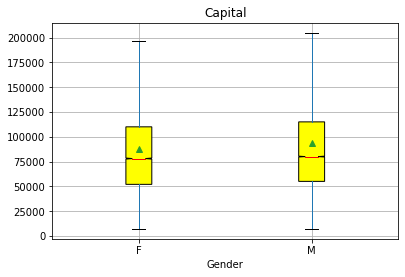

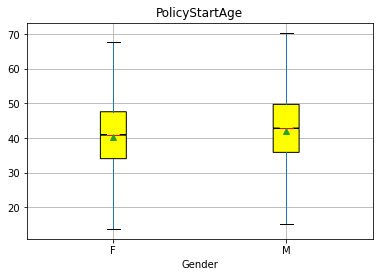

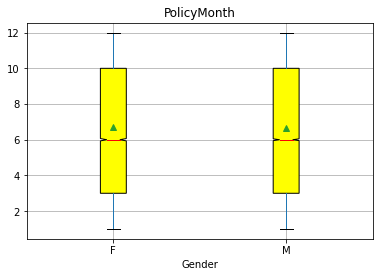

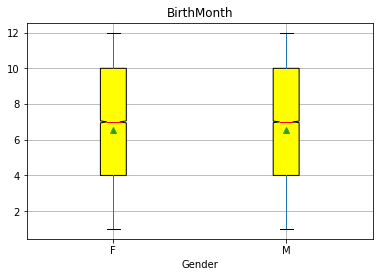

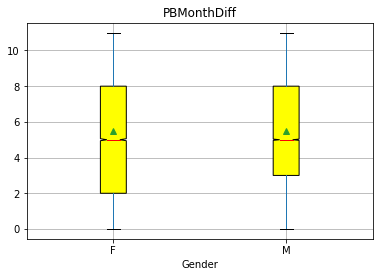

In [23]:
'''
observing boxplots for different variables for two Genders
'''

plt.figure(figsize=(30, 30))
ax1= data.boxplot(column=['Capital'], by='Gender',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

ax3= data.boxplot(column=['PolicyStartAge'], by='Gender', vert=True, notch=True, patch_artist=True, boxprops = dict(facecolor = "yellow"),  showmeans = True,  medianprops = dict(color = "red"), showfliers = False)
plt.suptitle('')

ax4= data.boxplot(column=['PolicyMonth'], by='Gender',vert=True, notch=True, patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  medianprops = dict(color = "red"), showfliers = False)
plt.suptitle('')

ax5= data.boxplot(column=['BirthMonth'], by='Gender',vert=True, notch=True, patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  medianprops = dict(color = "red"), showfliers = False)
plt.suptitle('')

ax2= data.boxplot(column=['PBMonthDiff'], by='Gender',vert=True, notch=True, patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True, showfliers = False,  medianprops = dict(color = "red"))
plt.suptitle('')

plt.show()


C:\Users\Vikas\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6674: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


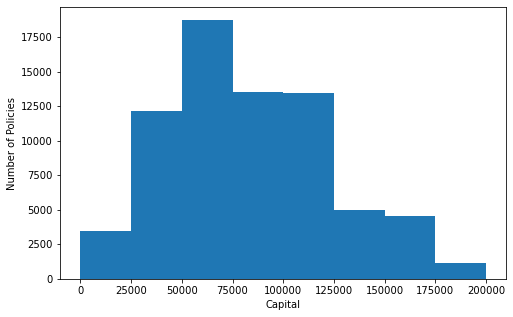

In [24]:
'''
observing distribution of Capital in full dataset
'''
plt.figure(figsize=(8, 5)) 
plt.hist(data['Capital'], bins=[-1, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, np.inf], label=["<=25", "25k-50k", "50k-75k", "75k-100k", "100k-125k", "125k-150k", "150k-175k", "175k-200k", ">200k"])
plt.ylabel('Number of Policies') 
plt.xlabel('Capital')
plt.show()

<AxesSubplot:xlabel='PolicyMonth'>

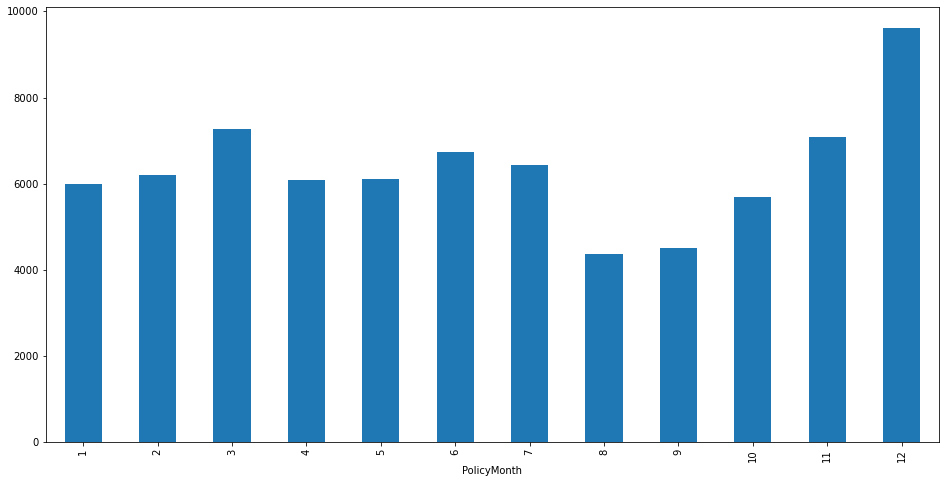

In [25]:
'''
observing distribution of Policies in full dataset: Monthly
'''
table = pd.pivot_table(data, index=['PolicyMonth'],values=['Capital'], aggfunc='count').astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

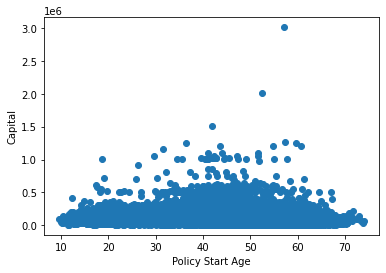

In [26]:
'''
We explore the joint distribution of Capital wrt to PolicyStartAge
'''

plt.scatter(data['PolicyStartAge'], data['Capital'])
plt.xlabel('Policy Start Age') 
plt.ylabel('Capital')
plt.show()

<AxesSubplot:xlabel='PolicyMonth'>

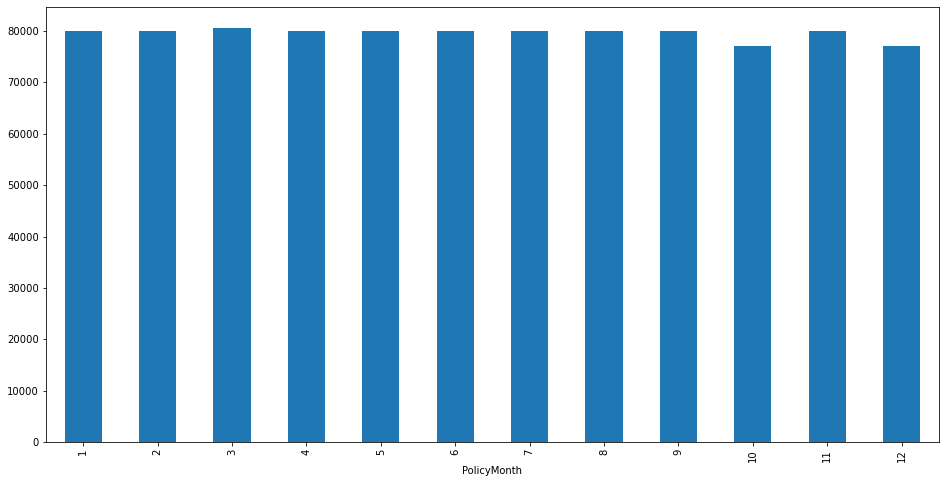

In [27]:
'''
Observing median Capital for each Policy Month 
'''
table = pd.pivot_table(data, index=['PolicyMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

In [28]:
'''
making bin for polictstartage for granular observations
'''

data['PolicyStartAgeBin'] = pd.cut(data['PolicyStartAge'], bins=[-1,2,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,56,58,60,65,70,75, np.inf])


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\2372758485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PolicyStartAgeBin'] = pd.cut(data['PolicyStartAge'], bins=[-1,2,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,56,58,60,65,70,75, np.inf])


<AxesSubplot:xlabel='PolicyStartAgeBin'>

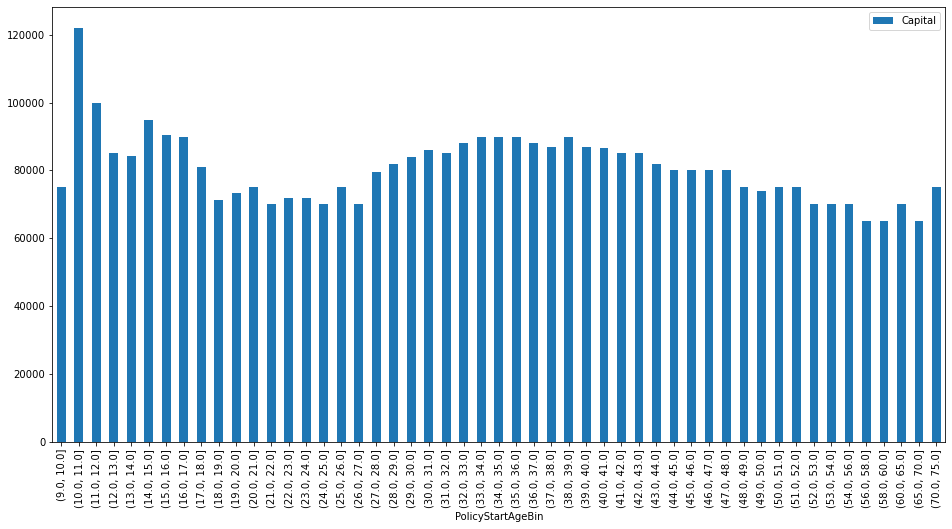

In [29]:
'''
observing median Capital wrt different policy start age bins
'''
table = pd.pivot_table(data, index=['PolicyStartAgeBin'], values=['Capital'], aggfunc="median")
table.plot(kind='bar', figsize=(16, 8),legend=True)

<AxesSubplot:xlabel='PolicyStartAgeBin'>

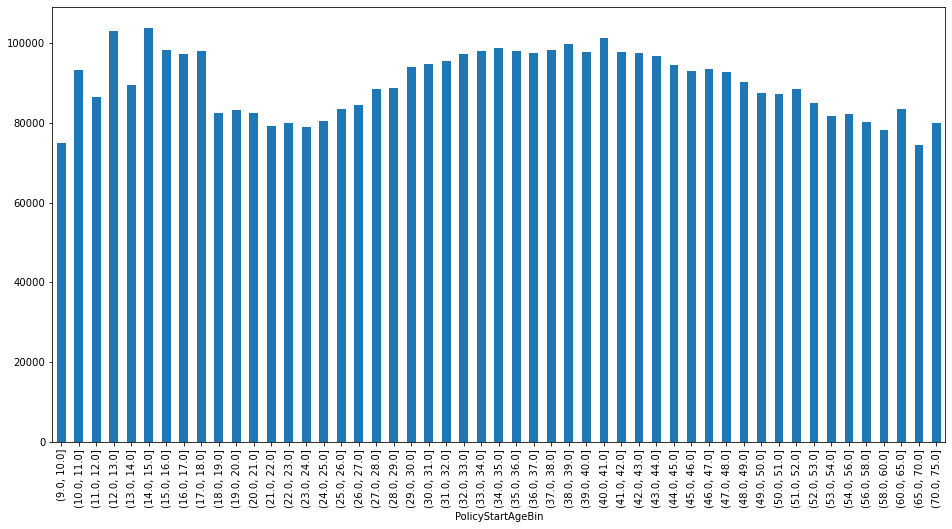

In [30]:
'''
observing mean Capital wrt different policy start age bins
'''

table = pd.pivot_table(data, index=['PolicyStartAgeBin'], values=['Capital'], aggfunc="mean")
table.plot(kind='bar', figsize=(16, 8),legend=False)

In [31]:
'''
making bins of Capital for granular observations
'''

data['CapitalBin'] = pd.cut(data['Capital'], bins=[-1,25000,50000,75000, 100000, 125000, 150000, 175000, 200000, np.inf], labels=["<=25", "25k-50k", "50k-75k", "75k-100k", "100k-125k", "125k-150k", "150k-175k", "175k-200k", ">200k"])


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\3056152752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CapitalBin'] = pd.cut(data['Capital'], bins=[-1,25000,50000,75000, 100000, 125000, 150000, 175000, 200000, np.inf], labels=["<=25", "25k-50k", "50k-75k", "75k-100k", "100k-125k", "125k-150k", "150k-175k", "175k-200k", ">200k"])


<AxesSubplot:xlabel='PolicyStartAgeBin'>

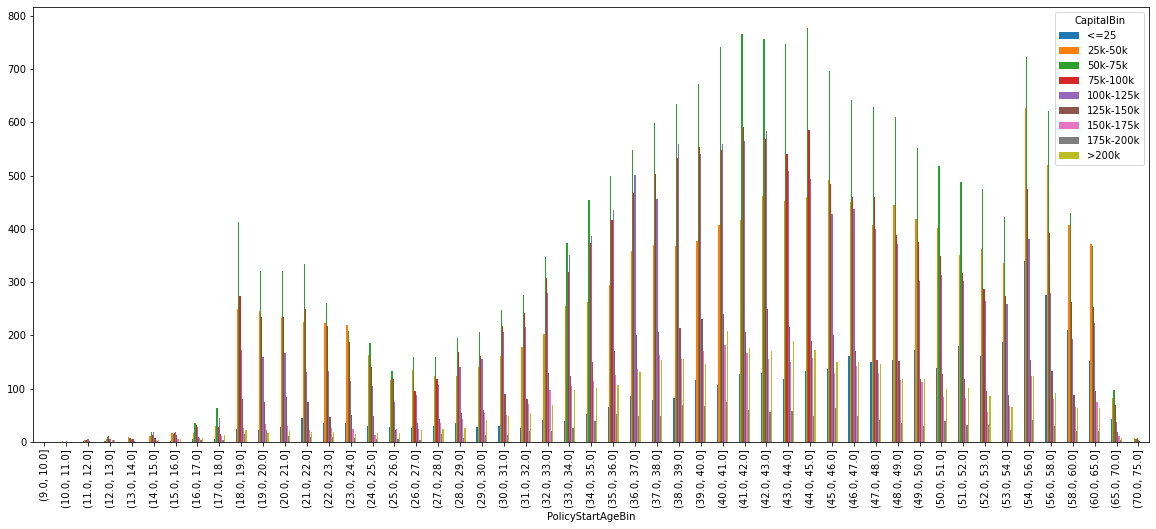

In [32]:
'''
We further explore the joint distribution of Capital wrt to PolicyStartAge
'''
crosstb = pd.crosstab(data['PolicyStartAgeBin'],data['CapitalBin'])
crosstb.plot(kind='bar', figsize=(20, 8))


In [33]:
'''
Changing monthly variables as quaterly half-yearly variables 
'''
conditions = [
    (data['PolicyMonth'] >= 1) & (data['PolicyMonth'] <=3),
    (data['PolicyMonth'] >= 4) & (data['PolicyMonth'] <=6),
    (data['PolicyMonth'] >= 7) & (data['PolicyMonth'] <=9),
    (data['PolicyMonth'] >= 10) & (data['PolicyMonth'] <=12)
]


results = [1, 2, 3, 4]

data['PolicyQuarter'] = np.select(conditions, results)


conditions = [
    (data['BirthMonth'] >= 1) & (data['BirthMonth'] <=3),
    (data['BirthMonth'] >= 4) & (data['BirthMonth'] <=6),
    (data['BirthMonth'] >= 7) & (data['BirthMonth'] <=9),
    (data['BirthMonth'] >= 10) & (data['BirthMonth'] <=12)
]


results = [1, 2, 3, 4]

data['BirthQuarter'] = np.select(conditions, results)


conditions =[
(data['PBMonthDiff'] >=0) & (data['PBMonthDiff'] <=2),
(data['PBMonthDiff'] >=3) & (data['PBMonthDiff'] <=5),
(data['PBMonthDiff'] >=6) & (data['PBMonthDiff'] <=8),
(data['PBMonthDiff'] >=9) & (data['PBMonthDiff'] <=11)
]   

results = [1, 2, 3, 4]

data['PBQuarter'] = np.select(conditions, results)


conditions = [
    (data['BirthMonth'] >= 1) & (data['BirthMonth'] <=6),
    (data['BirthMonth'] >= 7) & (data['BirthMonth'] <=12)
]

results = [1, 2]

data['BirthHalf'] = np.select(conditions, results)



C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\460713725.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PolicyQuarter'] = np.select(conditions, results)
C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\460713725.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BirthQuarter'] = np.select(conditions, results)


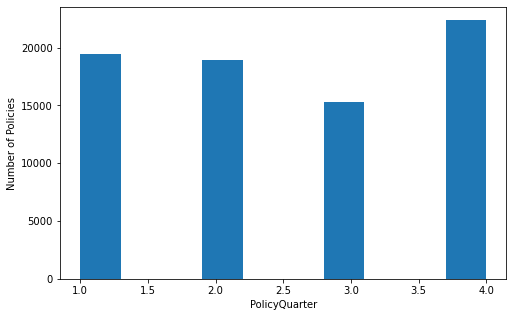

In [34]:
'''
observing distribution of Policies in full dataset: Quaterly
'''
plt.figure(figsize=(8, 5)) 
plt.hist(data['PolicyQuarter'])
plt.ylabel('Number of Policies') 
plt.xlabel('PolicyQuarter')
plt.show()

In [35]:
'''
Constructing 3 datasets based on median and means of Capital for PolicyStartAgeBin
'''
data1 = data[data['PolicyStartAge'] <24]
data2 = data[(data['PolicyStartAge']>=24) & (data['PolicyStartAge']<40)]
data3 = data[data['PolicyStartAge'] >=40]

In [36]:
'''
Defining a list of operations (metrices) to get in groupby 
'''
operations={'Capital':['mean', 'median', 'min', 'max', 'count'], 'PolicyStartAge':['mean', 'median'], 'Age':['mean', 'median']}

In [37]:
'''
Now, we explore the 3 datasets wrt some features 
'''

'\nNow, we explore the 3 datasets wrt some features \n'

<AxesSubplot:xlabel='PolicyMonth'>

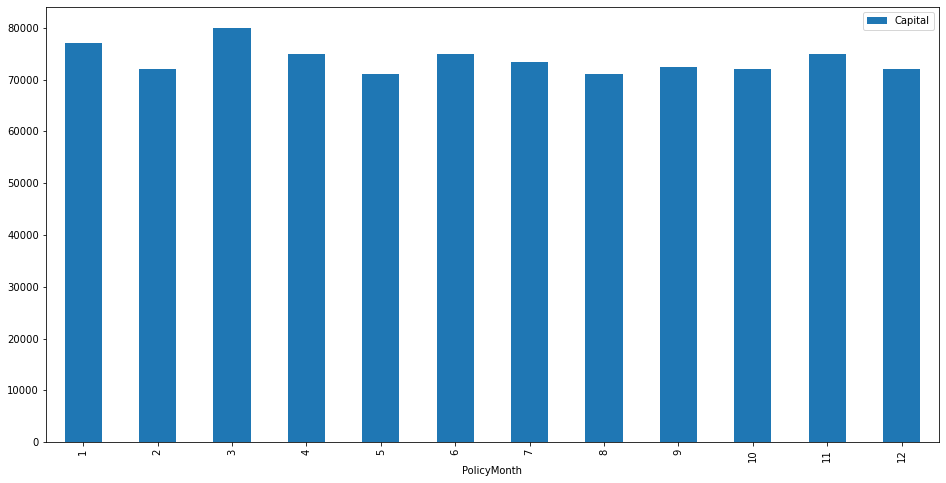

In [38]:
'''
Observing median Capital for each Policy Month 
'''
table = pd.pivot_table(data1, index=['PolicyMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=True)

<AxesSubplot:xlabel='PolicyMonth'>

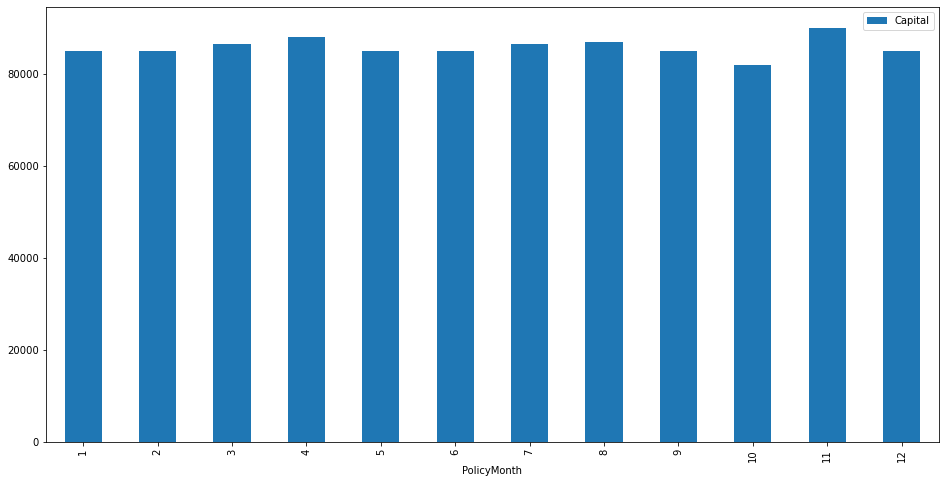

In [39]:
'''
Observing median Capital for each Policy Month 
'''
table = pd.pivot_table(data2, index=['PolicyMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=True)

<AxesSubplot:xlabel='PolicyMonth'>

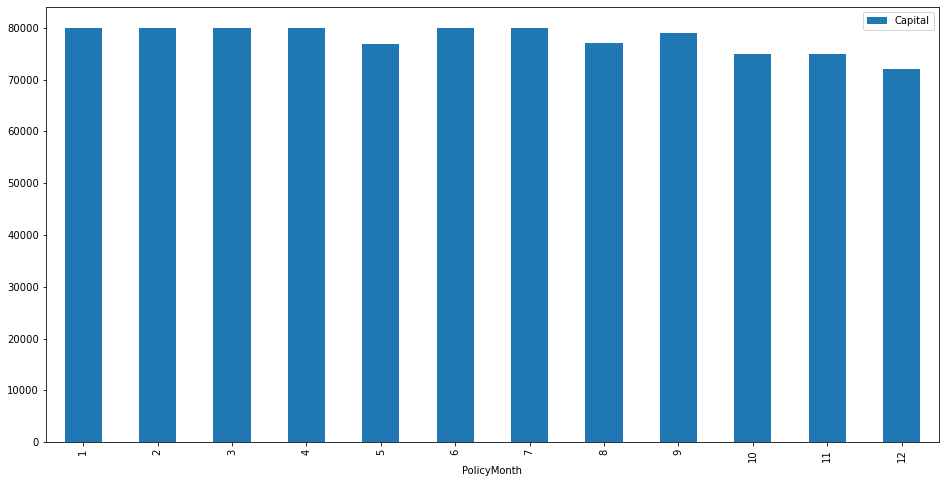

In [40]:
'''
Observing median Capital for each Policy Month 
'''
table = pd.pivot_table(data3, index=['PolicyMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=True)

<AxesSubplot:xlabel='PolicyQuarter'>

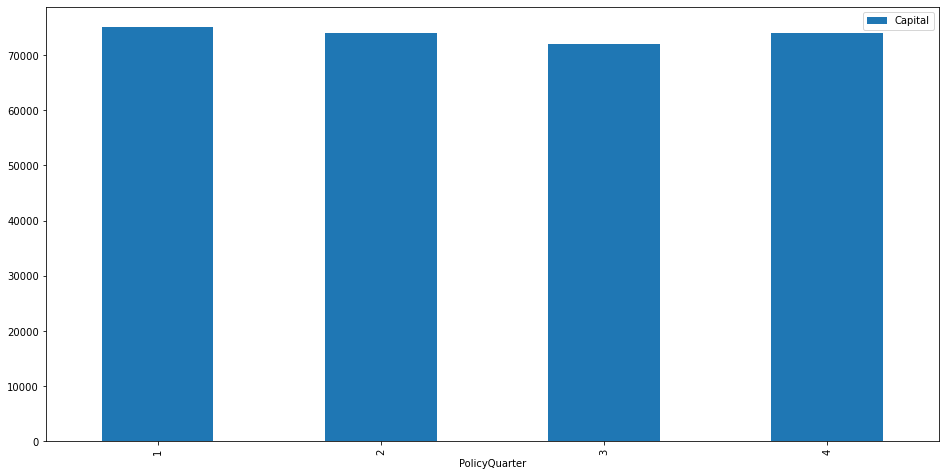

In [41]:
'''
Observing median Capital for each Policy Quarter for data1
'''
table = pd.pivot_table(data1, index=['PolicyQuarter'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=True)

<AxesSubplot:xlabel='PolicyQuarter'>

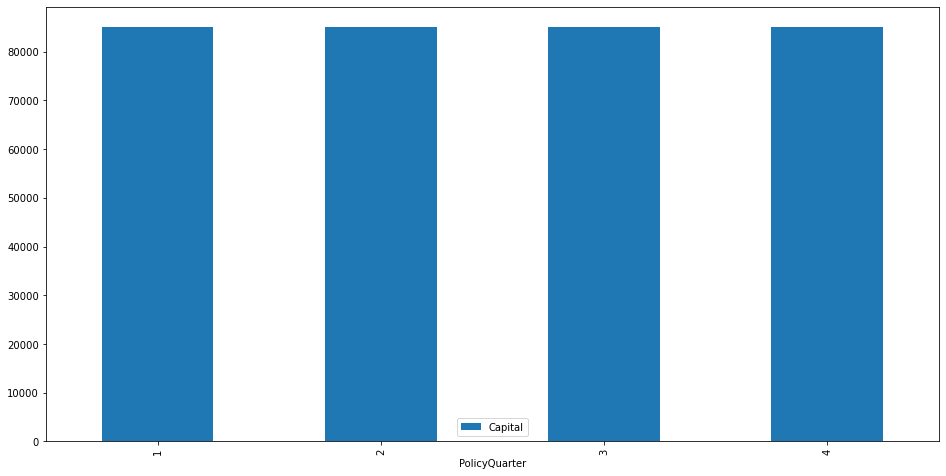

In [42]:
'''
Observing median Capital for each Policy Quarter for data2
'''
table = pd.pivot_table(data2, index=['PolicyQuarter'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=True)

<AxesSubplot:xlabel='PolicyQuarter'>

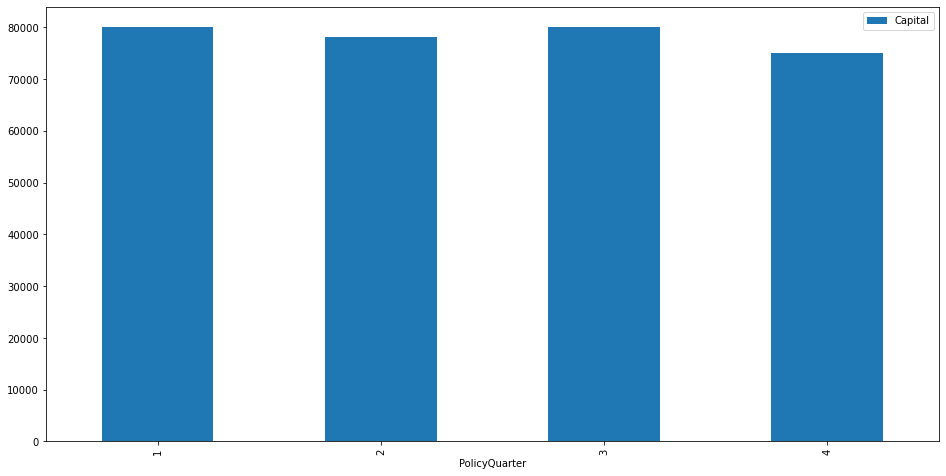

In [43]:
'''
Observing median Capital for each Policy Quarter for data3
'''
table = pd.pivot_table(data3, index=['PolicyQuarter'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=True)

<AxesSubplot:xlabel='PolicyMonth'>

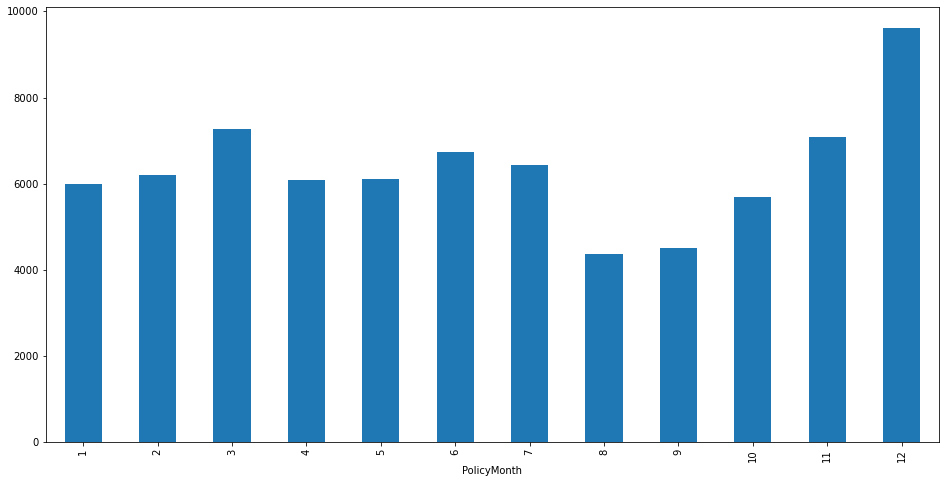

In [44]:
'''
observing distribution of Policies monthly for full dataset
'''
table = pd.pivot_table(data, index=['PolicyMonth'],values=['Capital'], aggfunc='count').astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

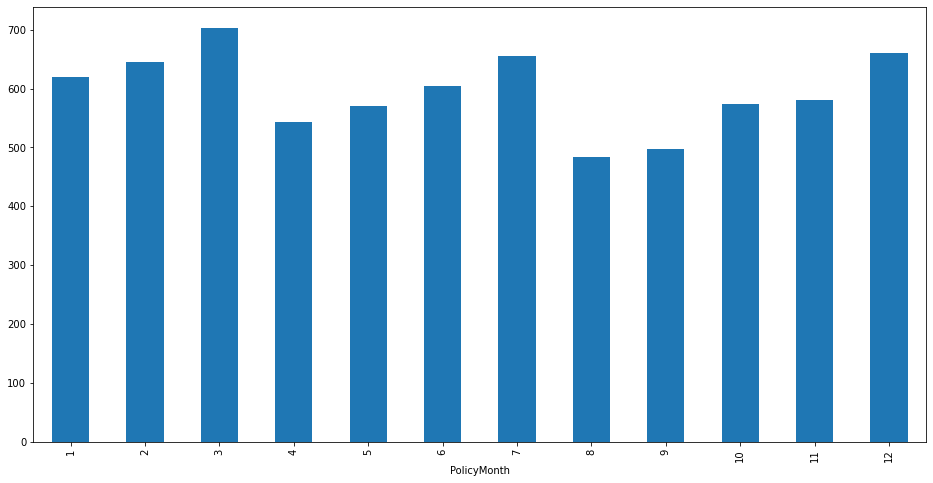

In [45]:
'''
observing distribution of Policies monthly for data1
'''
table = pd.pivot_table(data1, index=['PolicyMonth'],values=['Capital'], aggfunc='count').astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

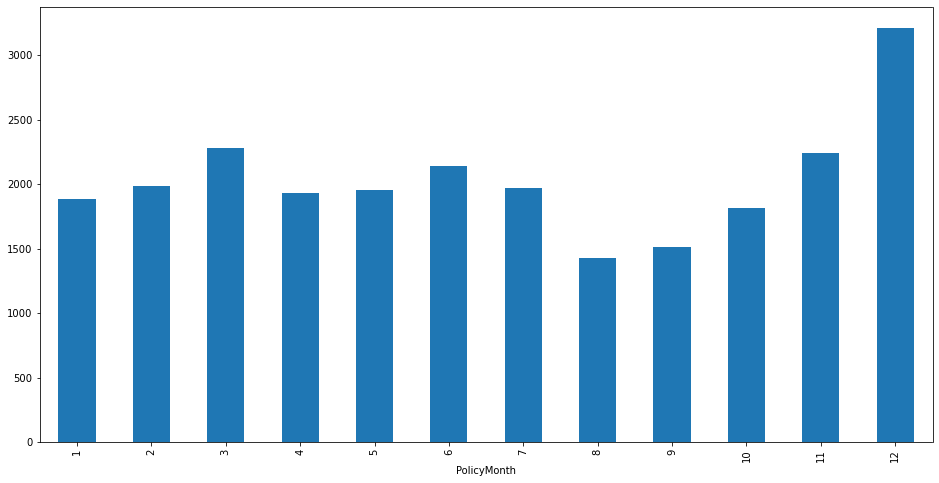

In [46]:
'''
observing distribution of Policies monthly for data2
'''
table = pd.pivot_table(data2, index=['PolicyMonth'],values=['Capital'], aggfunc='count').astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

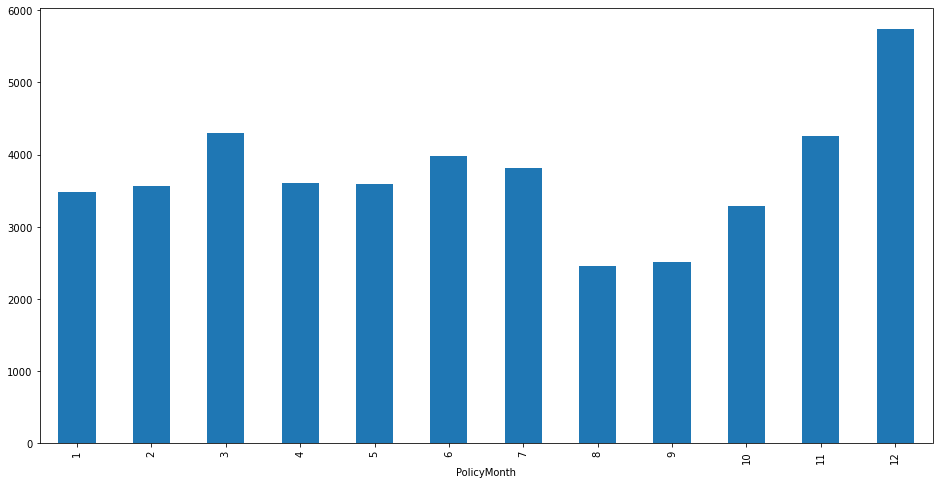

In [47]:
'''
observing distribution of Policies monthly for data3
'''

table = pd.pivot_table(data3, index=['PolicyMonth'],values=['Capital'], aggfunc='count').astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

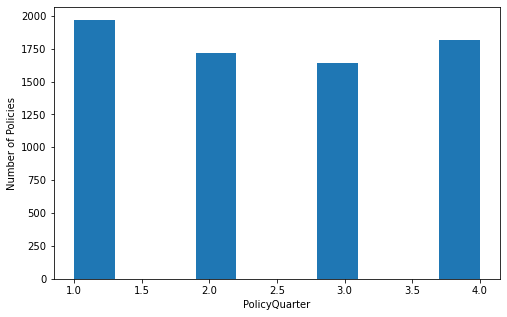

In [48]:
'''
observing quarterly distribution of Policies for data1
'''
plt.figure(figsize=(8, 5)) 
plt.hist(data1['PolicyQuarter'])
plt.ylabel('Number of Policies') 
plt.xlabel('PolicyQuarter')
plt.show()

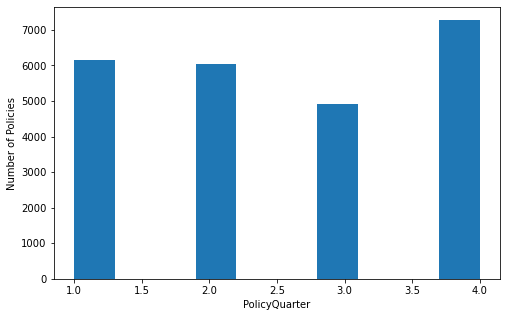

In [49]:
'''
observing quarterly distribution of Policies for data2
'''
plt.figure(figsize=(8, 5)) 
plt.hist(data2['PolicyQuarter'])
plt.ylabel('Number of Policies') 
plt.xlabel('PolicyQuarter')
plt.show()

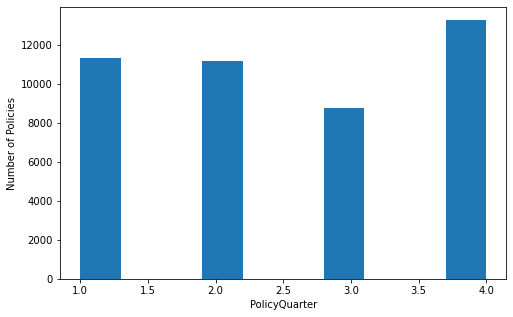

In [50]:
'''
observing quarterly distribution of Policies for data3
'''
plt.figure(figsize=(8, 5)) 
plt.hist(data3['PolicyQuarter'])
plt.ylabel('Number of Policies') 
plt.xlabel('PolicyQuarter')
plt.show()

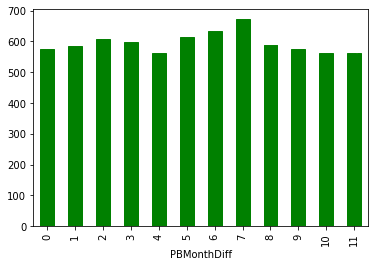

In [51]:
'''
plotting the frequency of 'PBMonthDiff'
'''
ax=data1.groupby(['PBMonthDiff']).count().plot(kind='bar', edgecolor='green', legend=False)


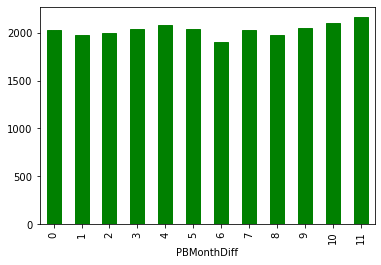

In [52]:
'''
plotting the frequency of 'PBMonthDiff'
'''
ax=data2.groupby(['PBMonthDiff']).count().plot(kind='bar', edgecolor='green', legend=False)

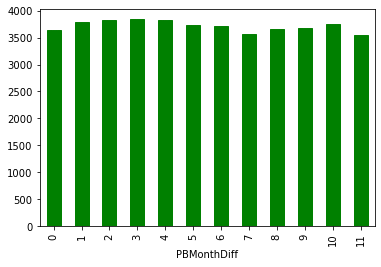

In [53]:
'''
plotting the frequency of 'PBMonthDiff'
'''
ax=data3.groupby(['PBMonthDiff']).count().plot(kind='bar', edgecolor='green', legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

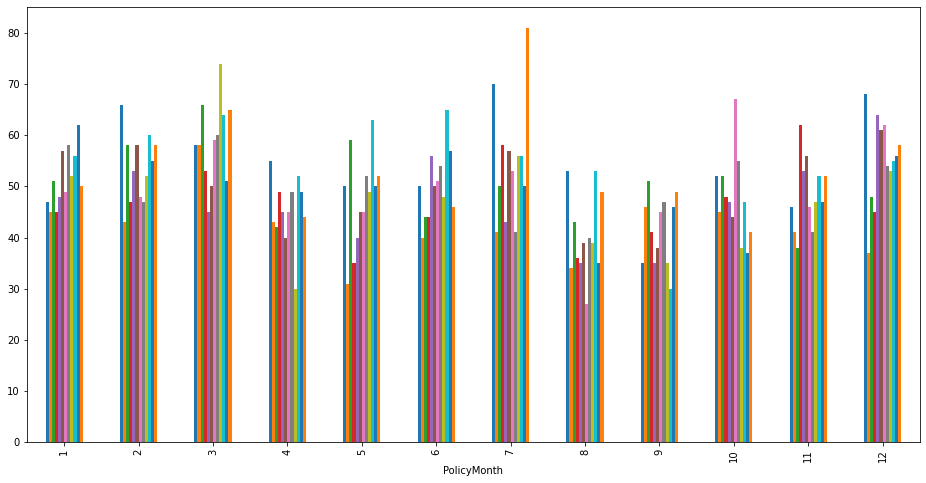

In [54]:
'''
Observing policy taken wrt joint distribution of Policy Month and Birth Month
'''
table = pd.pivot_table(data1, index=['PolicyMonth'], columns=['BirthMonth'], values=['Capital'], aggfunc="count")
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

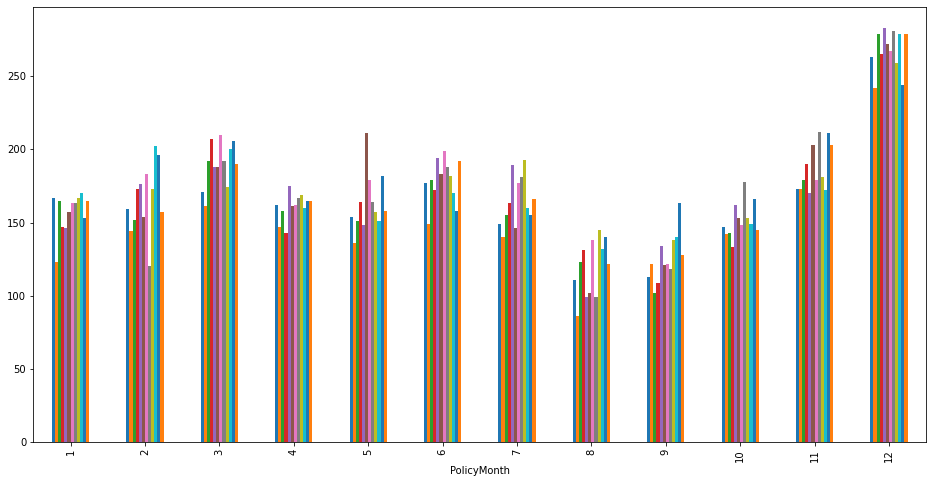

In [55]:
'''
Observing policy taken wrt joint distribution of Policy Month and Birth Month
'''
table = pd.pivot_table(data2, index=['PolicyMonth'], columns=['BirthMonth'], values=['Capital'], aggfunc="count")
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

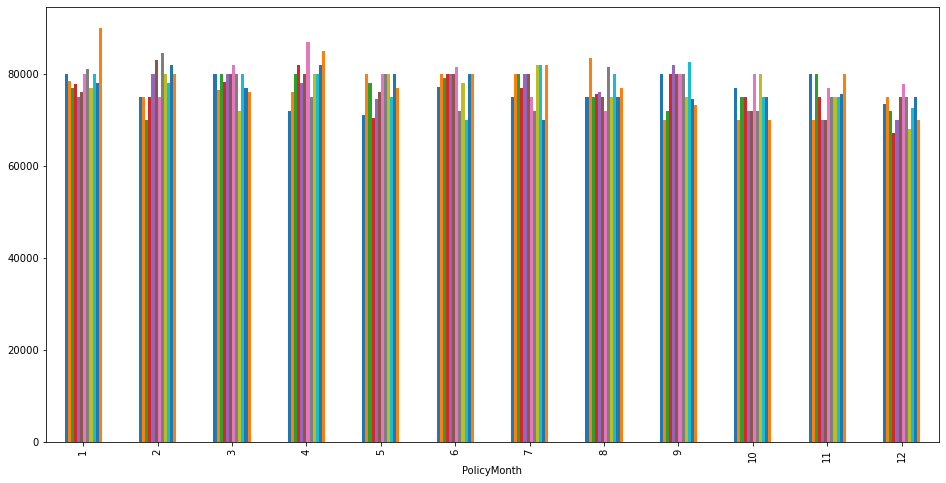

In [56]:
'''
plotting joint frequency distribution of Capital based on PolicyMonth and BirthMonth to look for any sentiment's driven purchase
'''

table = pd.pivot_table(data3, index=['PolicyMonth'], columns=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

Text(0.5, 0.98, '')

<Figure size 2160x1440 with 0 Axes>

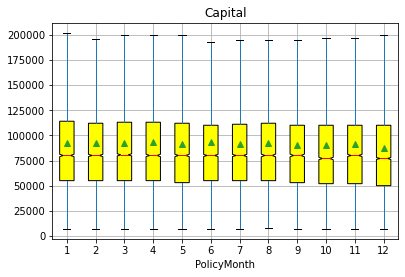

In [57]:
'''
observing boxplot of Capital for each Policy Month for full dataset
'''

plt.figure(figsize=(30, 20))
data.boxplot(column=['Capital'], by='PolicyMonth',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

Text(0.5, 0.98, '')

<Figure size 2160x1440 with 0 Axes>

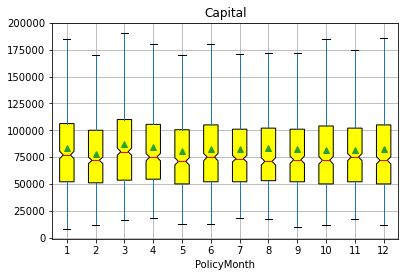

In [58]:
'''
observing boxplot of Capital for each Policy Month for data1
'''

plt.figure(figsize=(30, 20))
data1.boxplot(column=['Capital'], by='PolicyMonth',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

Text(0.5, 0.98, '')

<Figure size 2160x1440 with 0 Axes>

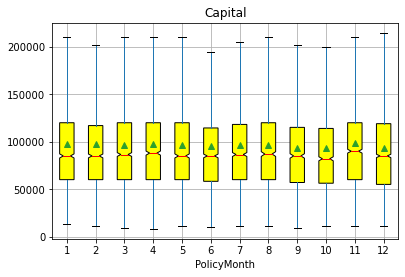

In [59]:
'''
observing boxplot of Capital for each Policy Month for data2
'''

plt.figure(figsize=(30, 20))
data2.boxplot(column=['Capital'], by='PolicyMonth',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

Text(0.5, 0.98, '')

<Figure size 2160x1440 with 0 Axes>

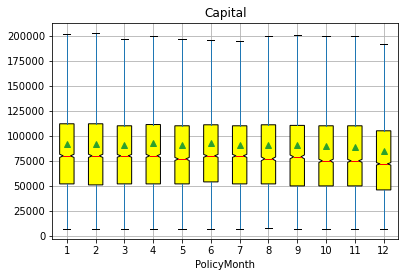

In [60]:
'''
observing boxplot of Capital for each Policy Month for data3
'''

plt.figure(figsize=(30, 20))
data3.boxplot(column=['Capital'], by='PolicyMonth',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

Text(0.5, 0.98, '')

<Figure size 2160x1440 with 0 Axes>

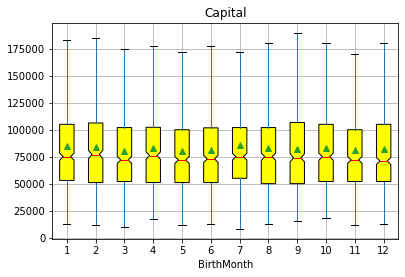

In [61]:
'''
observing boxplot of Capital for each Birth Month for data1
'''

plt.figure(figsize=(30, 20))
data1.boxplot(column=['Capital'], by='BirthMonth',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

Text(0.5, 0.98, '')

<Figure size 2160x1440 with 0 Axes>

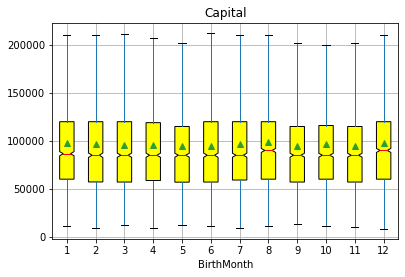

In [62]:
'''
observing boxplot of Capital for each Birth Month for data2
'''

plt.figure(figsize=(30, 20))
data2.boxplot(column=['Capital'], by='BirthMonth',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

Text(0.5, 0.98, '')

<Figure size 2160x1440 with 0 Axes>

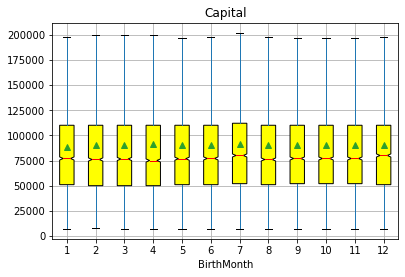

In [63]:

'''
observing boxplot of Capital for each Birth Month for data3
'''

plt.figure(figsize=(30, 20))
data3.boxplot(column=['Capital'], by='BirthMonth',vert=True, notch=True,  patch_artist=True, boxprops = dict(facecolor = "yellow"), showmeans = True,  showfliers = False, medianprops = dict(color = "red"))
plt.suptitle('')

<AxesSubplot:xlabel='PolicyMonth'>

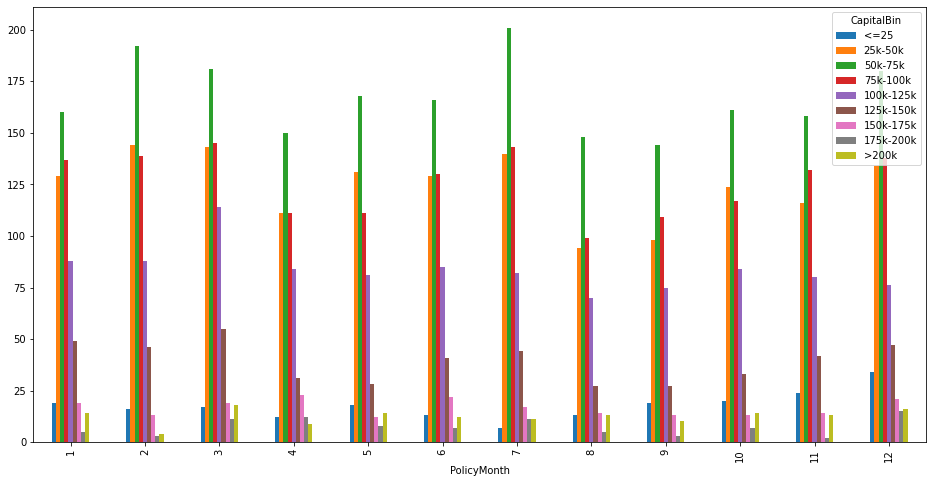

In [64]:
'''
Observing distribution of different Capital size for each Policy Month 
'''
crosstb= pd.crosstab(data1['PolicyMonth'],data1['CapitalBin'])
crosstb.plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='PolicyMonth'>

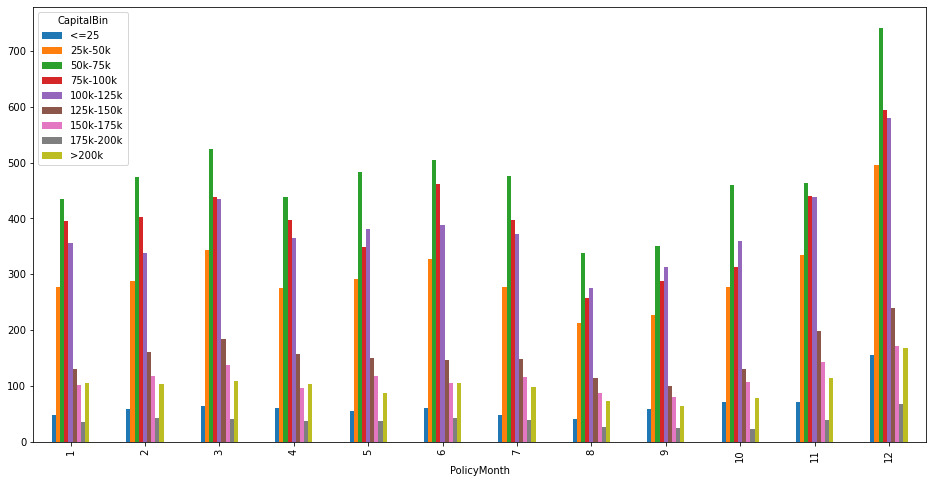

In [65]:
'''
Observing distribution of different Capital size for each Policy Month 
'''
crosstb= pd.crosstab(data2['PolicyMonth'],data2['CapitalBin'])
crosstb.plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='PolicyMonth'>

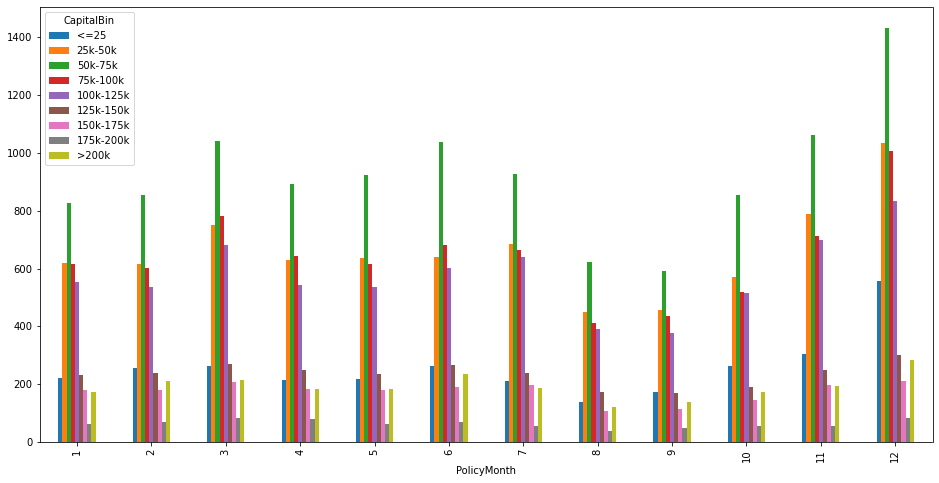

In [66]:
crosstb= pd.crosstab(data3['PolicyMonth'],data3['CapitalBin'])
crosstb.plot(kind='bar', figsize=(16, 8))

<AxesSubplot:xlabel='PolicyMonth'>

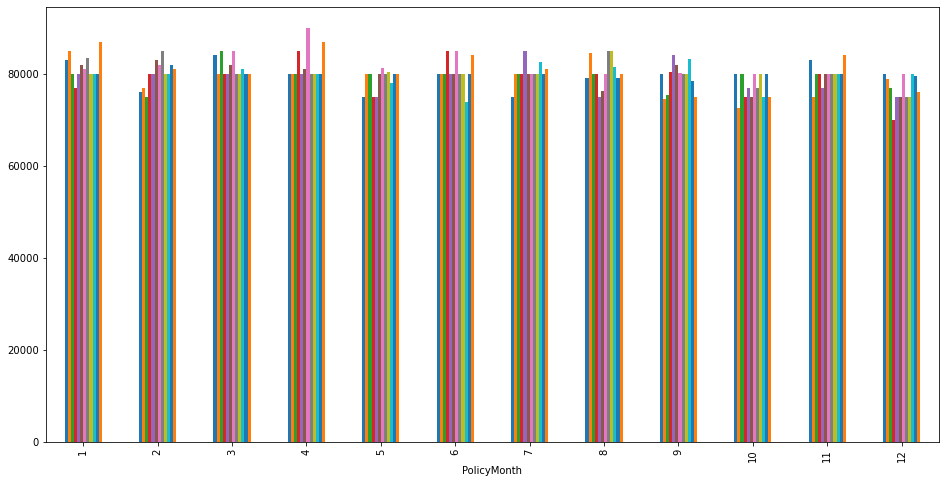

In [67]:
'''
observing median Capital for joint distribution of PolicyMonth and BirthMonth for data 
'''
table = pd.pivot_table(data, index=['PolicyMonth'], columns=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

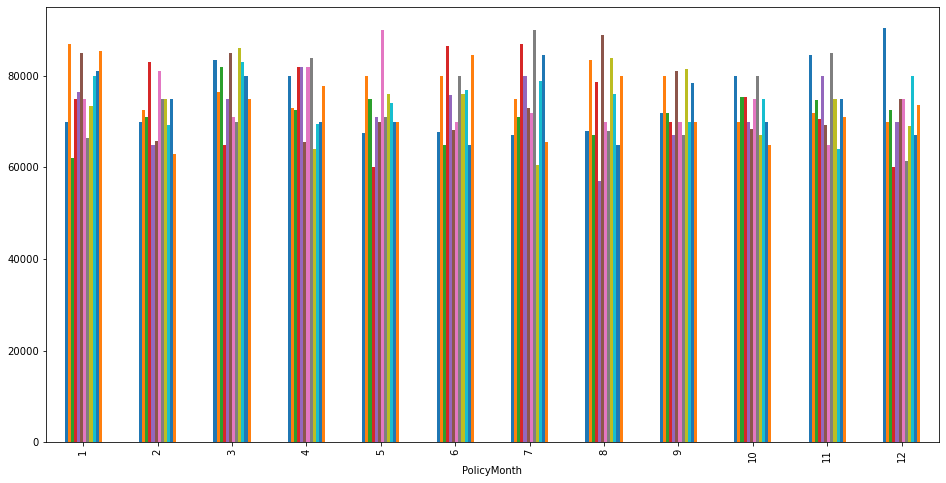

In [68]:
'''
observing median Capital for joint distribution of PolicyMonth and BirthMonth for data1 
'''
table = pd.pivot_table(data1, index=['PolicyMonth'], columns=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

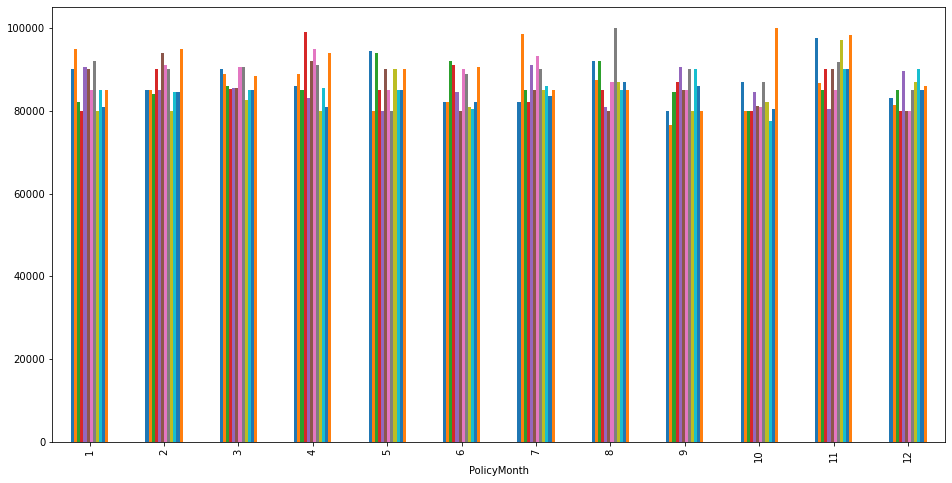

In [69]:
'''
observing median Capital for joint distribution of PolicyMonth and BirthMonth for data2 
'''
table = pd.pivot_table(data2, index=['PolicyMonth'], columns=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PolicyMonth'>

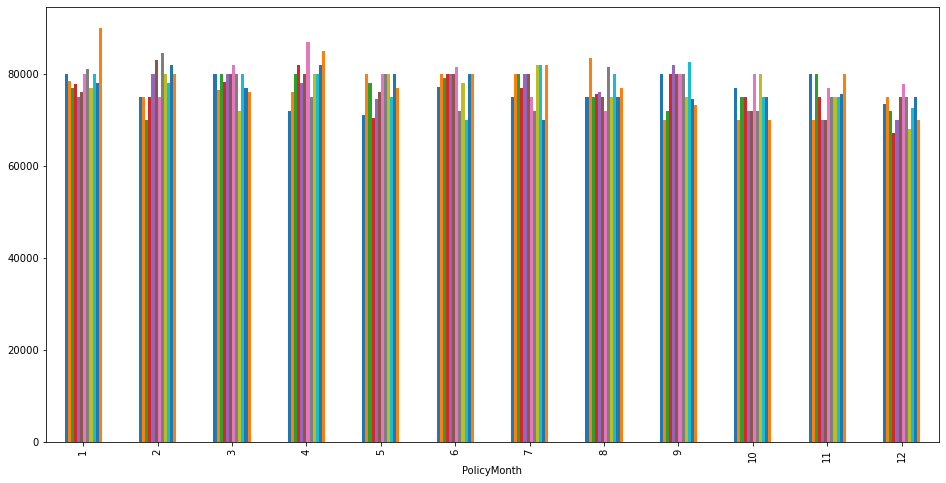

In [70]:
'''
observing median Capital for joint distribution of PolicyMonth and BirthMonth for data2 
'''
table = pd.pivot_table(data3, index=['PolicyMonth'], columns=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

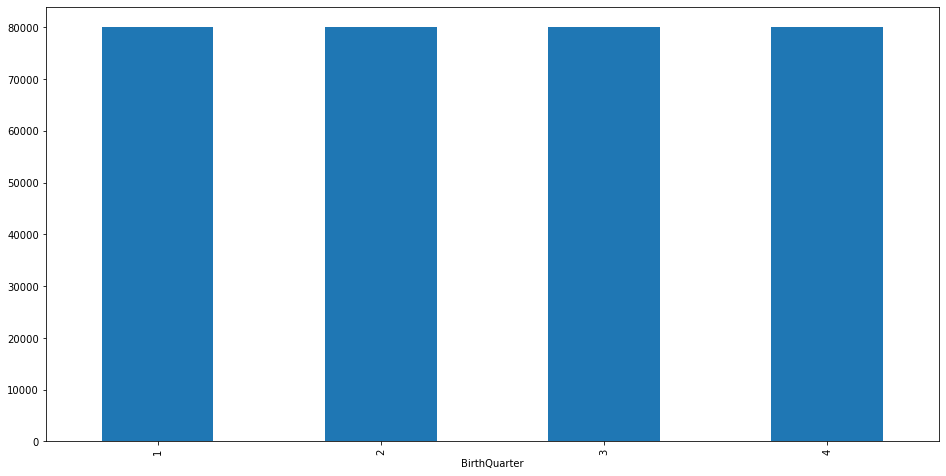

In [71]:
'''
observing median Capital for each Birth Quarter for full dataset
'''
table = pd.pivot_table(data, index=['BirthQuarter'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

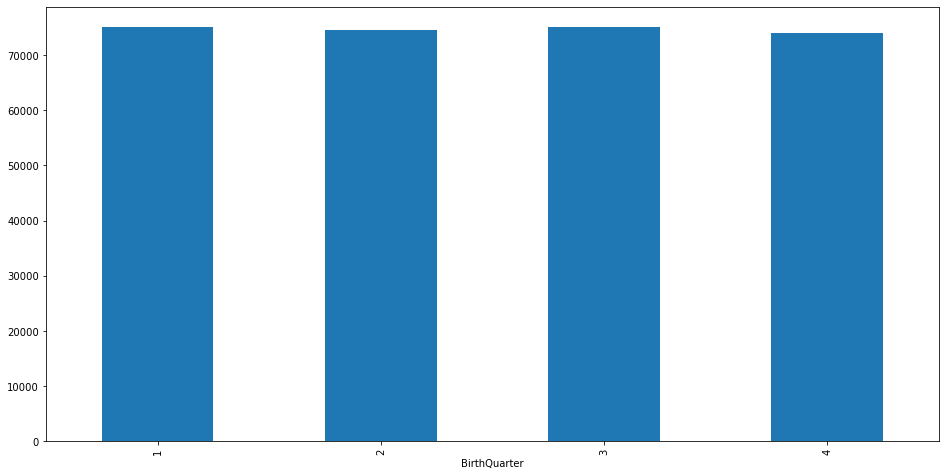

In [72]:
'''
observing median Capital for each Birth Quarter for data1
'''

table = pd.pivot_table(data1, index=['BirthQuarter'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

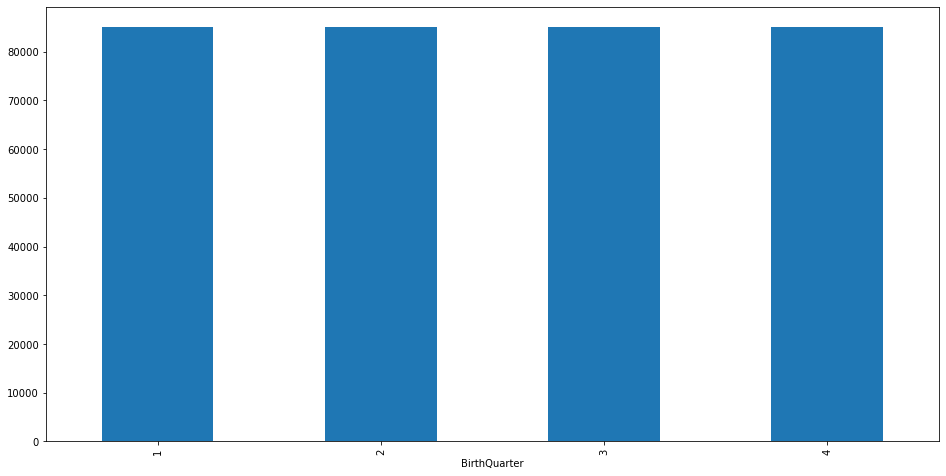

In [73]:
'''
observing median Capital for each Birth Quarter for data2
'''

table = pd.pivot_table(data2, index=['BirthQuarter'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

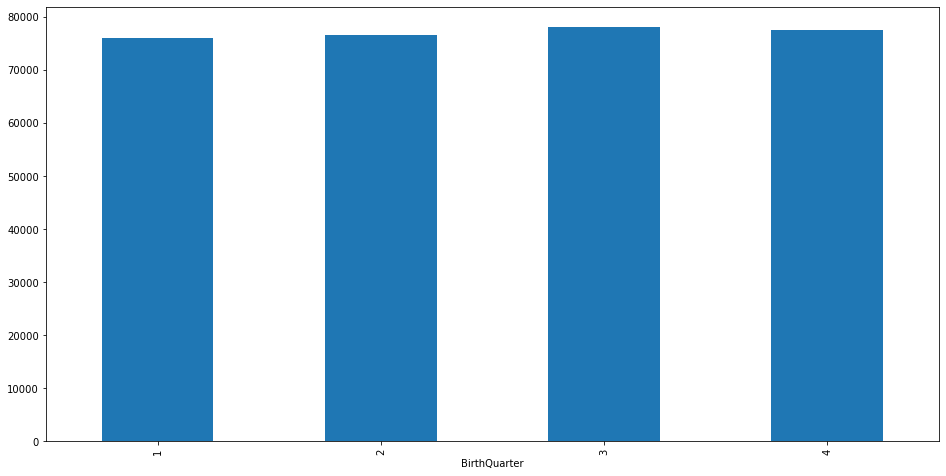

In [74]:
'''
observing median Capital for each Birth Quarter for data3
'''
table = pd.pivot_table(data3, index=['BirthQuarter'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PBMonthDiff'>

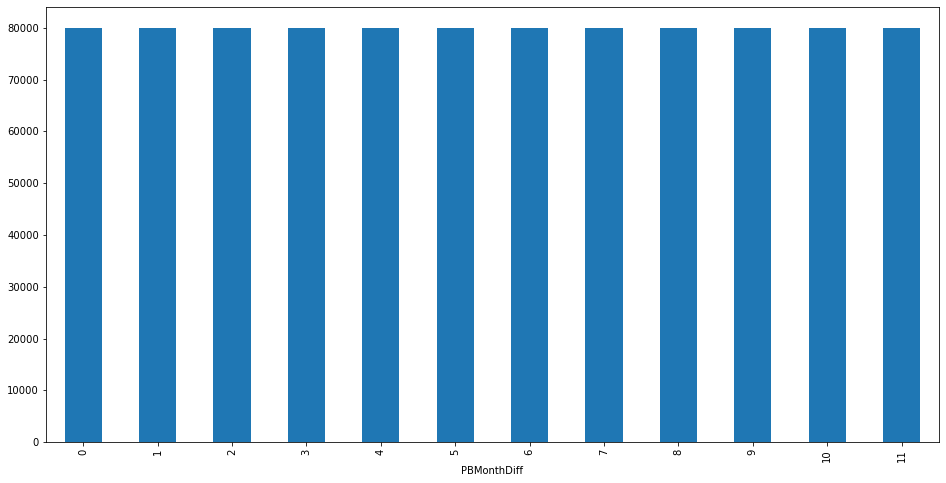

In [75]:
'''
Plotting median Capital for each PBMonthDiff for full dataset
'''

table = pd.pivot_table(data, index=['PBMonthDiff'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PBMonthDiff'>

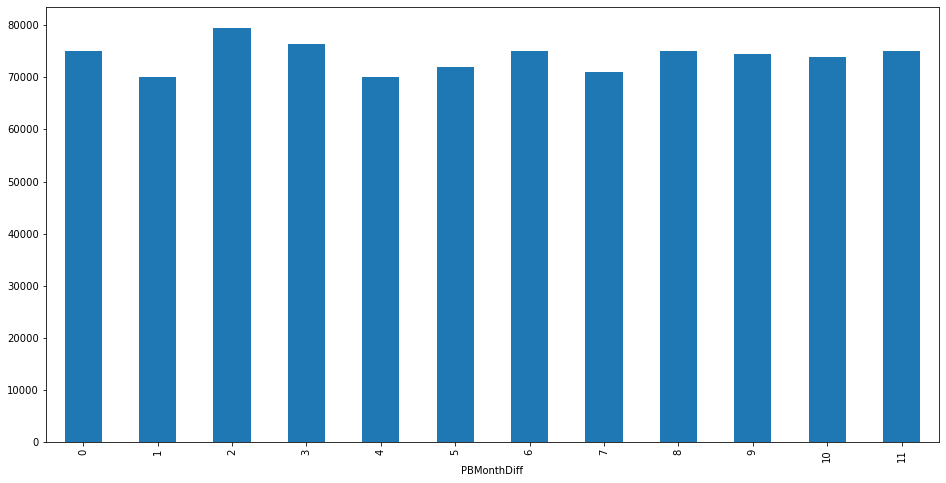

In [76]:
'''
Plotting median Capital for each PBMonthDiff for data 1
'''

table = pd.pivot_table(data1, index=['PBMonthDiff'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PBMonthDiff'>

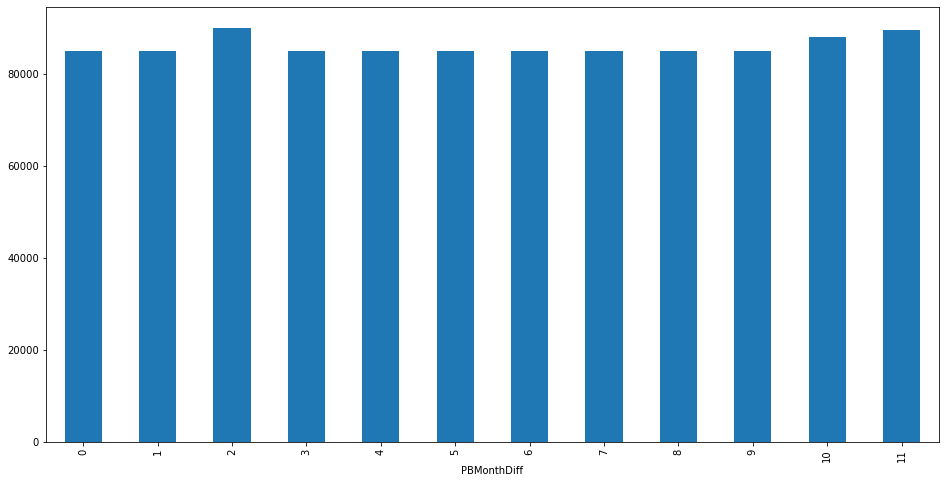

In [77]:
'''
Plotting median Capital for each PBMonthDiff for data2
'''

table = pd.pivot_table(data2, index=['PBMonthDiff'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='PBMonthDiff'>

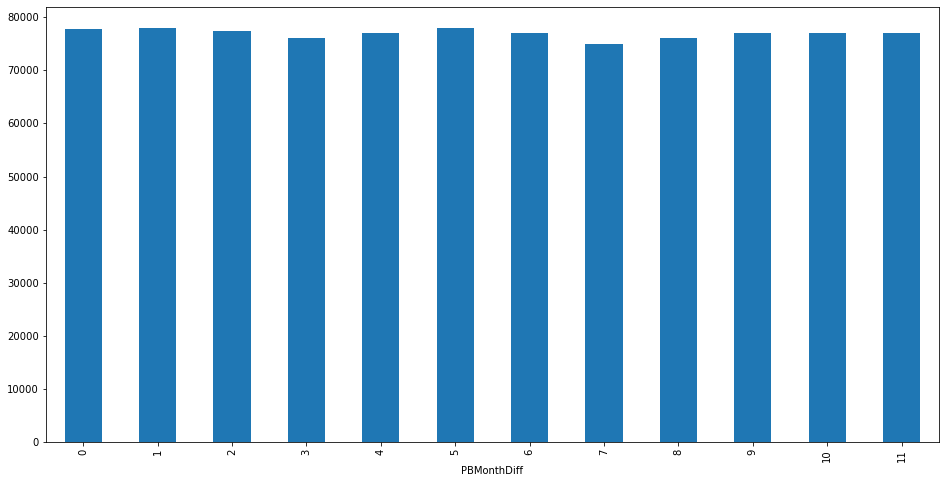

In [78]:
'''
Plotting median Capital for each PBMonthDiff for data3
'''

table = pd.pivot_table(data3, index=['PBMonthDiff'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

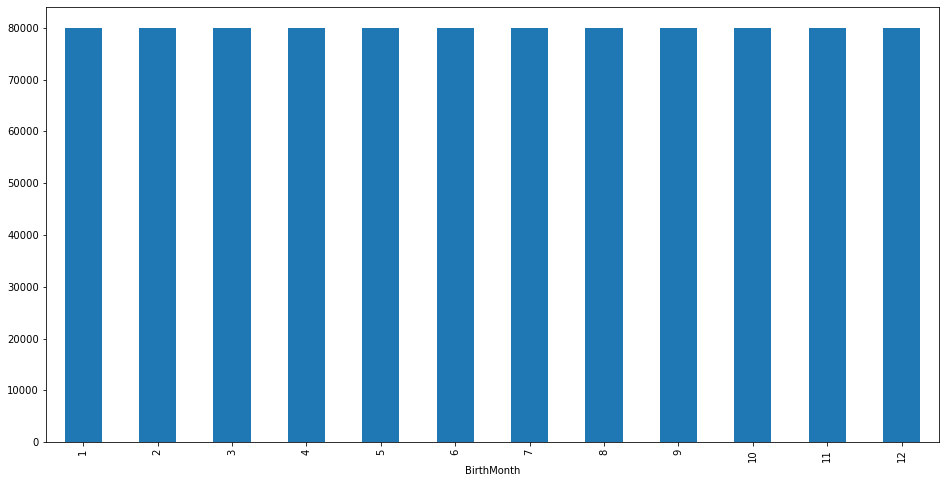

In [79]:
table = pd.pivot_table(data, index=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

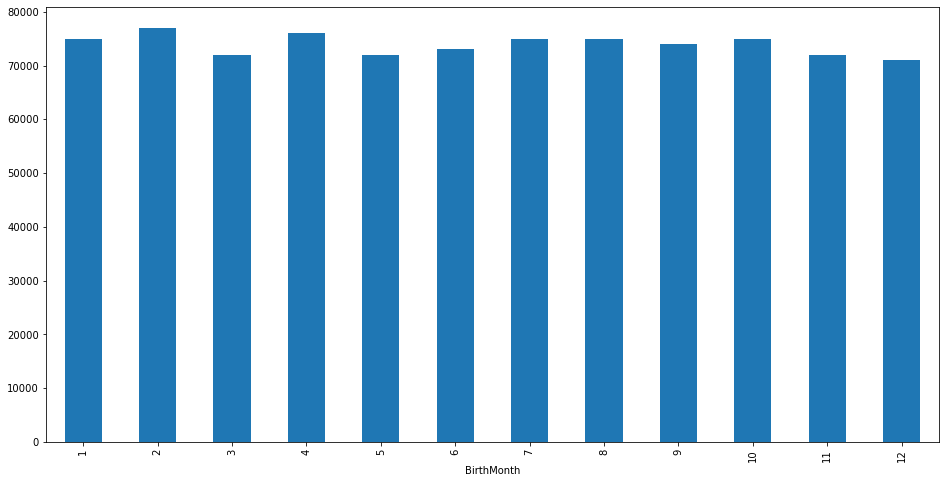

In [80]:
table = pd.pivot_table(data1, index=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

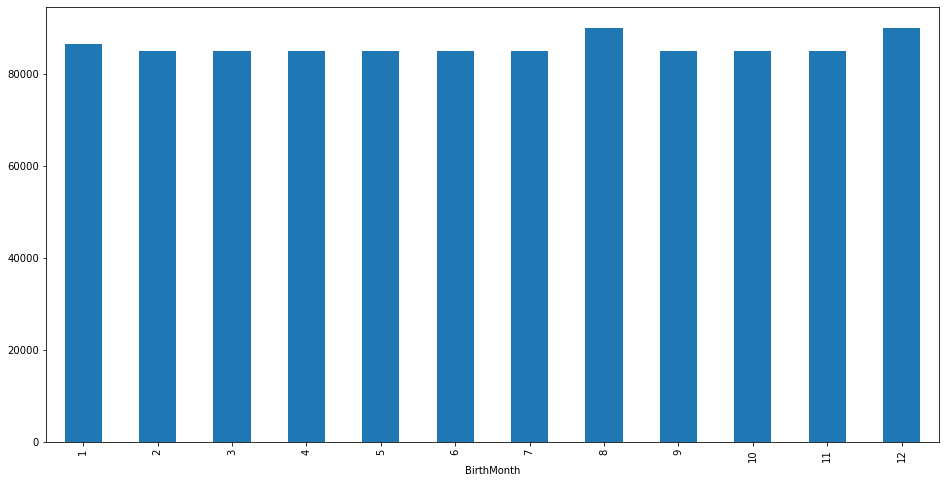

In [81]:
table = pd.pivot_table(data2, index=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

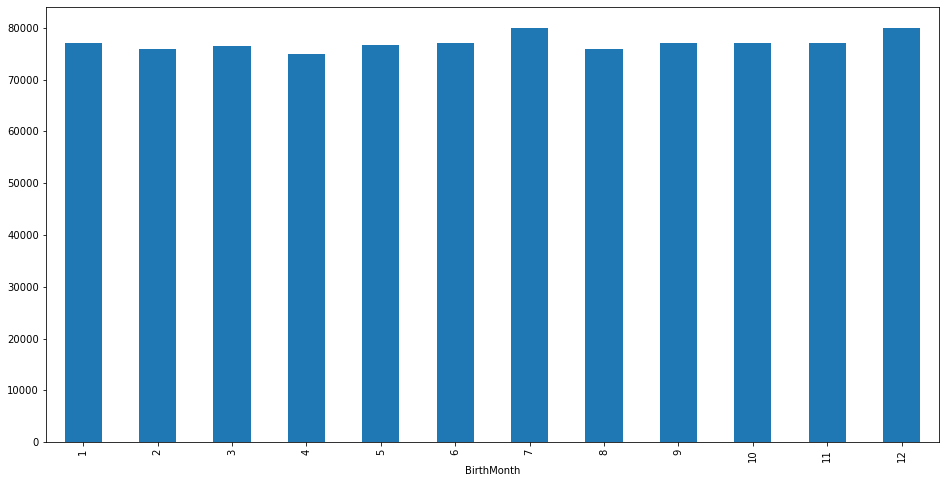

In [82]:
table = pd.pivot_table(data3, index=['BirthMonth'], values=['Capital'], aggfunc=np.median).astype(int)
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

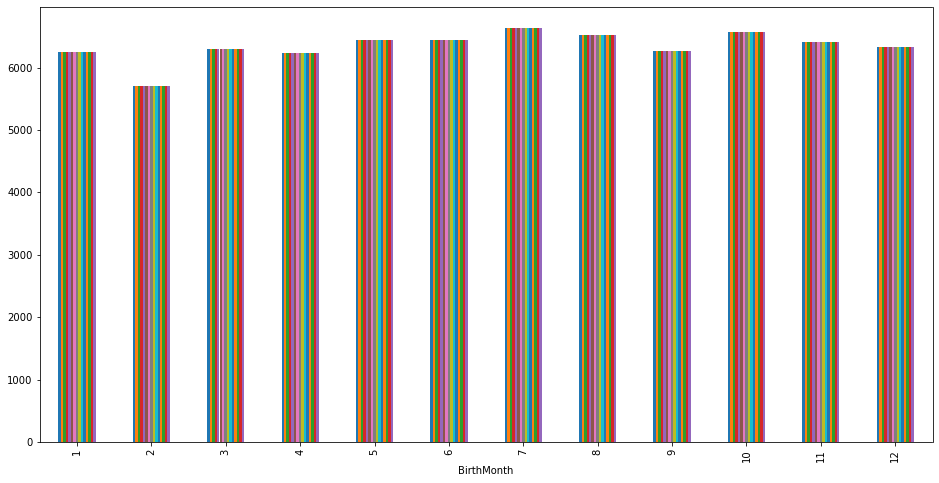

In [83]:
table=data.groupby(['BirthMonth']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

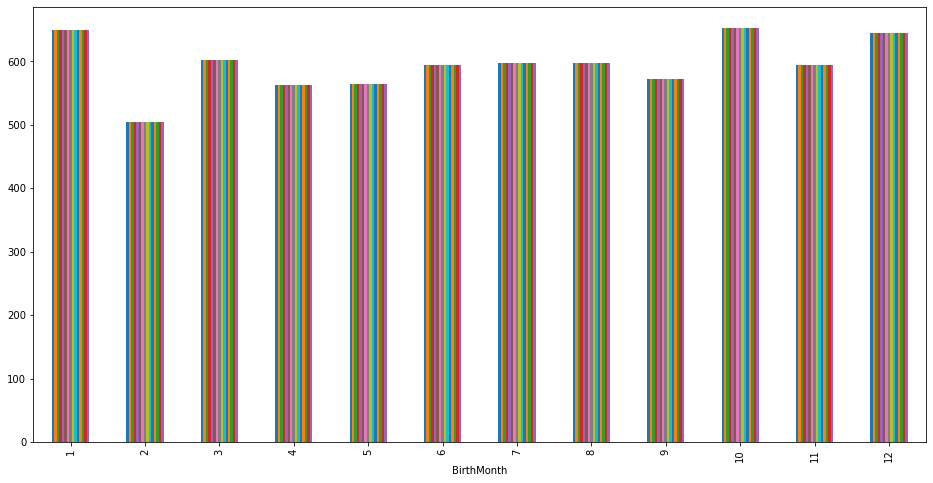

In [84]:
table=data1.groupby(['BirthMonth']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

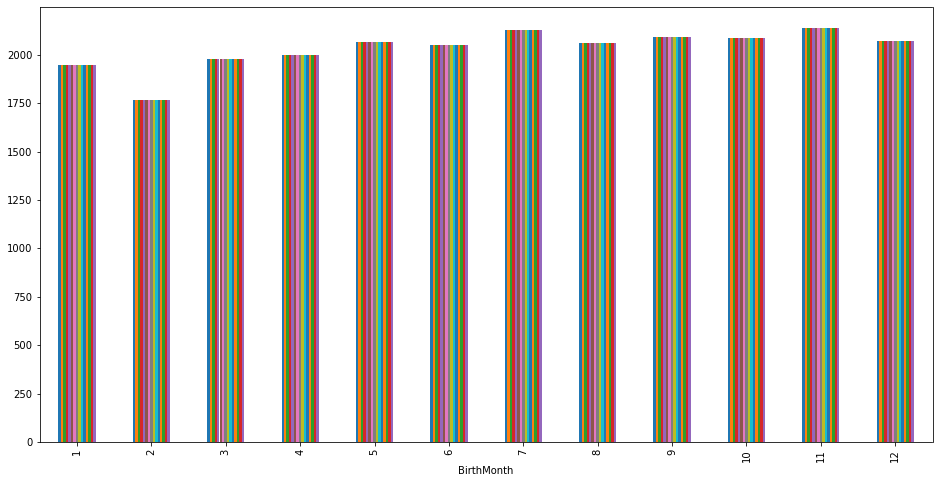

In [85]:
table=data2.groupby(['BirthMonth']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthMonth'>

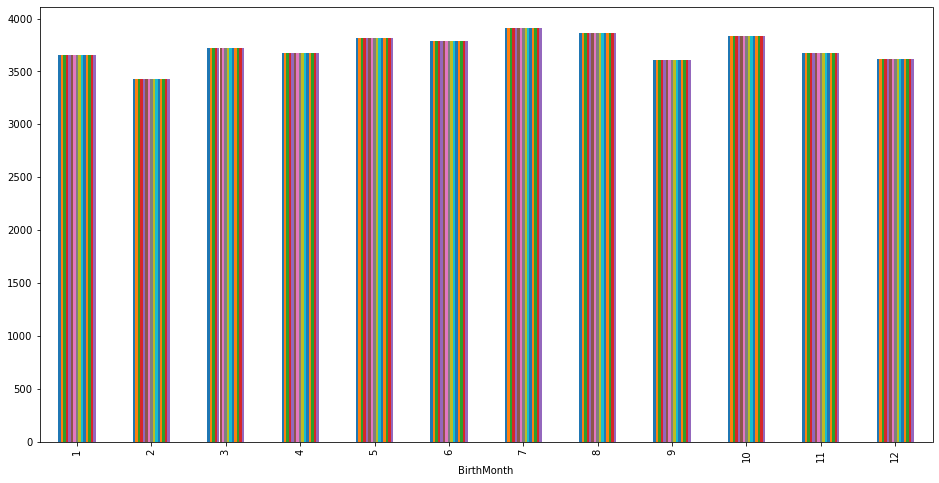

In [86]:
table=data3.groupby(['BirthMonth']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

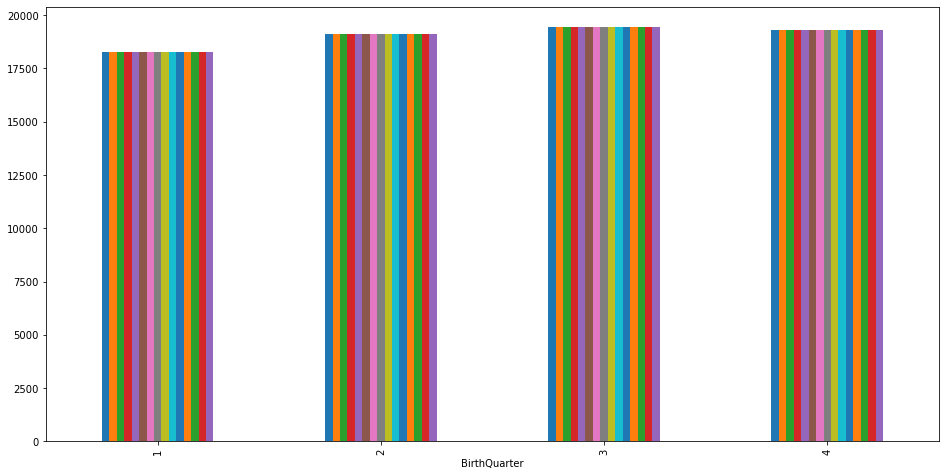

In [87]:
'''
observing policy frequecy wrt BirthQuarter
'''
table=data.groupby(['BirthQuarter']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

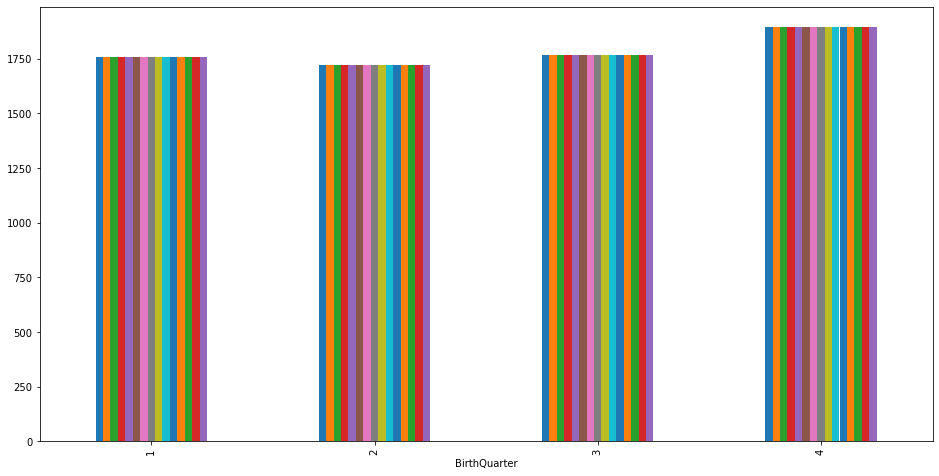

In [88]:
'''
observing policy frequecy wrt BirthQuarter for data1
'''

table=data1.groupby(['BirthQuarter']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

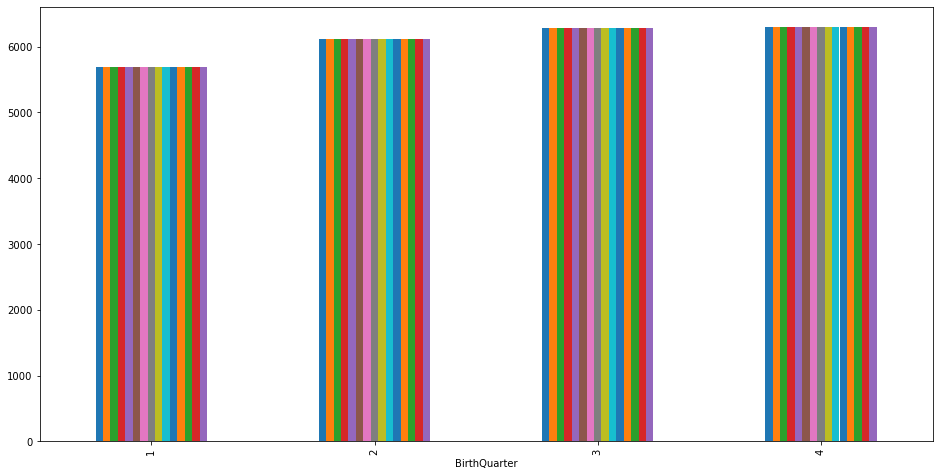

In [89]:
'''
observing policy frequecy wrt BirthQuarter for data2
'''
table=data2.groupby(['BirthQuarter']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthQuarter'>

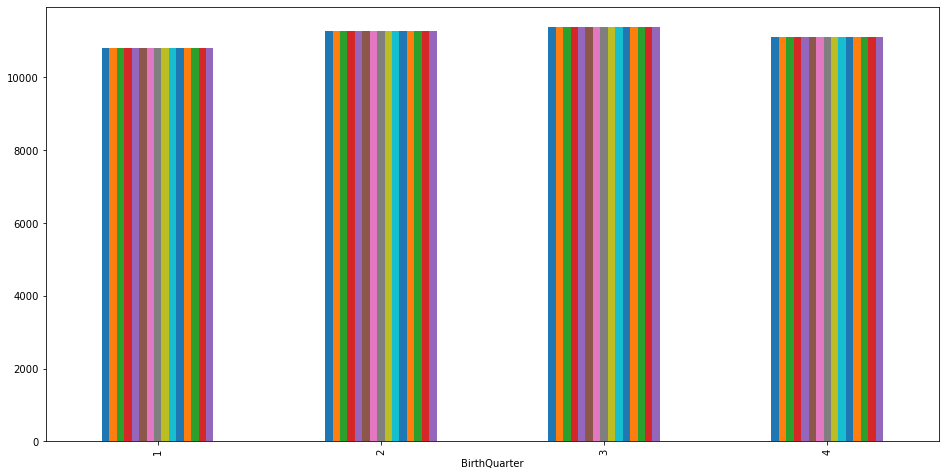

In [90]:
'''
observing policy frequecy wrt BirthQuarter for data3
'''

table=data3.groupby(['BirthQuarter']).count()
table.plot(kind='bar', figsize=(16, 8),legend=False)

<AxesSubplot:xlabel='BirthHalf'>

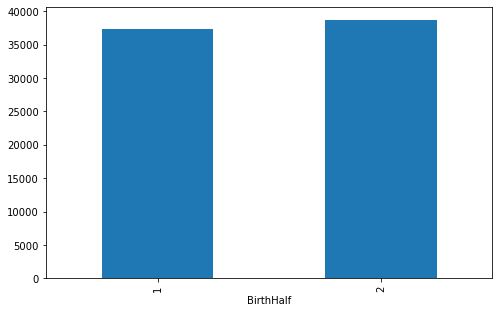

In [91]:
'''
observing policy frequecy wrt BirthHalf
'''

table = pd.pivot_table(data, index=['BirthHalf'], values=['Capital'], aggfunc="count").astype(int)
table.plot(kind='bar', figsize=(8, 5),legend=False)

<AxesSubplot:xlabel='BirthHalf'>

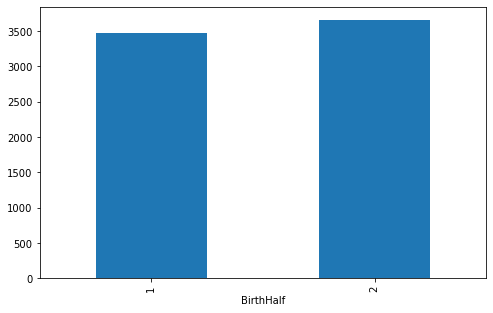

In [92]:
'''
observing policy frequecy wrt BirthHalf for data1
'''

table = pd.pivot_table(data1, index=['BirthHalf'], values=['Capital'], aggfunc="count").astype(int)
table.plot(kind='bar', figsize=(8, 5),legend=False)

<AxesSubplot:xlabel='BirthHalf'>

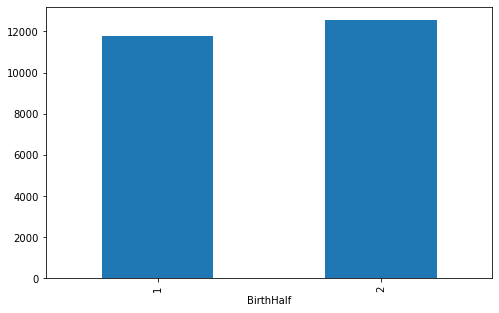

In [93]:
'''
observing policy frequecy wrt BirthHalf for data2
'''

table = pd.pivot_table(data2, index=['BirthHalf'], values=['Capital'], aggfunc="count").astype(int)
table.plot(kind='bar', figsize=(8, 5),legend=False)

<AxesSubplot:xlabel='BirthHalf'>

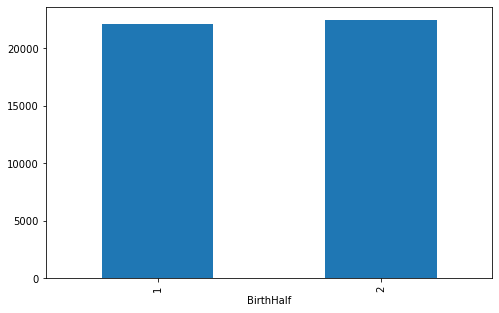

In [94]:
'''
observing policy frequecy wrt BirthHalf for data3
'''

table = pd.pivot_table(data3, index=['BirthHalf'], values=['Capital'], aggfunc="count").astype(int)
table.plot(kind='bar', figsize=(8, 5),legend=False)

# Section: Data1: Linear Regression

In [95]:
'''
Now we code for Linear Regression on data1
'''

'\nNow we code for Linear Regression on data1\n'

In [96]:
'''
Importing libraries
'''
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [97]:
data1.head(10)

,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff,PolicyStartAgeBin,CapitalBin,PolicyQuarter,BirthQuarter,PBQuarter,BirthHalf
32,33,30000.0,F,1976-09-01,2000-03-15,32.533881,23.535049,9,3,6,"(23.0, 24.0]",25k-50k,1,3,3,2
97,98,55000.0,M,1982-01-31,2000-04-02,27.167693,18.168751,1,4,3,"(18.0, 19.0]",50k-75k,2,1,2,1
168,169,35000.0,F,1981-09-28,2000-04-23,27.567420,18.568485,9,4,7,"(18.0, 19.0]",25k-50k,2,3,3,2
184,185,34000.0,M,1978-07-09,2000-04-24,30.792608,21.793740,7,4,9,"(21.0, 22.0]",25k-50k,2,3,4,2
210,211,80000.0,F,1977-02-24,2000-05-01,32.180698,23.181859,2,5,3,"(23.0, 24.0]",75k-100k,2,1,2,1
249,250,32000.0,M,1979-04-27,2000-05-08,30.031485,21.032602,4,5,1,"(21.0, 22.0]",25k-50k,2,2,1,1
332,333,23000.0,M,1979-12-18,2000-05-29,29.445585,20.446690,12,5,5,"(20.0, 21.0]",<=25,2,4,2,2
446,447,25000.0,F,1979-05-02,2000-06-25,30.149213,21.150332,5,6,1,"(21.0, 22.0]",<=25,2,2,1,1
460,461,55000.0,M,1976-08-05,2000-06-28,32.895277,23.896452,8,6,10,"(23.0, 24.0]",50k-75k,2,3,4,2
520,521,27000.0,M,1977-03-04,2000-07-10,32.350445,23.351609,3,7,4,"(23.0, 24.0]",25k-50k,3,1,2,1


In [98]:
'''
creating a subset of features we are interested in
'''
subset_feature = ['Capital', 'Gender', 'PolicyStartAge', 'PolicyQuarter', 'BirthQuarter','PBQuarter']
df=data1[subset_feature]

In [99]:
print (df.describe(include='all'))

             Capital Gender  PolicyStartAge  PolicyQuarter  BirthQuarter  \
count   7.139000e+03   7139     7139.000000    7139.000000   7139.000000   
unique           NaN      2             NaN            NaN           NaN   
top              NaN      M             NaN            NaN           NaN   
freq             NaN   4149             NaN            NaN           NaN   
mean    8.263850e+04    NaN       20.343611       2.462110      2.532007   
std     4.711975e+04    NaN        2.234628       1.143923      1.127575   
min     8.000000e+03    NaN        9.664812       1.000000      1.000000   
25%     5.200000e+04    NaN       18.890189       1.000000      2.000000   
50%     7.500000e+04    NaN       20.443952       2.000000      3.000000   
75%     1.050000e+05    NaN       22.071637       4.000000      4.000000   
max     1.007000e+06    NaN       23.997755       4.000000      4.000000   

          PBQuarter  
count   7139.000000  
unique          NaN  
top             NaN  

In [100]:
#plotting correlation matrix
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,PolicyStartAge,PolicyQuarter,BirthQuarter,PBQuarter
Capital,1.000000,-0.085630,-0.006913,0.000131,0.012575
PolicyStartAge,-0.085630,1.000000,0.006805,0.006878,0.070836
PolicyQuarter,-0.006913,0.006805,1.000000,-0.010220,0.009998
BirthQuarter,0.000131,0.006878,-0.010220,1.000000,-0.013431
PBQuarter,0.012575,0.070836,0.009998,-0.013431,1.000000


In [101]:
'''
encoding category features to dummy variables
'''

import category_encoders as ce
encoder=ce.OneHotEncoder(cols='Gender',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='PolicyQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='BirthQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='PBQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
print(df)

        Capital  Gender_F  Gender_M  PolicyStartAge  PolicyQuarter_1.0  \
32      30000.0       1.0       0.0       23.535049                1.0   
97      55000.0       0.0       1.0       18.168751                0.0   
168     35000.0       1.0       0.0       18.568485                0.0   
184     34000.0       0.0       1.0       21.793740                0.0   
210     80000.0       1.0       0.0       23.181859                0.0   
...         ...       ...       ...             ...                ...   
76029  106000.0       1.0       0.0       16.208409                0.0   
76030  102000.0       0.0       1.0       19.121543                1.0   
76048   40200.0       0.0       1.0       20.523351                0.0   
76071   72900.0       1.0       0.0       20.107189                0.0   
76079   82000.0       1.0       0.0       18.530155                0.0   

       PolicyQuarter_2.0  PolicyQuarter_3.0  PolicyQuarter_4.0  \
32                   0.0                0.0  

In [102]:
rowcount,columncount=df.shape

In [103]:
X = df.iloc[:,1:columncount]
Y = df.iloc[:,0]

In [104]:
'''
finding features importance using random forest
'''
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=340)
model.fit(X,Y)
importances =model.feature_importances_
final_df=pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importances":importances})
final_df.set_index('Importances')

,Features
Importances,
0.037172,Gender_F
0.038833,Gender_M
0.720669,PolicyStartAge
0.023002,PolicyQuarter_1.0
0.020075,PolicyQuarter_2.0
0.019193,PolicyQuarter_3.0
0.019783,PolicyQuarter_4.0
0.028088,BirthQuarter_3.0
0.020390,BirthQuarter_1.0


In [105]:
final_df.sort_values(by=['Importances'], ascending=False)

,Features,Importances
2,PolicyStartAge,0.720669
1,Gender_M,0.038833
0,Gender_F,0.037172
7,BirthQuarter_3.0,0.028088
9,BirthQuarter_2.0,0.023854
3,PolicyQuarter_1.0,0.023002
8,BirthQuarter_1.0,0.020390
4,PolicyQuarter_2.0,0.020075
6,PolicyQuarter_4.0,0.019783
5,PolicyQuarter_3.0,0.019193


<AxesSubplot:>

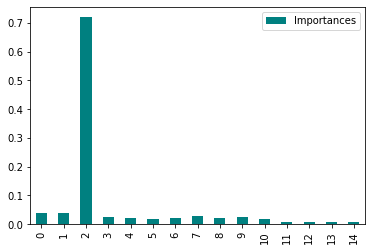

In [106]:
#plot the feature importances in bars
final_df.plot.bar(color='teal')

In [107]:
'''
plot again correlation matrix
'''
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,Gender_F,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_3.0,PolicyQuarter_4.0,BirthQuarter_3.0,BirthQuarter_1.0,BirthQuarter_2.0,BirthQuarter_4.0,PBQuarter_3.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
Capital,1.000000,-0.015240,0.015240,-0.085630,0.006671,-0.002278,0.002169,-0.006703,0.013104,0.004129,-0.013017,-0.004226,0.004946,-0.007438,0.009972,-0.007454
Gender_F,-0.015240,1.000000,-1.000000,0.058313,-0.025574,0.008658,0.011064,0.007062,0.014809,-0.003599,0.002509,-0.013403,0.010969,-0.000274,-0.006391,-0.004648
Gender_M,0.015240,-1.000000,1.000000,-0.058313,0.025574,-0.008658,-0.011064,-0.007062,-0.014809,0.003599,-0.002509,0.013403,-0.010969,0.000274,0.006391,0.004648
PolicyStartAge,-0.085630,0.058313,-0.058313,1.000000,-0.022358,0.027581,-0.003325,-0.000928,0.012632,-0.006419,-0.005743,-0.000523,0.000712,-0.018830,0.067144,-0.048126
PolicyQuarter_1.0,0.006671,-0.025574,0.025574,-0.022358,1.000000,-0.347427,-0.336503,-0.360201,0.008437,0.005769,-0.013703,-0.000597,-0.016475,0.017180,-0.015724,0.015176
PolicyQuarter_2.0,-0.002278,0.008658,-0.008658,0.027581,-0.347427,1.000000,-0.307187,-0.328820,-0.002062,-0.006715,-0.008148,0.016465,0.002952,-0.009401,0.012230,-0.005675
PolicyQuarter_3.0,0.002169,0.011064,-0.011064,-0.003325,-0.336503,-0.307187,1.000000,-0.318481,-0.017299,0.015739,-0.010017,0.011268,0.025479,-0.023139,0.012060,-0.014809
PolicyQuarter_4.0,-0.006703,0.007062,-0.007062,-0.000928,-0.360201,-0.328820,-0.318481,1.000000,0.010067,-0.014522,0.031734,-0.026433,-0.010589,0.013939,-0.007516,0.004296
BirthQuarter_3.0,0.013104,0.014809,-0.014809,0.012632,0.008437,-0.002062,-0.017299,0.010067,1.000000,-0.327690,-0.323482,-0.344647,-0.003707,0.034097,0.007800,-0.038051
BirthQuarter_1.0,0.004129,-0.003599,0.003599,-0.006419,0.005769,-0.006715,0.015739,-0.014522,-0.327690,1.000000,-0.322023,-0.343093,-0.031552,-0.024534,0.021456,0.035698


In [108]:
'''
drop one of the categorical variables for each dummy variable to make those uncorrelated
'''
df=df.drop(['Gender_F', 'PolicyQuarter_3.0', 'BirthQuarter_3.0','PBQuarter_3.0'], axis=1)
df

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_1.0,BirthQuarter_2.0,BirthQuarter_4.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
32,30000.0,0.0,23.535049,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,55000.0,1.0,18.168751,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
168,35000.0,0.0,18.568485,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,34000.0,1.0,21.793740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210,80000.0,0.0,23.181859,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76029,106000.0,0.0,16.208409,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
76030,102000.0,1.0,19.121543,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
76048,40200.0,1.0,20.523351,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76071,72900.0,0.0,20.107189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [109]:
'''
plot again the correlation matrix
'''
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_1.0,BirthQuarter_2.0,BirthQuarter_4.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
Capital,1.000000,0.015240,-0.085630,0.006671,-0.002278,-0.006703,0.004129,-0.013017,-0.004226,-0.007438,0.009972,-0.007454
Gender_M,0.015240,1.000000,-0.058313,0.025574,-0.008658,-0.007062,0.003599,-0.002509,0.013403,0.000274,0.006391,0.004648
PolicyStartAge,-0.085630,-0.058313,1.000000,-0.022358,0.027581,-0.000928,-0.006419,-0.005743,-0.000523,-0.018830,0.067144,-0.048126
PolicyQuarter_1.0,0.006671,0.025574,-0.022358,1.000000,-0.347427,-0.360201,0.005769,-0.013703,-0.000597,0.017180,-0.015724,0.015176
PolicyQuarter_2.0,-0.002278,-0.008658,0.027581,-0.347427,1.000000,-0.328820,-0.006715,-0.008148,0.016465,-0.009401,0.012230,-0.005675
PolicyQuarter_4.0,-0.006703,-0.007062,-0.000928,-0.360201,-0.328820,1.000000,-0.014522,0.031734,-0.026433,0.013939,-0.007516,0.004296
BirthQuarter_1.0,0.004129,0.003599,-0.006419,0.005769,-0.006715,-0.014522,1.000000,-0.322023,-0.343093,-0.024534,0.021456,0.035698
BirthQuarter_2.0,-0.013017,-0.002509,-0.005743,-0.013703,-0.008148,0.031734,-0.322023,1.000000,-0.338687,-0.028898,0.010136,-0.010029
BirthQuarter_4.0,-0.004226,0.013403,-0.000523,-0.000597,0.016465,-0.026433,-0.343093,-0.338687,1.000000,0.018601,-0.038385,0.012100
PBQuarter_2.0,-0.007438,0.000274,-0.018830,0.017180,-0.009401,0.013939,-0.024534,-0.028898,0.018601,1.000000,-0.321479,-0.329917


In [110]:
'''
finding interquartile range of Capital, our target variable
'''

Q1Capital = df['Capital'].quantile(0.25)
Q3Capital = df['Capital'].quantile(0.75)
Q2Capital = df['Capital'].quantile(0.50)

print(Q1Capital)
print(Q2Capital)
print(Q3Capital)

IQRCapital = Q3Capital - Q1Capital


52000.0
75000.0
105000.0


In [111]:
'''
Removing outliers in Target Variable
'''

df = df[(df['Capital'] > (Q1Capital - 1.5 * IQRCapital)) & (df['Capital'] < (Q3Capital + 1.5 * IQRCapital))]
df

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_1.0,BirthQuarter_2.0,BirthQuarter_4.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
32,30000.0,0.0,23.535049,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,55000.0,1.0,18.168751,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
168,35000.0,0.0,18.568485,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,34000.0,1.0,21.793740,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210,80000.0,0.0,23.181859,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76029,106000.0,0.0,16.208409,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
76030,102000.0,1.0,19.121543,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
76048,40200.0,1.0,20.523351,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76071,72900.0,0.0,20.107189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
'''
Split data into train and test
'''
array = df.values
x = array[:,1:] 
y = array[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [113]:
'''
run regression
'''
model = LinearRegression()
model.fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(df.columns)

coefficient of determination: 0.006609890530598794
intercept: 101267.67656072702
slope: [   96.27701299 -1152.71633775  1119.49332079  -233.55618309
 -1085.26540595  -217.01961725  -953.92512949  -601.85203271
  -147.70650644  1134.21695442  1368.33666392]
Index(['Capital', 'Gender_M', 'PolicyStartAge', 'PolicyQuarter_1.0',
       'PolicyQuarter_2.0', 'PolicyQuarter_4.0', 'BirthQuarter_1.0',
       'BirthQuarter_2.0', 'BirthQuarter_4.0', 'PBQuarter_2.0',
       'PBQuarter_4.0', 'PBQuarter_1.0'],
      dtype='object')


In [114]:
'''
calculate p-values
'''

from scipy import stats

params = np.append(model.intercept_,model.coef_)
predictions = model.predict(X_train)
new_X_train = np.append(np.ones((len(X_train),1)), X_train, axis=1)
M_S_E = (sum((Y_train-predictions)**2))/(len(new_X_train)-len(new_X_train[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X_train.T,new_X_train)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X_train)-len(new_X_train[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

array([0.   , 0.924, 0.   , 0.427, 0.872, 0.449, 0.878, 0.504, 0.665,
       0.915, 0.417, 0.327])

In [115]:
'''
calculating adjusted R-square
'''
n,c = df.shape
p=c-1
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 6935
Number of features p are  11
R-square 0.006609890530598794 Adj_R-sqaure 0.005031486485507997


In [116]:
'''
make predictions on test data
'''
testdata_r_sq = model.score(X_test, Y_test)
print('coefficient of determination for test data:', testdata_r_sq)

testData =pd.DataFrame(Y_test)
testData.columns = ['Y_test']

testData['Y_pred'] = model.predict(X_test)
testData['Errors'] = testData['Y_pred'] - testData['Y_test']

testData

coefficient of determination for test data: 0.007399807746184983


,Y_test,Y_pred,Errors
0,32100.0,80960.881273,48860.881273
1,40000.0,85854.217303,45854.217303
2,130000.0,80117.536953,-49882.463047
3,151000.0,77005.741556,-73994.258444
4,125000.0,72061.378596,-52938.621404
...,...,...,...
2076,55000.0,79584.369095,24584.369095
2077,115000.0,76732.592969,-38267.407031
2078,85000.0,78245.115958,-6754.884042
2079,45000.0,76127.365134,31127.365134


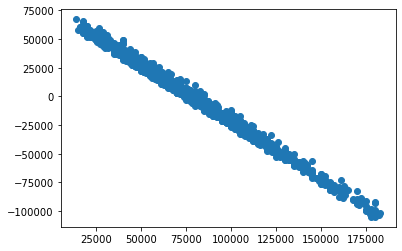

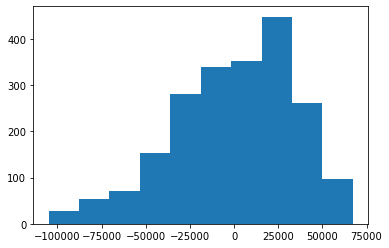

In [117]:
'''
plot errors
'''

plt.scatter(testData['Y_test'], testData['Errors'])
plt.show()

plt.hist(testData['Errors'])
plt.show()

# Section: Data1 - Decision Tree

In [118]:
'''
Importing libraries
'''
from sklearn import metrics 
from sklearn import tree


In [119]:
'''
split dataset in features and target variable
'''
feature_cols = df.columns
feature_cols = np.delete(feature_cols, 0)
target_col = df.columns[0]

X = df[feature_cols] # Features

Y = df[target_col] # Target variable

In [120]:
'''
Split dataset into training set and test set
'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [121]:
'''
creating decision trees with multiple depths
'''
depth_range=10

depth = np.zeros(depth_range)
train_error_mse = np.zeros(depth_range)
test_error_mse = np.zeros(depth_range)

train_error_r2 = np.zeros(depth_range)
test_error_r2 = np.zeros(depth_range)

for i in range(0,depth_range):
    model = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=i+5)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    depth[i]=i+5
    # MSE for training and test sets of increasing size
    train_error_mse[i] = metrics.mean_squared_error(Y_train, model.predict(X_train))
    test_error_mse[i] = metrics.mean_squared_error(Y_test, model.predict(X_test))
    # Rsquare for training and test sets of increasing size
    train_error_r2[i] = metrics.r2_score(Y_train, model.predict(X_train))
    test_error_r2[i] = metrics.r2_score(Y_test, model.predict(X_test))

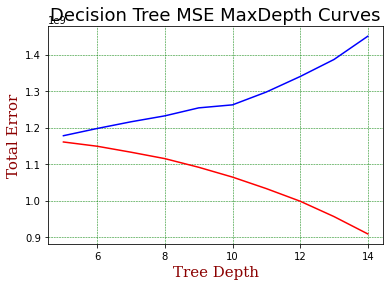

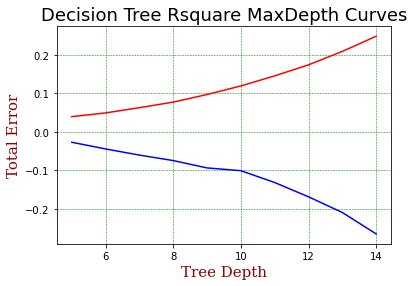

In [122]:
'''
Plot learning curves
'''

font = {'family':'serif','color':'darkred','size':15}

plt.title('Decision Tree MSE MaxDepth Curves', fontsize=18)
plt.plot(depth, train_error_mse, '-', label = 'Training Error',color = "red")
plt.plot(depth, test_error_mse, '-', label = 'Testing Error',color = "blue")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Tree Depth", fontdict = font)
plt.ylabel("Total Error", fontdict = font)
plt.show()

plt.title('Decision Tree Rsquare MaxDepth Curves', fontsize=18)
plt.plot(depth, train_error_r2, '-', label = 'Training Error',color = "red")
plt.plot(depth, test_error_r2, '-', label = 'Testing Error',color = "blue")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Tree Depth", fontdict = font)
plt.ylabel("Total Error", fontdict = font)
plt.show()


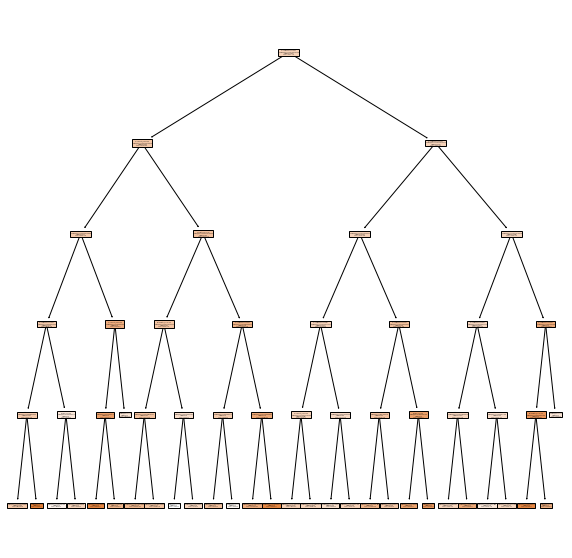

In [123]:
'''
Create Sample Decision Tree To Save
'''
model = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=5)
model.fit(X_train,Y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True, feature_names=X_train.columns)
plt.savefig('tree_visualization.png') 

# Section: Data1 - Clustering

In [124]:
'''
importing libraries
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [125]:
data1

,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff,PolicyStartAgeBin,CapitalBin,PolicyQuarter,BirthQuarter,PBQuarter,BirthHalf
32,33,30000.0,F,1976-09-01,2000-03-15,32.533881,23.535049,9,3,6,"(23.0, 24.0]",25k-50k,1,3,3,2
97,98,55000.0,M,1982-01-31,2000-04-02,27.167693,18.168751,1,4,3,"(18.0, 19.0]",50k-75k,2,1,2,1
168,169,35000.0,F,1981-09-28,2000-04-23,27.567420,18.568485,9,4,7,"(18.0, 19.0]",25k-50k,2,3,3,2
184,185,34000.0,M,1978-07-09,2000-04-24,30.792608,21.793740,7,4,9,"(21.0, 22.0]",25k-50k,2,3,4,2
210,211,80000.0,F,1977-02-24,2000-05-01,32.180698,23.181859,2,5,3,"(23.0, 24.0]",75k-100k,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76029,76030,106000.0,F,1990-04-09,2006-06-24,19.208761,16.208409,4,6,2,"(16.0, 17.0]",100k-125k,2,2,1,1
76030,76031,102000.0,M,1988-11-25,2008-01-09,20.123203,19.121543,11,1,2,"(19.0, 20.0]",100k-125k,1,4,1,2
76048,76049,40200.0,M,1987-12-09,2008-06-17,21.522245,20.523351,12,6,6,"(20.0, 21.0]",25k-50k,2,4,3,2
76071,76072,72900.0,F,1986-08-27,2006-10-05,23.107461,20.107189,8,10,2,"(20.0, 21.0]",50k-75k,4,3,1,2


In [126]:
'''
Extracting features for clustering
'''
data1
kmdata=data1[['PolicyMonth', 'PBMonthDiff']]
kmdata.describe()

,PolicyMonth,PBMonthDiff
count,7139.000000,7139.000000
mean,6.396834,5.482280
std,3.517653,3.402455
min,1.000000,0.000000
25%,3.000000,3.000000
50%,6.000000,6.000000
75%,10.000000,8.000000
max,12.000000,11.000000


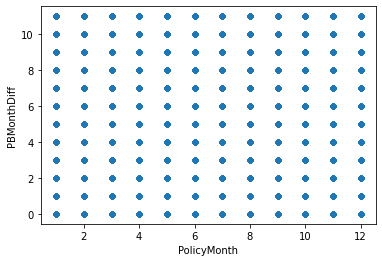

In [127]:
'''
Plotting kmdata, note that the variables are categorical, hence the data points in the graph does not express much
'''

kmdata.plot(
   x='PolicyMonth', 
   y='PBMonthDiff', 
   kind='scatter'
)

plt.show()

In [128]:
'''
forming clusters of different values of K and saving  their silhouette score to find optimal k
'''

sscore=[]

for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmdata)
    score=silhouette_score(kmdata, kmeans.labels_, metric='euclidean')
    sscore.append(score)
    print(f"Silhoute Scores: {sscore}")

Silhoute Scores: [0.36472452868373967]
Silhoute Scores: [0.36472452868373967, 0.3874865579974829]
Silhoute Scores: [0.36472452868373967, 0.3874865579974829, 0.4110892357082314]
Silhoute Scores: [0.36472452868373967, 0.3874865579974829, 0.4110892357082314, 0.393925667114336]


Text(0.5, 1.0, 'SilhoutteScore vs K Value')

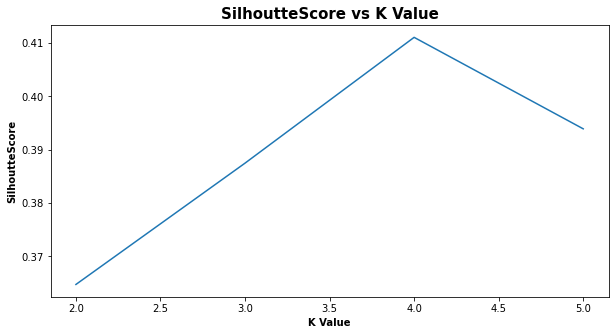

In [129]:
'''
Plotting Silhoute Score
'''
plt.figure(figsize=(10, 5))
plt.plot(range(2,6), sscore)
plt.xlabel("K Value", fontsize=10, fontweight='bold')
plt.ylabel("SilhoutteScore", fontsize=10, fontweight='bold')
plt.title("SilhoutteScore vs K Value", fontsize=15, fontweight='bold')

In [130]:
'''
finding predicting cluster for each data point for k=4 clustering  
'''
kmeans= KMeans(n_clusters=4)
y_kmeans=kmeans.fit_predict(kmdata)
print(y_kmeans)
y_kmeans.shape

kmdata["y_kmeans"]=y_kmeans
kmdata.shape
kmdata

[0 3 0 ... 0 1 2]


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1614751652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmdata["y_kmeans"]=y_kmeans


,PolicyMonth,PBMonthDiff,y_kmeans
32,3,6,0
97,4,3,3
168,4,7,0
184,4,9,0
210,5,3,3
...,...,...,...
76029,6,2,3
76030,1,2,3
76048,6,6,0
76071,10,2,1


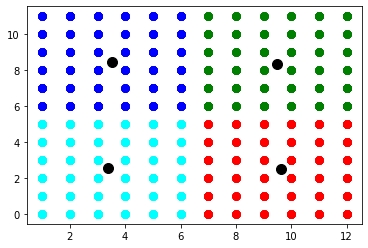

In [131]:
'''
plotting colour coded data points and 4 centroids of the clusters
'''
plt.scatter(kmdata.iloc[y_kmeans==0,0], kmdata.iloc[y_kmeans==0,1], s=50, color='blue',label="Cluster1")
plt.scatter(kmdata.iloc[y_kmeans==1,0], kmdata.iloc[y_kmeans==1,1], s=50, color='red',label="Cluster2")
plt.scatter(kmdata.iloc[y_kmeans==2,0], kmdata.iloc[y_kmeans==2,1], s=50, color='green',label="Cluster3")
plt.scatter(kmdata.iloc[y_kmeans==3,0], kmdata.iloc[y_kmeans==3,1], s=50, color='cyan',label="Cluster4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,color='Black',label="Centroid")

In [132]:
#The scatter plot visualization is hot helpful but the position of centroids suggests that the data is almost equally distributed 

# Section: Data1 - Polynomial Regression

In [133]:
'''
importing library
'''
from sklearn.preprocessing import PolynomialFeatures

In [134]:
'''
split dataset in features and target variable
'''

feature_cols = df.columns
feature_cols = np.delete(feature_cols, 0)
target_col = df.columns[0]
X = df[feature_cols] # Features
Y = df[target_col] # Target variable

In [135]:
'''
transforming initial features with polynomial degree 2 to contain interaction variables 
as these were not present in earlier linear regression 
'''
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, Y)
X_poly=X_poly[:,1:]
print(X_poly)
X_poly.shape

[[ 0.         23.53504863  1.         ...  0.          0.
   0.        ]
 [ 1.         18.1687509   0.         ...  0.          0.
   0.        ]
 [ 0.         18.56848532  0.         ...  0.          0.
   0.        ]
 ...
 [ 1.         20.52335092  0.         ...  0.          0.
   0.        ]
 [ 0.         20.10718906  0.         ...  0.          0.
   1.        ]
 [ 0.         18.53015462  0.         ...  0.          0.
   0.        ]]


(6935, 77)

In [136]:
'''
split data into train and test
'''
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=42) 

In [137]:
'''
running linear regression
'''
model = LinearRegression()
model.fit(X_train, Y_train) 
Ypoly_hat= model.predict(X_train)
print (Ypoly_hat)

[80726.40525664 77142.90461851 74032.33064993 ... 83914.99764871
 78853.56650486 73694.24696772]


In [138]:
'''
calculating R-square of the training set
'''
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.01385527567313738
intercept: 102851.35409764055
slope: [ 8.96248319e+01 -1.80726574e+03  2.28251537e+03  6.40652923e+02
  3.54488683e+03 -4.16786763e+03 -2.82868165e+03  1.80451268e+03
  2.55752978e+03  5.89124372e+03  9.94401835e+03  8.96248319e+01
  1.82800856e+02 -3.84343497e+03 -2.92800423e+03 -4.90570284e+03
 -2.11638395e+02 -1.38140531e+03 -2.52498251e+03  2.77068064e+03
 -1.40368269e+03 -8.32699837e+02  2.98598263e+01 -1.53615294e+02
 -1.68037236e+02 -4.95531642e+02  3.03450921e+02  3.00675854e+02
 -1.98548377e+02 -3.70207378e+02 -6.39999069e+02 -1.02057127e+03
  2.28251537e+03  2.27373675e-12  4.54747351e-12 -9.65322855e+01
  1.55179748e+03 -2.08602577e+03  4.34337537e+02  7.64477706e+02
  1.86059945e+03  6.40652923e+02 -2.50111043e-12  2.12251766e+02
 -8.27489822e+02 -1.82929009e+03  6.80662469e+03  7.35670737e+03
  3.29737660e+03  3.54488683e+03  5.92374459e+03  1.94583252e+01
  3.26787126e+03  5.10596103e+01  2.16674005e+03 -7.34487721e+02
 -4

In [139]:
'''
calculating adjusted R-square of training set
'''
n,c = X_train.shape
p=c
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 4854
Number of features p are  77
R-square 0.01385527567313738 Adj_R-sqaure -0.002043623776855963


In [140]:
'''
calculating R-square of the testing set
'''
r_sq = model.score(X_test, Y_test)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: -0.002922592185284012
intercept: 102851.35409764055
slope: [ 8.96248319e+01 -1.80726574e+03  2.28251537e+03  6.40652923e+02
  3.54488683e+03 -4.16786763e+03 -2.82868165e+03  1.80451268e+03
  2.55752978e+03  5.89124372e+03  9.94401835e+03  8.96248319e+01
  1.82800856e+02 -3.84343497e+03 -2.92800423e+03 -4.90570284e+03
 -2.11638395e+02 -1.38140531e+03 -2.52498251e+03  2.77068064e+03
 -1.40368269e+03 -8.32699837e+02  2.98598263e+01 -1.53615294e+02
 -1.68037236e+02 -4.95531642e+02  3.03450921e+02  3.00675854e+02
 -1.98548377e+02 -3.70207378e+02 -6.39999069e+02 -1.02057127e+03
  2.28251537e+03  2.27373675e-12  4.54747351e-12 -9.65322855e+01
  1.55179748e+03 -2.08602577e+03  4.34337537e+02  7.64477706e+02
  1.86059945e+03  6.40652923e+02 -2.50111043e-12  2.12251766e+02
 -8.27489822e+02 -1.82929009e+03  6.80662469e+03  7.35670737e+03
  3.29737660e+03  3.54488683e+03  5.92374459e+03  1.94583252e+01
  3.26787126e+03  5.10596103e+01  2.16674005e+03 -7.34487721e+02
 

In [141]:
'''
calculating adjusted R-square of testing set
'''
n,c = X_test.shape
p=c
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq) #can adj_rsq be negative

Number of data points n are 2081
Number of features p are  77
R-square -0.002922592185284012 Adj_R-sqaure -0.04147727995276629


# Section: Data1 - Neural Network

In [142]:
'''
importing libraries
'''

import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
import torch.optim as optim


In [143]:
'''
partitioning data to features and target variable
'''
array = df.values
x = array[:,1:] 
y = array[:,0]

In [144]:
'''
scaling data
'''
x = StandardScaler().fit_transform(x)

In [145]:
'''
split data into train and test
'''
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [146]:
'''
Converting data to PyTorch tensors and reshaping target variable to be fed to MLP
'''
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1)

In [147]:
'''
checking shape of train and test data 
'''
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([4854, 11]),
 torch.Size([2081, 11]),
 torch.Size([4854, 1]),
 torch.Size([2081, 1]))

In [148]:
'''
passing the data to dataloader for it to be fed to NN in Pytorch
'''

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.X=X_train
        self.Y=Y_train
        self.len=self.X.shape[0]
    def __getitem__(self,index):      
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len
    
nndata=Data()
trainloader=DataLoader(dataset=nndata,batch_size=64)    

In [149]:
datasize, features= X_train.shape
print("datasize:",datasize,", ","features:", features)

datasize: 4854 ,  features: 11


In [150]:
'''
defining MLP class as our NN model with input layer , 3 hidden layers, and output layer
'''
class MLP(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(features, 32),
      nn.ReLU(),
      nn.Linear(32, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 1)
    )

  def forward(self, X):
    return self.layers(X)

model=MLP()
print(model.parameters)

<bound method Module.parameters of MLP(
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)>


In [151]:
'''
selecting loss function and optimizer
'''
loss_function = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [152]:
'''
assigning number of epochs, low to save running time on demo
'''
n_epochs = 4   

In [153]:
'''
running epochs and saving loss for every mini-batch of training data and loss for testing data after each epoch 
'''

loss_list = []
epoch_model_eval = []
# Run the training loop
for epoch in range(0, n_epochs): # 3 epochs at maximum
    
   print(f'Starting epoch {epoch+1}')
   current_loss = 0.0
   for i, loopdata in enumerate(trainloader, 0):
         optimizer.zero_grad()
         Outputs_nn = model(X_train)
         loss = loss_function(Outputs_nn, Y_train)
         loss_list.append(loss.item()) 
         loss.backward()
         optimizer.step()
         current_loss += loss.item()
         if i % 10 == 0:
                print('Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
         current_loss = 0.0
   # evaluate model at end of epoch
   Y_pred = model(X_test)
   model_eval_loss = loss_function(Y_pred, Y_test)
   epoch_model_eval.append(model_eval_loss.item())
   print(f"End of epoch {epoch+1}, model eval loss is {epoch_model_eval[epoch]}")

Starting epoch 1
Loss after mini-batch     1: 14564385.792
Loss after mini-batch    11: 14561543.168
Loss after mini-batch    21: 14509329.408
Loss after mini-batch    31: 14105790.464
Loss after mini-batch    41: 12190727.168
Loss after mini-batch    51: 6631065.600
Loss after mini-batch    61: 3434850.816
Loss after mini-batch    71: 2547380.480
End of epoch 1, model eval loss is 1269093888.0
Starting epoch 2
Loss after mini-batch     1: 2671166.464
Loss after mini-batch    11: 2467058.176
Loss after mini-batch    21: 2433931.264
Loss after mini-batch    31: 2413084.928
Loss after mini-batch    41: 2397516.800
Loss after mini-batch    51: 2389680.128
Loss after mini-batch    61: 2384909.824
Loss after mini-batch    71: 2380796.672
End of epoch 2, model eval loss is 1157379072.0
Starting epoch 3
Loss after mini-batch     1: 2378557.440
Loss after mini-batch    11: 2375583.488
Loss after mini-batch    21: 2373154.304
Loss after mini-batch    31: 2371149.568
Loss after mini-batch    41:

Text(0.5, 1.0, 'TrainingLossCurve')

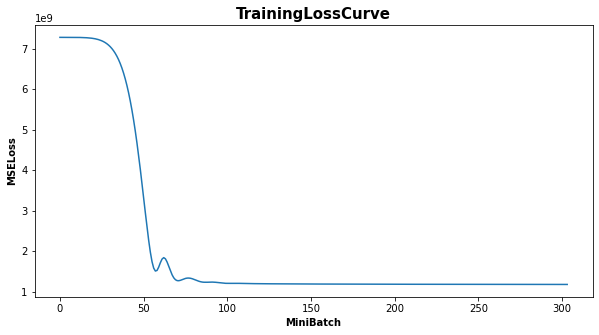

In [154]:
'''
plotting training Loss Curve  
'''
xmax= len(loss_list)
plt.figure(figsize=(10, 5))
plt.plot(range(0,xmax), loss_list)
plt.xlabel("MiniBatch", fontsize=10, fontweight='bold')
plt.ylabel("MSELoss", fontsize=10, fontweight='bold')
plt.title("TrainingLossCurve", fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'TestLossCurve')

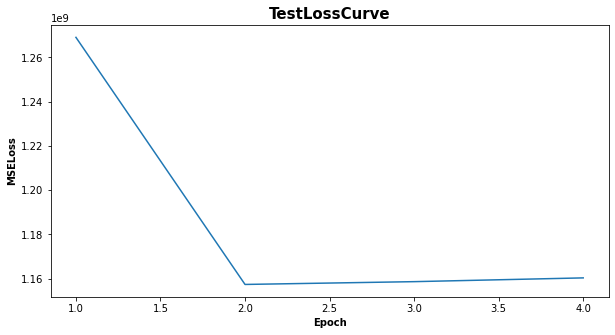

In [155]:

'''
plotting test loss curve  
'''
xmax= len(epoch_model_eval)
plt.figure(figsize=(10, 5))
plt.plot(range(1,xmax+1), epoch_model_eval)
plt.xlabel("Epoch", fontsize=10, fontweight='bold')
plt.ylabel("MSELoss", fontsize=10, fontweight='bold')
plt.title("TestLossCurve", fontsize=15, fontweight='bold')

# Section: Data2 - Linear Regression 

In [156]:
'''
Now we code for Linear Regression on data2
'''

'\nNow we code for Linear Regression on data2\n'

In [157]:
'''
Importing libraries
'''

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [158]:
data2.head(10)

,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff,PolicyStartAgeBin,CapitalBin,PolicyQuarter,BirthQuarter,PBQuarter,BirthHalf
0,1,55000.0,M,1960-07-10,2000-03-08,48.659822,39.661321,7,3,8,"(39.0, 40.0]",50k-75k,1,3,3,2
1,2,105000.0,M,1961-08-18,2000-03-07,47.550992,38.552469,8,3,7,"(38.0, 39.0]",100k-125k,1,3,3,2
2,3,79500.0,M,1963-10-14,2000-03-15,45.418207,36.419639,10,3,5,"(36.0, 37.0]",75k-100k,1,4,2,2
3,4,74500.0,F,1966-06-26,2000-03-15,42.718686,33.720063,6,3,9,"(33.0, 34.0]",50k-75k,1,2,4,1
6,7,85000.0,F,1962-04-03,2000-03-07,46.926762,37.928226,4,3,11,"(37.0, 38.0]",75k-100k,1,2,4,1
7,8,16000.0,M,1969-03-28,2000-03-11,39.953457,30.954777,3,3,0,"(30.0, 31.0]",<=25,1,1,1,1
8,9,55000.0,F,1962-01-26,2000-03-21,47.148528,38.149996,1,3,2,"(38.0, 39.0]",50k-75k,1,1,1,1
9,10,117000.0,M,1969-02-13,2000-03-31,40.125941,31.127265,2,3,1,"(31.0, 32.0]",100k-125k,1,1,1,1
11,12,129000.0,F,1965-10-18,2000-03-08,43.386721,34.388112,10,3,5,"(34.0, 35.0]",125k-150k,1,4,2,2
13,14,14000.0,M,1973-03-15,2000-03-08,35.980835,26.982074,3,3,0,"(26.0, 27.0]",<=25,1,1,1,1


In [159]:
'''
creating a subset of features we are interested in
'''
subset_feature = ['Capital', 'Gender', 'PolicyStartAge', 'PolicyQuarter', 'BirthQuarter','PBQuarter']
df=data2[subset_feature]

In [160]:
print (df.describe(include='all'))

             Capital Gender  PolicyStartAge  PolicyQuarter  BirthQuarter  \
count   2.437600e+04  24376    24376.000000   24376.000000  24376.000000   
unique           NaN      2             NaN            NaN           NaN   
top              NaN      M             NaN            NaN           NaN   
freq             NaN  14284             NaN            NaN           NaN   
mean    9.597387e+04    NaN       34.401617       2.546193      2.540696   
std     5.925548e+04    NaN        4.169746       1.161890      1.109763   
min     8.000000e+03    NaN       24.000493       1.000000      1.000000   
25%     5.918750e+04    NaN       31.756983       1.000000      2.000000   
50%     8.500000e+04    NaN       35.319000       3.000000      3.000000   
75%     1.195165e+05    NaN       37.832399       4.000000      4.000000   
max     1.251000e+06    NaN       39.998083       4.000000      4.000000   

           PBQuarter  
count   24376.000000  
unique           NaN  
top              N

In [161]:
#plotting correlation matrix
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,PolicyStartAge,PolicyQuarter,BirthQuarter,PBQuarter
Capital,1.000000,0.066025,-0.015959,0.002145,-0.006052
PolicyStartAge,0.066025,1.000000,-0.010011,-0.018955,0.064583
PolicyQuarter,-0.015959,-0.010011,1.000000,-0.004449,-0.007070
BirthQuarter,0.002145,-0.018955,-0.004449,1.000000,-0.055547
PBQuarter,-0.006052,0.064583,-0.007070,-0.055547,1.000000


In [162]:
'''
encoding category features to dummy variables
'''

import category_encoders as ce
encoder=ce.OneHotEncoder(cols='Gender',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='PolicyQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='BirthQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='PBQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
print(df)

        Capital  Gender_M  Gender_F  PolicyStartAge  PolicyQuarter_1.0  \
0       55000.0       1.0       0.0       39.661321                1.0   
1      105000.0       1.0       0.0       38.552469                1.0   
2       79500.0       1.0       0.0       36.419639                1.0   
3       74500.0       0.0       1.0       33.720063                1.0   
6       85000.0       0.0       1.0       37.928226                1.0   
...         ...       ...       ...             ...                ...   
76089   67800.0       0.0       1.0       36.438804                0.0   
76091  118000.0       1.0       0.0       35.458634                1.0   
76092   85000.0       0.0       1.0       25.268144                1.0   
76098   45000.0       0.0       1.0       39.984394                0.0   
76100   82000.0       0.0       1.0       35.910388                0.0   

       PolicyQuarter_2.0  PolicyQuarter_3.0  PolicyQuarter_4.0  \
0                    0.0                0.0  

In [163]:
rowcount,columncount=df.shape

In [164]:
X = df.iloc[:,1:columncount]
Y = df.iloc[:,0]

In [165]:
'''
finding features importance using random forest
'''
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=340)
model.fit(X,Y)
importances =model.feature_importances_
final_df=pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importances":importances})
final_df.set_index('Importances')

,Features
Importances,
0.003887,Gender_M
0.003780,Gender_F
0.802908,PolicyStartAge
0.022740,PolicyQuarter_1.0
0.025952,PolicyQuarter_2.0
0.017281,PolicyQuarter_3.0
0.019082,PolicyQuarter_4.0
0.021021,BirthQuarter_3.0
0.024413,BirthQuarter_4.0


In [166]:
final_df

,Features,Importances
0,Gender_M,0.003887
1,Gender_F,0.003780
2,PolicyStartAge,0.802908
3,PolicyQuarter_1.0,0.022740
4,PolicyQuarter_2.0,0.025952
5,PolicyQuarter_3.0,0.017281
6,PolicyQuarter_4.0,0.019082
7,BirthQuarter_3.0,0.021021
8,BirthQuarter_4.0,0.024413
9,BirthQuarter_2.0,0.018327


In [167]:
final_df.sort_values(by=['Importances'], ascending=False)

,Features,Importances
2,PolicyStartAge,0.802908
4,PolicyQuarter_2.0,0.025952
8,BirthQuarter_4.0,0.024413
3,PolicyQuarter_1.0,0.022740
7,BirthQuarter_3.0,0.021021
6,PolicyQuarter_4.0,0.019082
10,BirthQuarter_1.0,0.018533
9,BirthQuarter_2.0,0.018327
5,PolicyQuarter_3.0,0.017281
14,PBQuarter_1.0,0.006108


<AxesSubplot:>

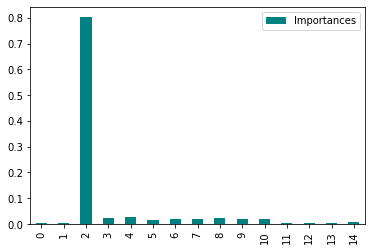

In [168]:
#plot the feature importances in bars
final_df.plot.bar(color='teal')

In [169]:
'''
plot again correlation matrix
'''
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,Gender_M,Gender_F,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_3.0,PolicyQuarter_4.0,BirthQuarter_3.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_3.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
Capital,1.000000,0.045710,-0.045710,0.066025,0.011927,0.005257,-0.003835,-0.012917,0.005813,0.001333,-0.010277,0.003142,-0.015861,0.006348,0.003076,0.006248
Gender_M,0.045710,1.000000,-1.000000,0.016246,0.005721,0.000450,0.001170,-0.006881,-0.001824,-0.001179,0.005659,-0.002693,-0.003889,0.012579,-0.001774,-0.007010
Gender_F,-0.045710,-1.000000,1.000000,-0.016246,-0.005721,-0.000450,-0.001170,0.006881,0.001824,0.001179,-0.005659,0.002693,0.003889,-0.012579,0.001774,0.007010
PolicyStartAge,0.066025,0.016246,-0.016246,1.000000,0.006633,0.001898,0.003362,-0.011033,-0.001372,-0.018494,0.010258,0.010042,0.018785,-0.030866,0.053120,-0.041577
PolicyQuarter_1.0,0.011927,0.005721,-0.005721,0.006633,1.000000,-0.333246,-0.291940,-0.379153,-0.008790,0.010790,-0.001535,-0.000503,0.001643,0.024809,-0.016122,-0.010253
PolicyQuarter_2.0,0.005257,0.000450,-0.000450,0.001898,-0.333246,1.000000,-0.288069,-0.374125,0.002766,-0.012271,0.008454,0.001173,0.009767,-0.016876,0.012761,-0.005677
PolicyQuarter_3.0,-0.003835,0.001170,-0.001170,0.003362,-0.291940,-0.288069,1.000000,-0.327753,0.010597,0.008809,-0.008878,-0.010974,-0.015398,-0.015184,0.025650,0.004542
PolicyQuarter_4.0,-0.012917,-0.006881,0.006881,-0.011033,-0.379153,-0.374125,-0.327753,1.000000,-0.003553,-0.006394,0.001267,0.008991,0.002727,0.005672,-0.019212,0.011104
BirthQuarter_3.0,0.005813,-0.001824,0.001824,-0.001372,-0.008790,0.002766,0.010597,-0.003553,1.000000,-0.347596,-0.340823,-0.325075,0.002775,0.057026,-0.007212,-0.052916
BirthQuarter_4.0,0.001333,-0.001179,0.001179,-0.018494,0.010790,-0.012271,0.008809,-0.006394,-0.347596,1.000000,-0.341298,-0.325528,-0.015197,0.013765,-0.054146,0.056291


In [170]:
'''
drop one of the categorical variables for each dummy variable to make those uncorrelated
'''
df=df.drop(['Gender_F', 'PolicyQuarter_3.0', 'BirthQuarter_3.0','PBQuarter_3.0'], axis=1)
df

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
0,55000.0,1.0,39.661321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,105000.0,1.0,38.552469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79500.0,1.0,36.419639,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,74500.0,0.0,33.720063,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,85000.0,0.0,37.928226,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76089,67800.0,0.0,36.438804,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76091,118000.0,1.0,35.458634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76092,85000.0,0.0,25.268144,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
76098,45000.0,0.0,39.984394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [171]:
'''
plot again the correlation matrix
'''
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
Capital,1.000000,0.045710,0.066025,0.011927,0.005257,-0.012917,0.001333,-0.010277,0.003142,0.006348,0.003076,0.006248
Gender_M,0.045710,1.000000,0.016246,0.005721,0.000450,-0.006881,-0.001179,0.005659,-0.002693,0.012579,-0.001774,-0.007010
PolicyStartAge,0.066025,0.016246,1.000000,0.006633,0.001898,-0.011033,-0.018494,0.010258,0.010042,-0.030866,0.053120,-0.041577
PolicyQuarter_1.0,0.011927,0.005721,0.006633,1.000000,-0.333246,-0.379153,0.010790,-0.001535,-0.000503,0.024809,-0.016122,-0.010253
PolicyQuarter_2.0,0.005257,0.000450,0.001898,-0.333246,1.000000,-0.374125,-0.012271,0.008454,0.001173,-0.016876,0.012761,-0.005677
PolicyQuarter_4.0,-0.012917,-0.006881,-0.011033,-0.379153,-0.374125,1.000000,-0.006394,0.001267,0.008991,0.005672,-0.019212,0.011104
BirthQuarter_4.0,0.001333,-0.001179,-0.018494,0.010790,-0.012271,-0.006394,1.000000,-0.341298,-0.325528,0.013765,-0.054146,0.056291
BirthQuarter_2.0,-0.010277,0.005659,0.010258,-0.001535,0.008454,0.001267,-0.341298,1.000000,-0.319185,-0.058244,0.009309,-0.014154
BirthQuarter_1.0,0.003142,-0.002693,0.010042,-0.000503,0.001173,0.008991,-0.325528,-0.319185,1.000000,-0.013521,0.053940,0.010975
PBQuarter_2.0,0.006348,0.012579,-0.030866,0.024809,-0.016876,0.005672,0.013765,-0.058244,-0.013521,1.000000,-0.343449,-0.332109


In [172]:
'''
finding interquartile range of Capital, our target variable
'''

Q1Capital = df['Capital'].quantile(0.25)
Q3Capital = df['Capital'].quantile(0.75)
Q2Capital = df['Capital'].quantile(0.50)

print(Q1Capital)
print(Q2Capital)
print(Q3Capital)

IQRCapital = Q3Capital - Q1Capital


59187.5
85000.0
119516.5


In [173]:
'''
Removing outliers in Target Variable
'''

df = df[(df['Capital'] > (Q1Capital - 1.5 * IQRCapital)) & (df['Capital'] < (Q3Capital + 1.5 * IQRCapital))]
df

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
0,55000.0,1.0,39.661321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,105000.0,1.0,38.552469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79500.0,1.0,36.419639,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,74500.0,0.0,33.720063,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,85000.0,0.0,37.928226,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76089,67800.0,0.0,36.438804,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76091,118000.0,1.0,35.458634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76092,85000.0,0.0,25.268144,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
76098,45000.0,0.0,39.984394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [174]:
'''
Split data into train and test
'''
array = df.values
x = array[:,1:] 
y = array[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [175]:
'''
run regression
'''
model = LinearRegression()
model.fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(df.columns)

coefficient of determination: 0.00592362532698798
intercept: 64024.411324114175
slope: [ 2.99093494e+03  6.76301012e+02 -6.77732317e+02 -1.29459121e+03
 -6.42006371e+02  5.14002633e+02  9.46391517e+00  2.73134318e+00
  1.33746484e+03  1.44245631e+03  8.96716845e+02]
Index(['Capital', 'Gender_M', 'PolicyStartAge', 'PolicyQuarter_1.0',
       'PolicyQuarter_2.0', 'PolicyQuarter_4.0', 'BirthQuarter_4.0',
       'BirthQuarter_2.0', 'BirthQuarter_1.0', 'PBQuarter_2.0',
       'PBQuarter_4.0', 'PBQuarter_1.0'],
      dtype='object')


In [176]:
'''
calculate p-values
'''

from scipy import stats

params = np.append(model.intercept_,model.coef_)
predictions = model.predict(X_train)
new_X_train = np.append(np.ones((len(X_train),1)), X_train, axis=1)
M_S_E = (sum((Y_train-predictions)**2))/(len(new_X_train)-len(new_X_train[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X_train.T,new_X_train)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X_train)-len(new_X_train[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

array([0.   , 0.   , 0.   , 0.49 , 0.191, 0.498, 0.578, 0.992, 0.998,
       0.156, 0.124, 0.345])

In [177]:
'''
calculating adjusted R-square
'''
n,c = df.shape
p=c-1
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 23629
Number of features p are  11
R-square 0.00592362532698798 Adj_R-sqaure 0.005460618165985087


In [178]:
'''
make predictions on test data
'''
testdata_r_sq = model.score(X_test, Y_test)
print('coefficient of determination for test data:', testdata_r_sq)

testData =pd.DataFrame(Y_test)
testData.columns = ['Y_test']

testData['Y_pred'] = model.predict(X_test)
testData['Errors'] = testData['Y_pred'] - testData['Y_test']

testData

coefficient of determination for test data: 0.004676440090239042


,Y_test,Y_pred,Errors
0,61000.0,88733.853839,27733.853839
1,97000.0,93029.891257,-3970.108743
2,67500.0,92405.597091,24905.597091
3,90000.0,89369.044948,-630.955052
4,25500.0,89864.455682,64364.455682
...,...,...,...
7084,85000.0,91154.167872,6154.167872
7085,65000.0,88025.576139,23025.576139
7086,85000.0,87223.038896,2223.038896
7087,65000.0,89728.397927,24728.397927


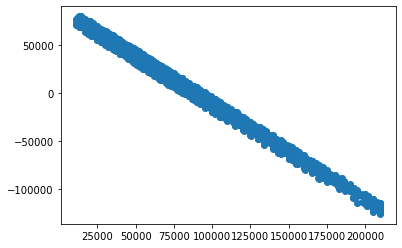

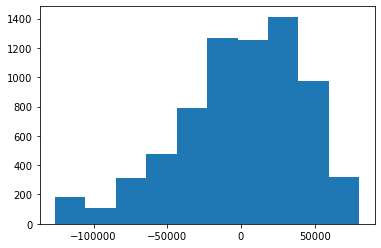

In [179]:
'''
plot errors
'''

plt.scatter(testData['Y_test'], testData['Errors'])
plt.show()

plt.hist(testData['Errors'])
plt.show()

# Section: Data2 - Decision Tree

In [180]:
'''
Importing libraries
'''
from sklearn import metrics 
from sklearn import tree


In [181]:
'''
split dataset in features and target variable
'''
feature_cols = df.columns
feature_cols = np.delete(feature_cols, 0)
target_col = df.columns[0]

X = df[feature_cols] # Features

Y = df[target_col] # Target variable

In [182]:
'''
Split dataset into training set and test set
'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [183]:
'''
creating decision trees with multiple depths
'''
depth_range=10

depth = np.zeros(depth_range)
train_error_mse = np.zeros(depth_range)
test_error_mse = np.zeros(depth_range)

train_error_r2 = np.zeros(depth_range)
test_error_r2 = np.zeros(depth_range)

for i in range(0,depth_range):
    model = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=i+5)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    depth[i]=i+5
    # MSE for training and test sets of increasing size
    train_error_mse[i] = metrics.mean_squared_error(Y_train, model.predict(X_train))
    test_error_mse[i] = metrics.mean_squared_error(Y_test, model.predict(X_test))
    # Rsquare for training and test sets of increasing size
    train_error_r2[i] = metrics.r2_score(Y_train, model.predict(X_train))
    test_error_r2[i] = metrics.r2_score(Y_test, model.predict(X_test))

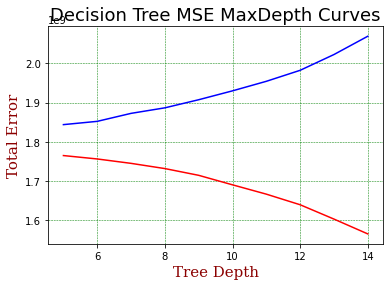

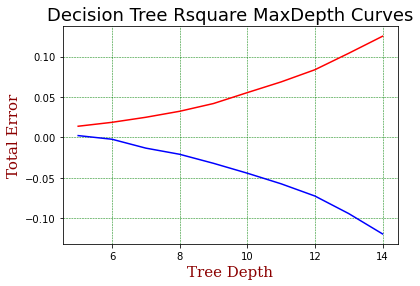

In [184]:
'''
Plot learning curves
'''

font = {'family':'serif','color':'darkred','size':15}

plt.title('Decision Tree MSE MaxDepth Curves', fontsize=18)
plt.plot(depth, train_error_mse, '-', label = 'Training Error',color = "red")
plt.plot(depth, test_error_mse, '-', label = 'Testing Error',color = "blue")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Tree Depth", fontdict = font)
plt.ylabel("Total Error", fontdict = font)
plt.show()

plt.title('Decision Tree Rsquare MaxDepth Curves', fontsize=18)
plt.plot(depth, train_error_r2, '-', label = 'Training Error',color = "red")
plt.plot(depth, test_error_r2, '-', label = 'Testing Error',color = "blue")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Tree Depth", fontdict = font)
plt.ylabel("Total Error", fontdict = font)
plt.show()


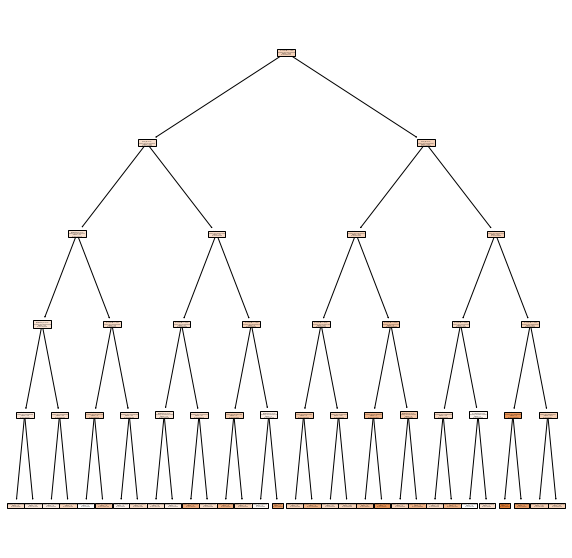

In [185]:
'''
Create Sample Decision Tree To Save
'''
model = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=5)
model.fit(X_train,Y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True, feature_names=X_train.columns)
plt.savefig('tree_visualization.png') 

# Section: Data2 - Clustering

In [186]:
'''
importing libraries
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [187]:
data2

,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff,PolicyStartAgeBin,CapitalBin,PolicyQuarter,BirthQuarter,PBQuarter,BirthHalf
0,1,55000.0,M,1960-07-10,2000-03-08,48.659822,39.661321,7,3,8,"(39.0, 40.0]",50k-75k,1,3,3,2
1,2,105000.0,M,1961-08-18,2000-03-07,47.550992,38.552469,8,3,7,"(38.0, 39.0]",100k-125k,1,3,3,2
2,3,79500.0,M,1963-10-14,2000-03-15,45.418207,36.419639,10,3,5,"(36.0, 37.0]",75k-100k,1,4,2,2
3,4,74500.0,F,1966-06-26,2000-03-15,42.718686,33.720063,6,3,9,"(33.0, 34.0]",50k-75k,1,2,4,1
6,7,85000.0,F,1962-04-03,2000-03-07,46.926762,37.928226,4,3,11,"(37.0, 38.0]",75k-100k,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76089,76090,67800.0,F,1967-02-27,2003-08-06,42.439425,36.438804,2,8,6,"(36.0, 37.0]",50k-75k,3,1,3,1
76091,76092,118000.0,M,1972-08-27,2008-02-11,36.459959,35.458634,8,2,6,"(35.0, 36.0]",100k-125k,1,3,3,2
76092,76093,85000.0,F,1981-10-11,2007-01-17,27.268994,25.268144,10,1,3,"(25.0, 26.0]",75k-100k,1,4,2,2
76098,76099,45000.0,F,1965-09-13,2005-09-07,43.983573,39.984394,9,9,0,"(39.0, 40.0]",25k-50k,3,3,1,2


In [188]:
'''
Extracting features for clustering
'''
data2
kmdata=data2[['PolicyMonth', 'PBMonthDiff']]
kmdata.describe()

,PolicyMonth,PBMonthDiff
count,24376.000000,24376.000000
mean,6.701428,5.549188
std,3.619780,3.474349
min,1.000000,0.000000
25%,3.000000,3.000000
50%,7.000000,6.000000
75%,10.000000,9.000000
max,12.000000,11.000000


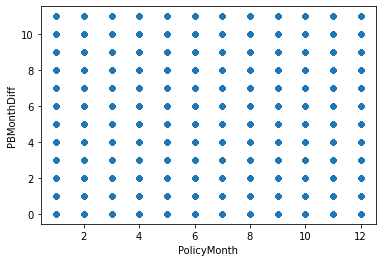

In [189]:
'''
Plotting kmdata, note that the variables are categorical, hence the data points in the graph does not express much
'''

kmdata.plot(
   x='PolicyMonth', 
   y='PBMonthDiff', 
   kind='scatter'
)

plt.show()

In [190]:
'''
forming clusters of different values of K and saving  their silhouette score to find optimal k
'''

sscore=[]

for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmdata)
    score=silhouette_score(kmdata, kmeans.labels_, metric='euclidean')
    sscore.append(score)
    print(f"Silhoute Scores: {sscore}")

Silhoute Scores: [0.3731600485382768]
Silhoute Scores: [0.3731600485382768, 0.3974955709491442]
Silhoute Scores: [0.3731600485382768, 0.3974955709491442, 0.4216993431752481]
Silhoute Scores: [0.3731600485382768, 0.3974955709491442, 0.4216993431752481, 0.4038806109505457]


Text(0.5, 1.0, 'SilhoutteScore vs K Value')

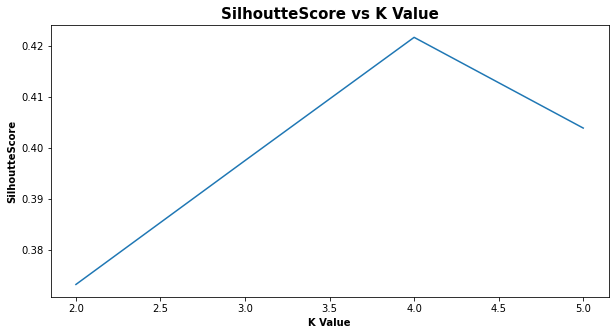

In [191]:
'''
Plotting Silhoute Score
'''
plt.figure(figsize=(10, 5))
plt.plot(range(2,6), sscore)
plt.xlabel("K Value", fontsize=10, fontweight='bold')
plt.ylabel("SilhoutteScore", fontsize=10, fontweight='bold')
plt.title("SilhoutteScore vs K Value", fontsize=15, fontweight='bold')

In [192]:
'''
finding predicting cluster for each data point for k=4 clustering  
'''
kmeans= KMeans(n_clusters=4)
y_kmeans=kmeans.fit_predict(kmdata)
print(y_kmeans)
y_kmeans.shape

kmdata["y_kmeans"]=y_kmeans
kmdata.shape
kmdata

[2 2 3 ... 3 1 0]


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1614751652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmdata["y_kmeans"]=y_kmeans


,PolicyMonth,PBMonthDiff,y_kmeans
0,3,8,2
1,3,7,2
2,3,5,3
3,3,9,2
6,3,11,2
...,...,...,...
76089,8,6,0
76091,2,6,2
76092,1,3,3
76098,9,0,1


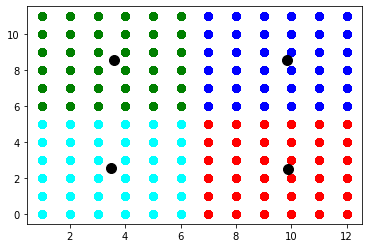

In [193]:
'''
plotting colour coded data points and 4 centroids of the clusters
'''
plt.scatter(kmdata.iloc[y_kmeans==0,0], kmdata.iloc[y_kmeans==0,1], s=50, color='blue',label="Cluster1")
plt.scatter(kmdata.iloc[y_kmeans==1,0], kmdata.iloc[y_kmeans==1,1], s=50, color='red',label="Cluster2")
plt.scatter(kmdata.iloc[y_kmeans==2,0], kmdata.iloc[y_kmeans==2,1], s=50, color='green',label="Cluster3")
plt.scatter(kmdata.iloc[y_kmeans==3,0], kmdata.iloc[y_kmeans==3,1], s=50, color='cyan',label="Cluster4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,color='Black',label="Centroid")

In [194]:
#The scatter plot visualization is hot helpful but the position of centroids suggests that the data is almost equally distributed 

# Section: Data2 - Polynomial Regression

In [195]:
'''
importing library
'''
from sklearn.preprocessing import PolynomialFeatures

In [196]:
'''
split dataset in features and target variable
'''

feature_cols = df.columns
feature_cols = np.delete(feature_cols, 0)
target_col = df.columns[0]
X = df[feature_cols] # Features
Y = df[target_col] # Target variable

In [197]:
'''
transforming initial features with polynomial degree 2 to contain interaction variables 
as these were not present in earlier linear regression 
'''
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, Y)
X_poly=X_poly[:,1:]
print(X_poly)
X_poly.shape

[[ 1.         39.6613209   1.         ...  0.          0.
   0.        ]
 [ 1.         38.55246857  1.         ...  0.          0.
   0.        ]
 [ 1.         36.41963901  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.         25.26814377  1.         ...  0.          0.
   0.        ]
 [ 0.         39.98439393  0.         ...  0.          0.
   1.        ]
 [ 0.         35.9103883   0.         ...  1.          0.
   0.        ]]


(23629, 77)

In [198]:
'''
split data into train and test
'''
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=42) 

In [199]:
'''
running linear regression
'''
model = LinearRegression()
model.fit(X_train, Y_train) 
Ypoly_hat= model.predict(X_train)
print (Ypoly_hat)

[92992.89137707 91912.22589863 88593.32723122 ... 89044.23711256
 90335.94560051 89611.46543048]


In [200]:
'''
calculating R-square of the training set
'''
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.010107288458611863
intercept: -36349.416455302155
slope: [ 3.28042439e+03  6.92217245e+03  4.86094966e+03  8.13706623e+03
 -4.57723678e+02 -3.07719897e+03  6.64047317e+02 -1.06932514e+03
 -4.05431689e+03 -5.59922370e+03 -5.58376457e+03  3.28042439e+03
 -6.55200075e+01 -3.51065079e+03 -3.06693842e+03 -1.92294735e+02
 -4.92737023e+01 -1.71382888e+03 -1.15559005e+02  1.66028380e+03
  1.50593287e+03  2.26757222e+02 -9.68684422e+01 -1.44428951e+02
 -3.75746152e+02 -5.85706836e+01  9.52036331e+01  4.55432527e+01
  3.87452357e+01  2.74958879e+02  3.83537512e+02  3.96172265e+02
  4.86094966e+03 -3.63797881e-12 -3.63797881e-12  1.13999480e+03
 -1.16576595e+03 -6.26821164e+02 -6.79845671e+03 -6.92587599e+03
 -4.84415600e+03  8.13706623e+03  0.00000000e+00  3.55834112e+03
  2.32004630e+02 -1.92601459e+03 -6.60776918e+03 -5.25699526e+03
 -4.45381097e+03 -4.57723678e+02  2.59824095e+03  6.55337801e+02
  5.49951346e+02  2.25834943e+03  3.98788435e+02  2.30804013e+03
 

In [201]:
'''
calculating adjusted R-square of training set
'''
n,c = X_train.shape
p=c
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 16540
Number of features p are  77
R-square 0.010107288458611863 Adj_R-sqaure 0.005477125733020394


In [202]:
'''
calculating R-square of the testing set
'''
r_sq = model.score(X_test, Y_test)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.004706182528052993
intercept: -36349.416455302155
slope: [ 3.28042439e+03  6.92217245e+03  4.86094966e+03  8.13706623e+03
 -4.57723678e+02 -3.07719897e+03  6.64047317e+02 -1.06932514e+03
 -4.05431689e+03 -5.59922370e+03 -5.58376457e+03  3.28042439e+03
 -6.55200075e+01 -3.51065079e+03 -3.06693842e+03 -1.92294735e+02
 -4.92737023e+01 -1.71382888e+03 -1.15559005e+02  1.66028380e+03
  1.50593287e+03  2.26757222e+02 -9.68684422e+01 -1.44428951e+02
 -3.75746152e+02 -5.85706836e+01  9.52036331e+01  4.55432527e+01
  3.87452357e+01  2.74958879e+02  3.83537512e+02  3.96172265e+02
  4.86094966e+03 -3.63797881e-12 -3.63797881e-12  1.13999480e+03
 -1.16576595e+03 -6.26821164e+02 -6.79845671e+03 -6.92587599e+03
 -4.84415600e+03  8.13706623e+03  0.00000000e+00  3.55834112e+03
  2.32004630e+02 -1.92601459e+03 -6.60776918e+03 -5.25699526e+03
 -4.45381097e+03 -4.57723678e+02  2.59824095e+03  6.55337801e+02
  5.49951346e+02  2.25834943e+03  3.98788435e+02  2.30804013e+03
 

In [203]:
'''
calculating adjusted R-square of testing set
'''
n,c = X_test.shape
p=c
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 7089
Number of features p are  77
R-square 0.004706182528052993 Adj_R-sqaure -0.0062248720925917045


# Section: Data2 - Neural Network

In [204]:
'''
importing libraries
'''

import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
import torch.optim as optim


In [205]:
'''
partitioning data to features and target variable
'''
array = df.values
x = array[:,1:] 
y = array[:,0]

In [206]:
'''
scaling data
'''
x = StandardScaler().fit_transform(x)

In [207]:
'''
split data into train and test
'''
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [208]:
'''
Converting data to PyTorch tensors and reshaping target variable to be fed to MLP
'''
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1)

In [209]:
'''
checking shape of train and test data 
'''
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([16540, 11]),
 torch.Size([7089, 11]),
 torch.Size([16540, 1]),
 torch.Size([7089, 1]))

In [210]:
'''
passing the data to dataloader for it to be fed to NN in Pytorch
'''

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.X=X_train
        self.Y=Y_train
        self.len=self.X.shape[0]
    def __getitem__(self,index):      
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len
    
nndata=Data()
trainloader=DataLoader(dataset=nndata,batch_size=64)    

In [211]:
datasize, features= X_train.shape
print("datasize:",datasize,", ","features:", features)

datasize: 16540 ,  features: 11


In [212]:
'''
defining MLP class as our NN model with input layer , 3 hidden layers, and output layer
'''
class MLP(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(features, 32),
      nn.ReLU(),
      nn.Linear(32, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 1)
    )

  def forward(self, X):
    return self.layers(X)

model=MLP()
print(model.parameters)

<bound method Module.parameters of MLP(
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)>


In [213]:
'''
selecting loss function and optimizer
'''
loss_function = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [214]:
'''
assigning number of epochs, low to save running time on demo
'''
n_epochs = 4   

In [215]:
'''
running epochs and saving loss for every mini-batch of training data and loss for testing data after each epoch 
'''

loss_list = []
epoch_model_eval = []
# Run the training loop
for epoch in range(0, n_epochs): # 3 epochs at maximum
    
   print(f'Starting epoch {epoch+1}')
   current_loss = 0.0
   for i, loopdata in enumerate(trainloader, 0):
         optimizer.zero_grad()
         Outputs_nn = model(X_train)
         loss = loss_function(Outputs_nn, Y_train)
         loss_list.append(loss.item()) 
         loss.backward()
         optimizer.step()
         current_loss += loss.item()
         if i % 10 == 0:
                print('Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
         current_loss = 0.0
   # evaluate model at end of epoch
   Y_pred = model(X_test)
   model_eval_loss = loss_function(Y_pred, Y_test)
   epoch_model_eval.append(model_eval_loss.item())
   print(f"End of epoch {epoch+1}, model eval loss is {epoch_model_eval[epoch]}")

Starting epoch 1
Loss after mini-batch     1: 19609747.456
Loss after mini-batch    11: 19602352.128
Loss after mini-batch    21: 19467845.632
Loss after mini-batch    31: 18441586.688
Loss after mini-batch    41: 13816051.712
Loss after mini-batch    51: 4487531.520
Loss after mini-batch    61: 4471869.440
Loss after mini-batch    71: 4077056.512
Loss after mini-batch    81: 3714600.960
Loss after mini-batch    91: 3693649.152
Loss after mini-batch   101: 3680214.016
Loss after mini-batch   111: 3656592.640
Loss after mini-batch   121: 3644172.032
Loss after mini-batch   131: 3637210.368
Loss after mini-batch   141: 3631845.888
Loss after mini-batch   151: 3627258.880
Loss after mini-batch   161: 3623521.280
Loss after mini-batch   171: 3620493.056
Loss after mini-batch   181: 3617967.616
Loss after mini-batch   191: 3615788.288
Loss after mini-batch   201: 3613846.528
Loss after mini-batch   211: 3612084.992
Loss after mini-batch   221: 3610533.376
Loss after mini-batch   231: 360918

Text(0.5, 1.0, 'TrainingLossCurve')

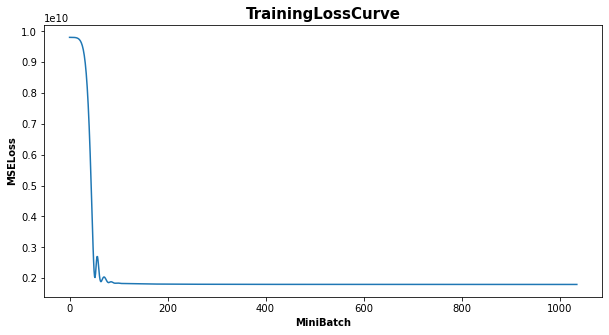

In [216]:
'''
plotting training Loss Curve  
'''
xmax= len(loss_list)
plt.figure(figsize=(10, 5))
plt.plot(range(0,xmax), loss_list)
plt.xlabel("MiniBatch", fontsize=10, fontweight='bold')
plt.ylabel("MSELoss", fontsize=10, fontweight='bold')
plt.title("TrainingLossCurve", fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'TestLossCurve')

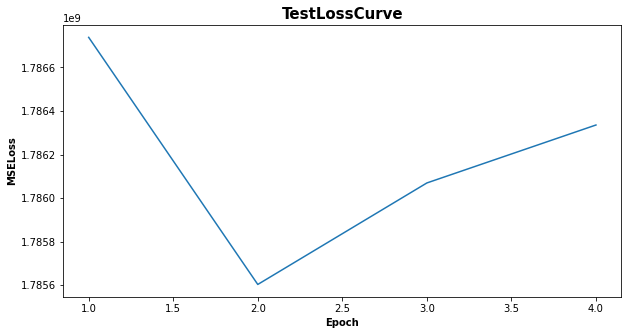

In [217]:

'''
plotting test loss curve  
'''
xmax= len(epoch_model_eval)
plt.figure(figsize=(10, 5))
plt.plot(range(1,xmax+1), epoch_model_eval)
plt.xlabel("Epoch", fontsize=10, fontweight='bold')
plt.ylabel("MSELoss", fontsize=10, fontweight='bold')
plt.title("TestLossCurve", fontsize=15, fontweight='bold')

# Section: Data3: Linear Regression

In [218]:
'''
Now we code for Linear Regression on data3
'''

'\nNow we code for Linear Regression on data3\n'

In [219]:
'''
Importing libraries
'''

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [220]:
data3.head(10)

,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff,PolicyStartAgeBin,CapitalBin,PolicyQuarter,BirthQuarter,PBQuarter,BirthHalf
4,5,140000.0,M,1942-09-30,2000-03-07,66.433949,57.435813,9,3,6,"(56.0, 58.0]",125k-150k,1,3,3,2
5,6,80000.0,F,1941-09-07,2000-03-31,67.561944,58.563831,9,3,6,"(58.0, 60.0]",75k-100k,1,3,3,2
10,11,52000.0,M,1959-10-28,2000-03-08,49.360712,40.362225,10,3,5,"(40.0, 41.0]",50k-75k,1,4,2,2
12,13,155000.0,F,1944-04-02,2000-03-08,64.930869,55.932702,4,3,11,"(54.0, 56.0]",150k-175k,1,2,4,1
14,15,150000.0,M,1958-06-08,2000-03-07,50.746064,41.747606,6,3,9,"(41.0, 42.0]",125k-150k,1,2,4,1
16,17,112000.0,M,1955-12-02,2000-03-09,53.267625,44.269218,12,3,3,"(44.0, 45.0]",100k-125k,1,4,2,2
17,18,95000.0,F,1950-01-10,2000-03-20,59.189596,50.191311,1,3,2,"(50.0, 51.0]",75k-100k,1,1,1,1
19,20,80000.0,F,1944-10-31,2000-03-09,64.353183,55.355004,10,3,5,"(54.0, 56.0]",75k-100k,1,4,2,2
21,22,20000.0,M,1951-08-14,2000-03-12,57.577002,48.578684,8,3,7,"(48.0, 49.0]",<=25,1,3,3,2
23,24,125000.0,M,1951-12-19,2000-03-12,57.229295,48.230970,12,3,3,"(48.0, 49.0]",100k-125k,1,4,2,2


In [221]:
'''
creating a subset of features we are interested in
'''
subset_feature = ['Capital', 'Gender', 'PolicyStartAge', 'PolicyQuarter', 'BirthQuarter','PBQuarter']
df=data3[subset_feature]

In [222]:
print (df.describe(include='all'))

             Capital Gender  PolicyStartAge  PolicyQuarter  BirthQuarter  \
count   4.458700e+04  44587    44587.000000   44587.000000  44587.000000   
unique           NaN      2             NaN            NaN           NaN   
top              NaN      M             NaN            NaN           NaN   
freq             NaN  29219             NaN            NaN           NaN   
mean    9.039133e+04    NaN       48.664928       2.538767      2.511741   
std     6.897549e+04    NaN        6.083163       1.163271      1.110669   
min     7.000000e+03    NaN       40.000821       1.000000      1.000000   
25%     5.100000e+04    NaN       43.623072       1.000000      2.000000   
50%     7.700000e+04    NaN       47.614941       2.000000      3.000000   
75%     1.100000e+05    NaN       52.868984       4.000000      3.000000   
max     3.010000e+06    NaN       73.964558       4.000000      4.000000   

           PBQuarter  
count   44587.000000  
unique           NaN  
top              N

In [223]:
#plotting correlation matrix
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,PolicyStartAge,PolicyQuarter,BirthQuarter,PBQuarter
Capital,1.000000,-0.093849,-0.024971,0.003534,-0.005881
PolicyStartAge,-0.093849,1.000000,-0.012254,-0.012898,0.019730
PolicyQuarter,-0.024971,-0.012254,1.000000,0.003784,-0.018956
BirthQuarter,0.003534,-0.012898,0.003784,1.000000,-0.057791
PBQuarter,-0.005881,0.019730,-0.018956,-0.057791,1.000000


In [224]:
'''
encoding category features to dummy variables
'''

import category_encoders as ce
encoder=ce.OneHotEncoder(cols='Gender',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='PolicyQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='BirthQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
encoder=ce.OneHotEncoder(cols='PBQuarter',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df= encoder.fit_transform(df)
print(df)

        Capital  Gender_M  Gender_F  PolicyStartAge  PolicyQuarter_1.0  \
4      140000.0       1.0       0.0       57.435813                1.0   
5       80000.0       0.0       1.0       58.563831                1.0   
10      52000.0       1.0       0.0       40.362225                1.0   
12     155000.0       0.0       1.0       55.932702                1.0   
14     150000.0       1.0       0.0       41.747606                1.0   
...         ...       ...       ...             ...                ...   
76095   75000.0       0.0       1.0       41.427271                0.0   
76096   69000.0       1.0       0.0       44.020069                0.0   
76097   95000.0       0.0       1.0       43.880436                0.0   
76099  103000.0       0.0       1.0       40.395080                1.0   
76101  217000.0       0.0       1.0       49.274112                0.0   

       PolicyQuarter_2.0  PolicyQuarter_3.0  PolicyQuarter_4.0  \
4                    0.0                0.0  

In [225]:
rowcount,columncount=df.shape

In [226]:
X = df.iloc[:,1:columncount]
Y = df.iloc[:,0]

In [227]:
'''
finding features importance using random forest
'''
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=340)
model.fit(X,Y)
importances =model.feature_importances_
final_df=pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importances":importances})
final_df.set_index('Importances')

,Features
Importances,
0.004953,Gender_M
0.004594,Gender_F
0.796856,PolicyStartAge
0.019546,PolicyQuarter_1.0
0.022127,PolicyQuarter_2.0
0.018181,PolicyQuarter_3.0
0.015047,PolicyQuarter_4.0
0.020404,BirthQuarter_3.0
0.020347,BirthQuarter_4.0


In [228]:
final_df

,Features,Importances
0,Gender_M,0.004953
1,Gender_F,0.004594
2,PolicyStartAge,0.796856
3,PolicyQuarter_1.0,0.019546
4,PolicyQuarter_2.0,0.022127
5,PolicyQuarter_3.0,0.018181
6,PolicyQuarter_4.0,0.015047
7,BirthQuarter_3.0,0.020404
8,BirthQuarter_4.0,0.020347
9,BirthQuarter_2.0,0.026446


In [229]:
final_df.sort_values(by=['Importances'], ascending=False)

,Features,Importances
2,PolicyStartAge,0.796856
9,BirthQuarter_2.0,0.026446
4,PolicyQuarter_2.0,0.022127
10,BirthQuarter_1.0,0.020823
7,BirthQuarter_3.0,0.020404
8,BirthQuarter_4.0,0.020347
3,PolicyQuarter_1.0,0.019546
5,PolicyQuarter_3.0,0.018181
6,PolicyQuarter_4.0,0.015047
11,PBQuarter_3.0,0.008434


<AxesSubplot:>

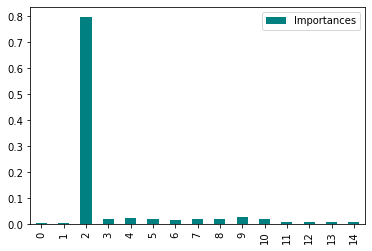

In [230]:
#plot the feature importances in bars
final_df.plot.bar(color='teal')

In [231]:
'''
plot again correlation matrix
'''
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,Gender_M,Gender_F,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_3.0,PolicyQuarter_4.0,BirthQuarter_3.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_3.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
Capital,1.000000,0.053040,-0.053040,-0.093849,0.010706,0.015433,0.004229,-0.028493,0.002907,0.000526,0.001629,-0.005141,-0.003283,-0.001563,-0.002367,0.007168
Gender_M,0.053040,1.000000,-1.000000,0.060078,0.003022,0.003361,0.000573,-0.006560,-0.001764,0.002161,0.003429,-0.003866,-0.001722,0.006225,0.003190,-0.007704
Gender_F,-0.053040,-1.000000,1.000000,-0.060078,-0.003022,-0.003361,-0.000573,0.006560,0.001764,-0.002161,-0.003429,0.003866,0.001722,-0.006225,-0.003190,0.007704
PolicyStartAge,-0.093849,0.060078,-0.060078,1.000000,0.005682,0.003012,0.010619,-0.017491,-0.004752,-0.009768,0.005746,0.008869,-0.000196,-0.008835,0.020164,-0.010926
PolicyQuarter_1.0,0.010706,0.003022,-0.003022,0.005682,1.000000,-0.337898,-0.288968,-0.380504,-0.002308,0.006700,-0.006442,0.002118,0.005860,0.000343,0.008062,-0.014143
PolicyQuarter_2.0,0.015433,0.003361,-0.003361,0.003012,-0.337898,1.000000,-0.286438,-0.377174,-0.006618,-0.005714,0.010838,0.001508,-0.001399,-0.017470,0.010310,0.008701
PolicyQuarter_3.0,0.004229,0.000573,-0.000573,0.010619,-0.288968,-0.286438,1.000000,-0.322556,-0.009026,-0.000075,0.003209,0.006003,-0.003578,-0.001100,0.003397,0.001282
PolicyQuarter_4.0,-0.028493,-0.006560,0.006560,-0.017491,-0.380504,-0.377174,-0.322556,1.000000,0.016314,-0.000897,-0.006928,-0.008663,-0.001142,0.017187,-0.020398,0.004101
BirthQuarter_3.0,0.002907,-0.001764,0.001764,-0.004752,-0.002308,-0.006618,-0.009026,0.016314,1.000000,-0.337464,-0.340617,-0.331076,0.008055,0.069111,-0.007424,-0.069992
BirthQuarter_4.0,0.000526,0.002161,-0.002161,-0.009768,0.006700,-0.005714,-0.000075,-0.000897,-0.337464,1.000000,-0.335493,-0.326095,-0.006490,0.006307,-0.063103,0.062657


In [232]:
'''
drop one of the categorical variables for each dummy variable to make those uncorrelated
'''
df=df.drop(['Gender_F', 'PolicyQuarter_3.0', 'BirthQuarter_3.0','PBQuarter_3.0'], axis=1)
df

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
4,140000.0,1.0,57.435813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,80000.0,0.0,58.563831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,52000.0,1.0,40.362225,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12,155000.0,0.0,55.932702,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14,150000.0,1.0,41.747606,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76095,75000.0,0.0,41.427271,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
76096,69000.0,1.0,44.020069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76097,95000.0,0.0,43.880436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76099,103000.0,0.0,40.395080,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [233]:
'''
plot again the correlation matrix
'''
correlation = df.corr(method='pearson')
correlation. style. background_gradient (cmap = 'BrBG') 

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
Capital,1.000000,0.053040,-0.093849,0.010706,0.015433,-0.028493,0.000526,0.001629,-0.005141,-0.001563,-0.002367,0.007168
Gender_M,0.053040,1.000000,0.060078,0.003022,0.003361,-0.006560,0.002161,0.003429,-0.003866,0.006225,0.003190,-0.007704
PolicyStartAge,-0.093849,0.060078,1.000000,0.005682,0.003012,-0.017491,-0.009768,0.005746,0.008869,-0.008835,0.020164,-0.010926
PolicyQuarter_1.0,0.010706,0.003022,0.005682,1.000000,-0.337898,-0.380504,0.006700,-0.006442,0.002118,0.000343,0.008062,-0.014143
PolicyQuarter_2.0,0.015433,0.003361,0.003012,-0.337898,1.000000,-0.377174,-0.005714,0.010838,0.001508,-0.017470,0.010310,0.008701
PolicyQuarter_4.0,-0.028493,-0.006560,-0.017491,-0.380504,-0.377174,1.000000,-0.000897,-0.006928,-0.008663,0.017187,-0.020398,0.004101
BirthQuarter_4.0,0.000526,0.002161,-0.009768,0.006700,-0.005714,-0.000897,1.000000,-0.335493,-0.326095,0.006307,-0.063103,0.062657
BirthQuarter_2.0,0.001629,0.003429,0.005746,-0.006442,0.010838,-0.006928,-0.335493,1.000000,-0.329142,-0.067284,0.012721,0.003306
BirthQuarter_1.0,-0.005141,-0.003866,0.008869,0.002118,0.001508,-0.008663,-0.326095,-0.329142,1.000000,-0.008423,0.058368,0.004586
PBQuarter_2.0,-0.001563,0.006225,-0.008835,0.000343,-0.017470,0.017187,0.006307,-0.067284,-0.008423,1.000000,-0.334708,-0.340575


In [234]:
'''
finding interquartile range of Capital, our target variable
'''

Q1Capital = df['Capital'].quantile(0.25)
Q3Capital = df['Capital'].quantile(0.75)
Q2Capital = df['Capital'].quantile(0.50)

print(Q1Capital)
print(Q2Capital)
print(Q3Capital)

IQRCapital = Q3Capital - Q1Capital


51000.0
77000.0
110000.0


In [235]:
'''
Removing outliers in Target Variable
'''

df = df[(df['Capital'] > (Q1Capital - 1.5 * IQRCapital)) & (df['Capital'] < (Q3Capital + 1.5 * IQRCapital))]
df

,Capital,Gender_M,PolicyStartAge,PolicyQuarter_1.0,PolicyQuarter_2.0,PolicyQuarter_4.0,BirthQuarter_4.0,BirthQuarter_2.0,BirthQuarter_1.0,PBQuarter_2.0,PBQuarter_4.0,PBQuarter_1.0
4,140000.0,1.0,57.435813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,80000.0,0.0,58.563831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,52000.0,1.0,40.362225,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12,155000.0,0.0,55.932702,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14,150000.0,1.0,41.747606,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76094,46000.0,0.0,44.537533,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
76095,75000.0,0.0,41.427271,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
76096,69000.0,1.0,44.020069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76097,95000.0,0.0,43.880436,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [236]:
'''
Split data into train and test
'''
array = df.values
x = array[:,1:] 
y = array[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [237]:
'''
run regression
'''
model = LinearRegression()
model.fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(df.columns)

coefficient of determination: 0.02022143519235231
intercept: 119312.8265716721
slope: [ 3476.20437596  -844.32209872   818.00107974   301.25919296
 -3513.89743534  -464.53522539 -1594.79404244 -1222.8694112
  -364.15557152   288.48423626   923.00837508]
Index(['Capital', 'Gender_M', 'PolicyStartAge', 'PolicyQuarter_1.0',
       'PolicyQuarter_2.0', 'PolicyQuarter_4.0', 'BirthQuarter_4.0',
       'BirthQuarter_2.0', 'BirthQuarter_1.0', 'PBQuarter_2.0',
       'PBQuarter_4.0', 'PBQuarter_1.0'],
      dtype='object')


In [238]:
'''
calculate p-values
'''

from scipy import stats

params = np.append(model.intercept_,model.coef_)
predictions = model.predict(X_train)
new_X_train = np.append(np.ones((len(X_train),1)), X_train, axis=1)
M_S_E = (sum((Y_train-predictions)**2))/(len(new_X_train)-len(new_X_train[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X_train.T,new_X_train)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X_train)-len(new_X_train[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

array([0.   , 0.   , 0.   , 0.237, 0.664, 0.   , 0.474, 0.014, 0.062,
       0.576, 0.661, 0.158])

In [239]:
'''
calculating adjusted R-square
'''
n,c = df.shape
p=c-1
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 42032
Number of features p are  11
R-square 0.02022143519235231 Adj_R-sqaure 0.01996494865706233


In [240]:
'''
make predictions on test data
'''
testdata_r_sq = model.score(X_test, Y_test)
print('coefficient of determination for test data:', testdata_r_sq)

testData =pd.DataFrame(Y_test)
testData.columns = ['Y_test']

testData['Y_pred'] = model.predict(X_test)
testData['Errors'] = testData['Y_pred'] - testData['Y_test']

testData

coefficient of determination for test data: 0.015438265661737671


,Y_test,Y_pred,Errors
0,62000.0,79248.149785,17248.149785
1,100000.0,73969.924372,-26030.075628
2,75000.0,76581.804492,1581.804492
3,185000.0,77393.334459,-107606.665541
4,47000.0,79257.982809,32257.982809
...,...,...,...
12605,73000.0,80924.486629,7924.486629
12606,152000.0,83165.541381,-68834.458619
12607,100000.0,71279.805629,-28720.194371
12608,82000.0,80078.446406,-1921.553594


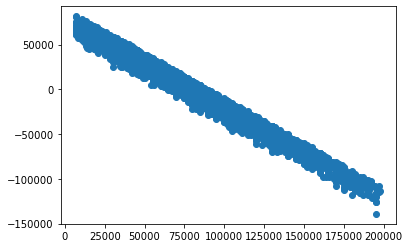

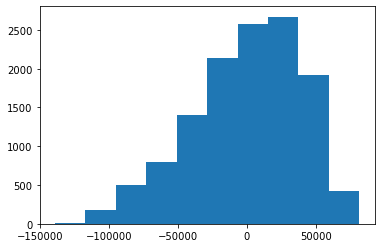

In [241]:
'''
plot errors
'''

plt.scatter(testData['Y_test'], testData['Errors'])
plt.show()

plt.hist(testData['Errors'])
plt.show()

# Section: Data3 - Decision Tree

In [242]:
'''
Importing libraries
'''
from sklearn import metrics 
from sklearn import tree


In [243]:
'''
split dataset in features and target variable
'''
feature_cols = df.columns
feature_cols = np.delete(feature_cols, 0)
target_col = df.columns[0]

X = df[feature_cols] # Features

Y = df[target_col] # Target variable

In [244]:
'''
Split dataset into training set and test set
'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [245]:
'''
creating decision trees with multiple depths
'''
depth_range=10

depth = np.zeros(depth_range)
train_error_mse = np.zeros(depth_range)
test_error_mse = np.zeros(depth_range)

train_error_r2 = np.zeros(depth_range)
test_error_r2 = np.zeros(depth_range)

for i in range(0,depth_range):
    model = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=i+5)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    depth[i]=i+5
    # MSE for training and test sets of increasing size
    train_error_mse[i] = metrics.mean_squared_error(Y_train, model.predict(X_train))
    test_error_mse[i] = metrics.mean_squared_error(Y_test, model.predict(X_test))
    # Rsquare for training and test sets of increasing size
    train_error_r2[i] = metrics.r2_score(Y_train, model.predict(X_train))
    test_error_r2[i] = metrics.r2_score(Y_test, model.predict(X_test))

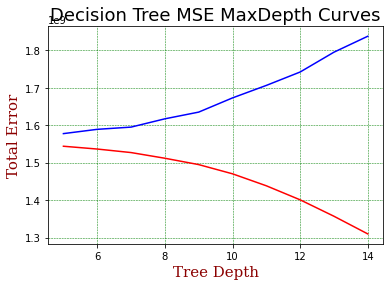

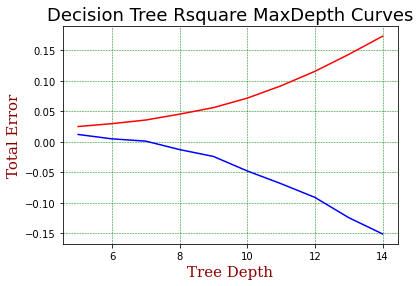

In [246]:
'''
Plot learning curves
'''

font = {'family':'serif','color':'darkred','size':15}

plt.title('Decision Tree MSE MaxDepth Curves', fontsize=18)
plt.plot(depth, train_error_mse, '-', label = 'Training Error',color = "red")
plt.plot(depth, test_error_mse, '-', label = 'Testing Error',color = "blue")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Tree Depth", fontdict = font)
plt.ylabel("Total Error", fontdict = font)
plt.show()

plt.title('Decision Tree Rsquare MaxDepth Curves', fontsize=18)
plt.plot(depth, train_error_r2, '-', label = 'Training Error',color = "red")
plt.plot(depth, test_error_r2, '-', label = 'Testing Error',color = "blue")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Tree Depth", fontdict = font)
plt.ylabel("Total Error", fontdict = font)
plt.show()


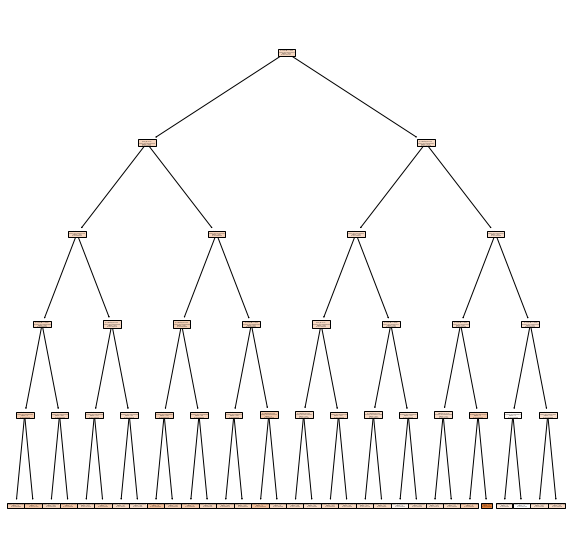

In [247]:
'''
Create Sample Decision Tree To Save
'''
model = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=5)
model.fit(X_train,Y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True, feature_names=X_train.columns)
plt.savefig('tree_visualization.png') 

# Section: Data3 - Clustering

In [248]:
'''
importing libraries
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [249]:
data3

,ID,Capital,Gender,Birth_Date,Effecitive_Date,Age,PolicyStartAge,BirthMonth,PolicyMonth,PBMonthDiff,PolicyStartAgeBin,CapitalBin,PolicyQuarter,BirthQuarter,PBQuarter,BirthHalf
4,5,140000.0,M,1942-09-30,2000-03-07,66.433949,57.435813,9,3,6,"(56.0, 58.0]",125k-150k,1,3,3,2
5,6,80000.0,F,1941-09-07,2000-03-31,67.561944,58.563831,9,3,6,"(58.0, 60.0]",75k-100k,1,3,3,2
10,11,52000.0,M,1959-10-28,2000-03-08,49.360712,40.362225,10,3,5,"(40.0, 41.0]",50k-75k,1,4,2,2
12,13,155000.0,F,1944-04-02,2000-03-08,64.930869,55.932702,4,3,11,"(54.0, 56.0]",150k-175k,1,2,4,1
14,15,150000.0,M,1958-06-08,2000-03-07,50.746064,41.747606,6,3,9,"(41.0, 42.0]",125k-150k,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76095,76096,75000.0,F,1965-11-25,2007-04-30,43.427789,41.427271,11,4,5,"(41.0, 42.0]",50k-75k,2,4,2,2
76096,76097,69000.0,M,1962-07-08,2006-07-15,47.019849,44.020069,7,7,0,"(44.0, 45.0]",50k-75k,3,3,1,2
76097,76098,95000.0,F,1964-08-01,2008-06-18,44.878850,43.880436,8,6,10,"(43.0, 44.0]",75k-100k,2,3,4,2
76099,76100,103000.0,F,1968-09-21,2009-02-12,40.394251,40.395080,9,2,5,"(40.0, 41.0]",100k-125k,1,3,2,2


In [250]:
'''
Extracting features for clustering
'''
data3
kmdata=data3[['PolicyMonth', 'PBMonthDiff']]
kmdata.describe()

,PolicyMonth,PBMonthDiff
count,44587.000000,44587.000000
mean,6.668872,5.453338
std,3.615563,3.439807
min,1.000000,0.000000
25%,3.000000,2.000000
50%,6.000000,5.000000
75%,10.000000,8.000000
max,12.000000,11.000000


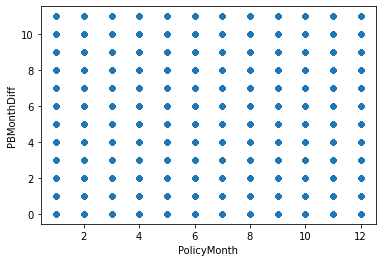

In [251]:
'''
Plotting kmdata, note that the variables are categorical, hence the data points in the graph does not express much
'''

kmdata.plot(
   x='PolicyMonth', 
   y='PBMonthDiff', 
   kind='scatter'
)

plt.show()

In [252]:
'''
forming clusters of different values of K and saving  their silhouette score to find optimal k
'''

sscore=[]

for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmdata)
    score=silhouette_score(kmdata, kmeans.labels_, metric='euclidean')
    sscore.append(score)
    print(f"Silhoute Scores: {sscore}")

Silhoute Scores: [0.3742824979999857]
Silhoute Scores: [0.3742824979999857, 0.402689519123164]
Silhoute Scores: [0.3742824979999857, 0.402689519123164, 0.41892773836217173]
Silhoute Scores: [0.3742824979999857, 0.402689519123164, 0.41892773836217173, 0.40219935603156415]


Text(0.5, 1.0, 'SilhoutteScore vs K Value')

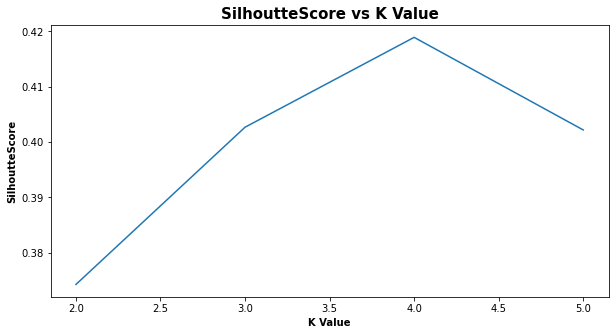

In [253]:
'''
Plotting Silhoute Score
'''
plt.figure(figsize=(10, 5))
plt.plot(range(2,6), sscore)
plt.xlabel("K Value", fontsize=10, fontweight='bold')
plt.ylabel("SilhoutteScore", fontsize=10, fontweight='bold')
plt.title("SilhoutteScore vs K Value", fontsize=15, fontweight='bold')

In [254]:
'''
finding predicting cluster for each data point for k=4 clustering  
'''
kmeans= KMeans(n_clusters=4)
y_kmeans=kmeans.fit_predict(kmdata)
print(y_kmeans)
y_kmeans.shape

kmdata["y_kmeans"]=y_kmeans
kmdata.shape
kmdata

[1 1 2 ... 1 2 2]


C:\Users\Vikas\AppData\Local\Temp\ipykernel_4644\1614751652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmdata["y_kmeans"]=y_kmeans


,PolicyMonth,PBMonthDiff,y_kmeans
4,3,6,1
5,3,6,1
10,3,5,2
12,3,11,1
14,3,9,1
...,...,...,...
76095,4,5,2
76096,7,0,3
76097,6,10,1
76099,2,5,2


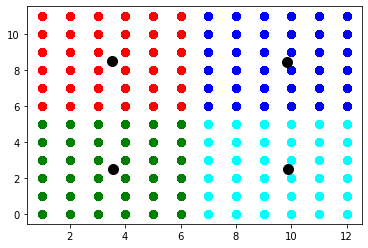

In [255]:
'''
plotting colour coded data points and 4 centroids of the clusters
'''
plt.scatter(kmdata.iloc[y_kmeans==0,0], kmdata.iloc[y_kmeans==0,1], s=50, color='blue',label="Cluster1")
plt.scatter(kmdata.iloc[y_kmeans==1,0], kmdata.iloc[y_kmeans==1,1], s=50, color='red',label="Cluster2")
plt.scatter(kmdata.iloc[y_kmeans==2,0], kmdata.iloc[y_kmeans==2,1], s=50, color='green',label="Cluster3")
plt.scatter(kmdata.iloc[y_kmeans==3,0], kmdata.iloc[y_kmeans==3,1], s=50, color='cyan',label="Cluster4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,color='Black',label="Centroid")

In [256]:
#The scatter plot visualization is hot helpful but the position of centroids suggests that the data is almost equally distributed 

# Section: Data3 - Polynomial Regression

In [257]:
'''
importing library
'''
from sklearn.preprocessing import PolynomialFeatures

In [258]:
'''
split dataset in features and target variable
'''

feature_cols = df.columns
feature_cols = np.delete(feature_cols, 0)
target_col = df.columns[0]
X = df[feature_cols] # Features
Y = df[target_col] # Target variable

In [259]:
'''
transforming initial features with polynomial degree 2 to contain interaction variables 
as these were not present in earlier linear regression 
'''
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, Y)
X_poly=X_poly[:,1:]
print(X_poly)
X_poly.shape

[[ 1.         57.43581319  1.         ...  0.          0.
   0.        ]
 [ 0.         58.56383088  1.         ...  0.          0.
   0.        ]
 [ 1.         40.3622251   1.         ...  0.          0.
   0.        ]
 ...
 [ 1.         44.02006886  0.         ...  0.          0.
   1.        ]
 [ 0.         43.8804356   0.         ...  1.          0.
   0.        ]
 [ 0.         40.39507998  1.         ...  0.          0.
   0.        ]]


(42032, 77)

In [260]:
'''
split data into train and test
'''
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=42) 

In [261]:
'''
running linear regression
'''
model = LinearRegression()
model.fit(X_train, Y_train) 
Ypoly_hat= model.predict(X_train)
print (Ypoly_hat)

[89511.30521509 90791.3922974  80783.50492586 ... 86015.39032669
 75274.92841761 79262.47922686]


In [262]:
'''
calculating R-square of the training set
'''
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.022593714706102053
intercept: 182148.9730716992
slope: [ 6.98511431e+03 -3.52382252e+03  1.78637578e+03 -2.61774781e+03
 -3.26917129e+02 -4.75274620e+03  1.56809685e+03 -3.16017513e+02
  4.85492406e+02  3.53783490e+03 -4.89250314e-01  6.98511431e+03
 -1.88555602e+02 -9.74353489e+02 -9.23557983e+02  1.03744657e+03
 -1.44744602e+03 -9.11453962e+02 -1.15719538e+03 -3.86072709e+02
 -1.64000903e+03  8.78691450e+02  2.74073934e+01 -4.44927842e+01
  1.43116821e+02 -5.16032392e+01  2.13528443e+02 -8.09798512e+01
  2.51455031e+01 -1.00475392e+01 -9.75457152e+01 -7.24477071e+00
  1.78637578e+03 -2.01794137e-12 -3.72324394e-12 -1.34660839e+01
  2.04828263e+03 -9.68202262e+02  5.75457407e+02 -1.58253340e+03
  2.68043564e+03 -2.61774781e+03 -2.72848411e-12  7.45553523e+00
 -1.19395800e+03 -1.41772033e+03 -5.90550651e+02  3.39927730e+02
  2.16106717e+02 -3.26917129e+02 -6.53239769e+02 -6.73472765e+02
 -5.46387631e+02 -5.46132236e+02  1.03310638e+03  2.85781602e+02
 -4

In [263]:
'''
calculating adjusted R-square of training set
'''
n,c = X_train.shape
p=c
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 29422
Number of features p are  77
R-square 0.022593714706102053 Adj_R-sqaure 0.020028955846790764


In [264]:
'''
calculating R-square of the testing set
'''
r_sq = model.score(X_test, Y_test)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.014484909725471673
intercept: 182148.9730716992
slope: [ 6.98511431e+03 -3.52382252e+03  1.78637578e+03 -2.61774781e+03
 -3.26917129e+02 -4.75274620e+03  1.56809685e+03 -3.16017513e+02
  4.85492406e+02  3.53783490e+03 -4.89250314e-01  6.98511431e+03
 -1.88555602e+02 -9.74353489e+02 -9.23557983e+02  1.03744657e+03
 -1.44744602e+03 -9.11453962e+02 -1.15719538e+03 -3.86072709e+02
 -1.64000903e+03  8.78691450e+02  2.74073934e+01 -4.44927842e+01
  1.43116821e+02 -5.16032392e+01  2.13528443e+02 -8.09798512e+01
  2.51455031e+01 -1.00475392e+01 -9.75457152e+01 -7.24477071e+00
  1.78637578e+03 -2.01794137e-12 -3.72324394e-12 -1.34660839e+01
  2.04828263e+03 -9.68202262e+02  5.75457407e+02 -1.58253340e+03
  2.68043564e+03 -2.61774781e+03 -2.72848411e-12  7.45553523e+00
 -1.19395800e+03 -1.41772033e+03 -5.90550651e+02  3.39927730e+02
  2.16106717e+02 -3.26917129e+02 -6.53239769e+02 -6.73472765e+02
 -5.46387631e+02 -5.46132236e+02  1.03310638e+03  2.85781602e+02
 -4

In [265]:
'''
calculating adjusted R-square of testing set
'''
n,c = X_test.shape
p=c
print("Number of data points n are", n)
print("Number of features p are ", p)
adj_r_sq = 1- (1-r_sq)*(n-1)/(n-p-1)
print("R-square", r_sq, "Adj_R-sqaure", adj_r_sq)

Number of data points n are 12610
Number of features p are  77
R-square 0.014484909725471673 Adj_R-sqaure 0.008429638264321082


# Section: Data3 - Neural Network

In [266]:
'''
importing libraries
'''

import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
import torch.optim as optim


In [267]:
'''
partitioning data to features and target variable
'''
array = df.values
x = array[:,1:] 
y = array[:,0]

In [268]:
'''
scaling data
'''
x = StandardScaler().fit_transform(x)

In [269]:
'''
split data into train and test
'''
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [270]:
'''
Converting data to PyTorch tensors and reshaping target variable to be fed to MLP
'''
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1)

In [271]:
'''
checking shape of train and test data 
'''
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([29422, 11]),
 torch.Size([12610, 11]),
 torch.Size([29422, 1]),
 torch.Size([12610, 1]))

In [272]:
'''
passing the data to dataloader for it to be fed to NN in Pytorch
'''

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.X=X_train
        self.Y=Y_train
        self.len=self.X.shape[0]
    def __getitem__(self,index):      
        return self.X[index], self.Y[index]
    def __len__(self):
        return self.len
    
nndata=Data()
trainloader=DataLoader(dataset=nndata,batch_size=64)    

In [273]:
datasize, features= X_train.shape
print("datasize:",datasize,", ","features:", features)

datasize: 29422 ,  features: 11


In [274]:
'''
defining MLP class as our NN model with input layer , 3 hidden layers, and output layer
'''
class MLP(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(features, 32),
      nn.ReLU(),
      nn.Linear(32, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 1)
    )

  def forward(self, X):
    return self.layers(X)

model=MLP()
print(model.parameters)

<bound method Module.parameters of MLP(
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)>


In [275]:
'''
selecting loss function and optimizer
'''
loss_function = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [276]:
'''
assigning number of epochs, low to save running time on demo
'''
n_epochs = 4   

In [277]:
'''
running epochs and saving loss for every mini-batch of training data and loss for testing data after each epoch 
'''

loss_list = []
epoch_model_eval = []
# Run the training loop
for epoch in range(0, n_epochs): # 3 epochs at maximum
    
   print(f'Starting epoch {epoch+1}')
   current_loss = 0.0
   for i, loopdata in enumerate(trainloader, 0):
         optimizer.zero_grad()
         Outputs_nn = model(X_train)
         loss = loss_function(Outputs_nn, Y_train)
         loss_list.append(loss.item()) 
         loss.backward()
         optimizer.step()
         current_loss += loss.item()
         if i % 10 == 0:
                print('Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
         current_loss = 0.0
   # evaluate model at end of epoch
   Y_pred = model(X_test)
   model_eval_loss = loss_function(Y_pred, Y_test)
   epoch_model_eval.append(model_eval_loss.item())
   print(f"End of epoch {epoch+1}, model eval loss is {epoch_model_eval[epoch]}")

Starting epoch 1
Loss after mini-batch     1: 15673649.152
Loss after mini-batch    11: 15668284.416
Loss after mini-batch    21: 15580268.544
Loss after mini-batch    31: 14938098.688
Loss after mini-batch    41: 12063892.480
Loss after mini-batch    51: 5134887.424
Loss after mini-batch    61: 4295500.288
Loss after mini-batch    71: 3315026.944
Loss after mini-batch    81: 3221759.488
Loss after mini-batch    91: 3190061.824
Loss after mini-batch   101: 3149310.976
Loss after mini-batch   111: 3133601.536
Loss after mini-batch   121: 3127722.240
Loss after mini-batch   131: 3123881.472
Loss after mini-batch   141: 3120232.192
Loss after mini-batch   151: 3117538.560
Loss after mini-batch   161: 3115401.728
Loss after mini-batch   171: 3113607.680
Loss after mini-batch   181: 3112040.448
Loss after mini-batch   191: 3110677.504
Loss after mini-batch   201: 3109456.640
Loss after mini-batch   211: 3108378.112
Loss after mini-batch   221: 3107430.400
Loss after mini-batch   231: 310656

Text(0.5, 1.0, 'TrainingLossCurve')

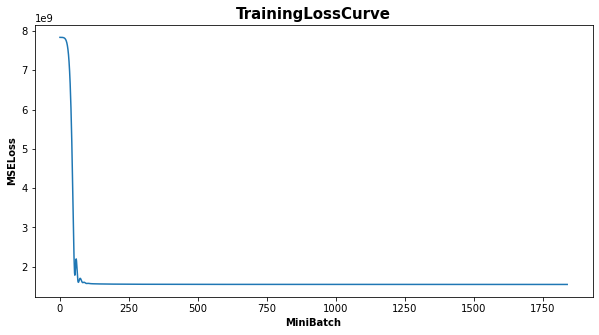

In [278]:
'''
plotting training Loss Curve  
'''
xmax= len(loss_list)
plt.figure(figsize=(10, 5))
plt.plot(range(0,xmax), loss_list)
plt.xlabel("MiniBatch", fontsize=10, fontweight='bold')
plt.ylabel("MSELoss", fontsize=10, fontweight='bold')
plt.title("TrainingLossCurve", fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'TestLossCurve')

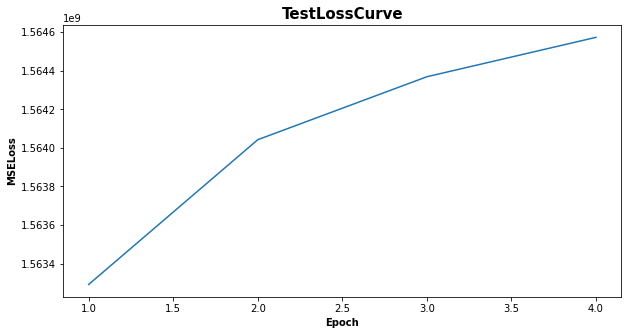

In [279]:

'''
plotting test loss curve  
'''
xmax= len(epoch_model_eval)
plt.figure(figsize=(10, 5))
plt.plot(range(1,xmax+1), epoch_model_eval)
plt.xlabel("Epoch", fontsize=10, fontweight='bold')
plt.ylabel("MSELoss", fontsize=10, fontweight='bold')
plt.title("TestLossCurve", fontsize=15, fontweight='bold')